# Quick start for mineRL

Installation

In [1]:
!conda install tqdm anaconda -y

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - anaconda
    - tqdm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py38_0           6 KB
    anaconda-custom            |           py38_1          35 KB
    conda-4.10.1               |   py38hecd8cb5_1         2.9 MB
    libllvm9-9.0.1             |       h21ff451_1        15.4 MB
    snappy-1.1.8               |       hb1e8313_0          54 KB
    tbb-2020.3                 |       h879752b_0         147 KB
    tqdm-4.59.0                |     pyhd3eb1b0_1          93 KB
    ------------------------------------------------------------
                                           Total:        18.6 MB

The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/osx-64::_anaconda_depends-2020.07-py38_0
  libllvm9 

In [2]:
!conda install scikit-learn anaconda -y

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - anaconda
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.24.1        |   py38hb2f4e1b_0         4.9 MB
    ------------------------------------------------------------
                                           Total:         4.9 MB

The following packages will be UPDATED:

  scikit-learn                        0.23.2-py38h959d312_0 --> 0.24.1-py38hb2f4e1b_0



scikit-learn-0.24.1  | 4.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
!pip install pyglet==1.5.0

In [4]:
import os       #importing os to set environment variable
def install_java():
    !sudo add-apt-repository ppa:openjdk-r/ppa
    !sudo apt-get update
    !sudo apt-get install openjdk-8-jdk    #install java
    
    !java -version       #check java version

In [5]:
!pip3 install --upgrade minerl    #install minerl

Requirement already up-to-date: minerl in /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages (0.3.6)
You are using pip version 18.1, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Build the dataset for "MineRLObtainDiamond-v0"

In [2]:
!python -m minerl.data.download "MineRLObtainDiamond-v0"

/home/guest/anaconda3/envs/mineRL/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/guest/anaconda3/envs/mineRL/lib/python3.7/runpy.py:125: RuntimeWarning: 'minerl.data.download' found in sys.modules after import of package 'minerl.data', but prior to execution of 'minerl.data.download'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2021-04-20 12:17:07 Tbook03 __main__[6854] INFO Downloading experiment MineRLObtainDiamond-v0 to /home/guest/.minerl-data
2021-04-20 12:17:07 Tbook03 __main__[6854] WARNING /home/guest/.minerl-data/MineRLObtainDiamond-v0 exists - skipping re-download!


In [ ]:
import minerl

data = minerl.data.make(
    'MineRLObtainDiamond-v0')


for current_state, action, reward, next_state, done \
    in data.batch_iter(
        batch_size=1, num_epochs=1, seq_len=32):

        # Print the POV @ the first step of the sequence
        print(current_state['pov'][0])

        # Print the final reward pf the sequence!
        print(reward[-1])

        # Check if final (next_state) is terminal.
        print(done[-1])

        # ... do something with the data.
        print("At the end of trajectories the length"
              "can be < max_sequence_len", len(reward))

Import the pip packages and create the environment

The agent is given a sparse reward (+100 upon reaching the goal, at which point the episode terminates). This variant of the environment is dense reward-shaped where the agent is given a reward every tick for how much closer (or negative reward for farther) the agent gets to the target.
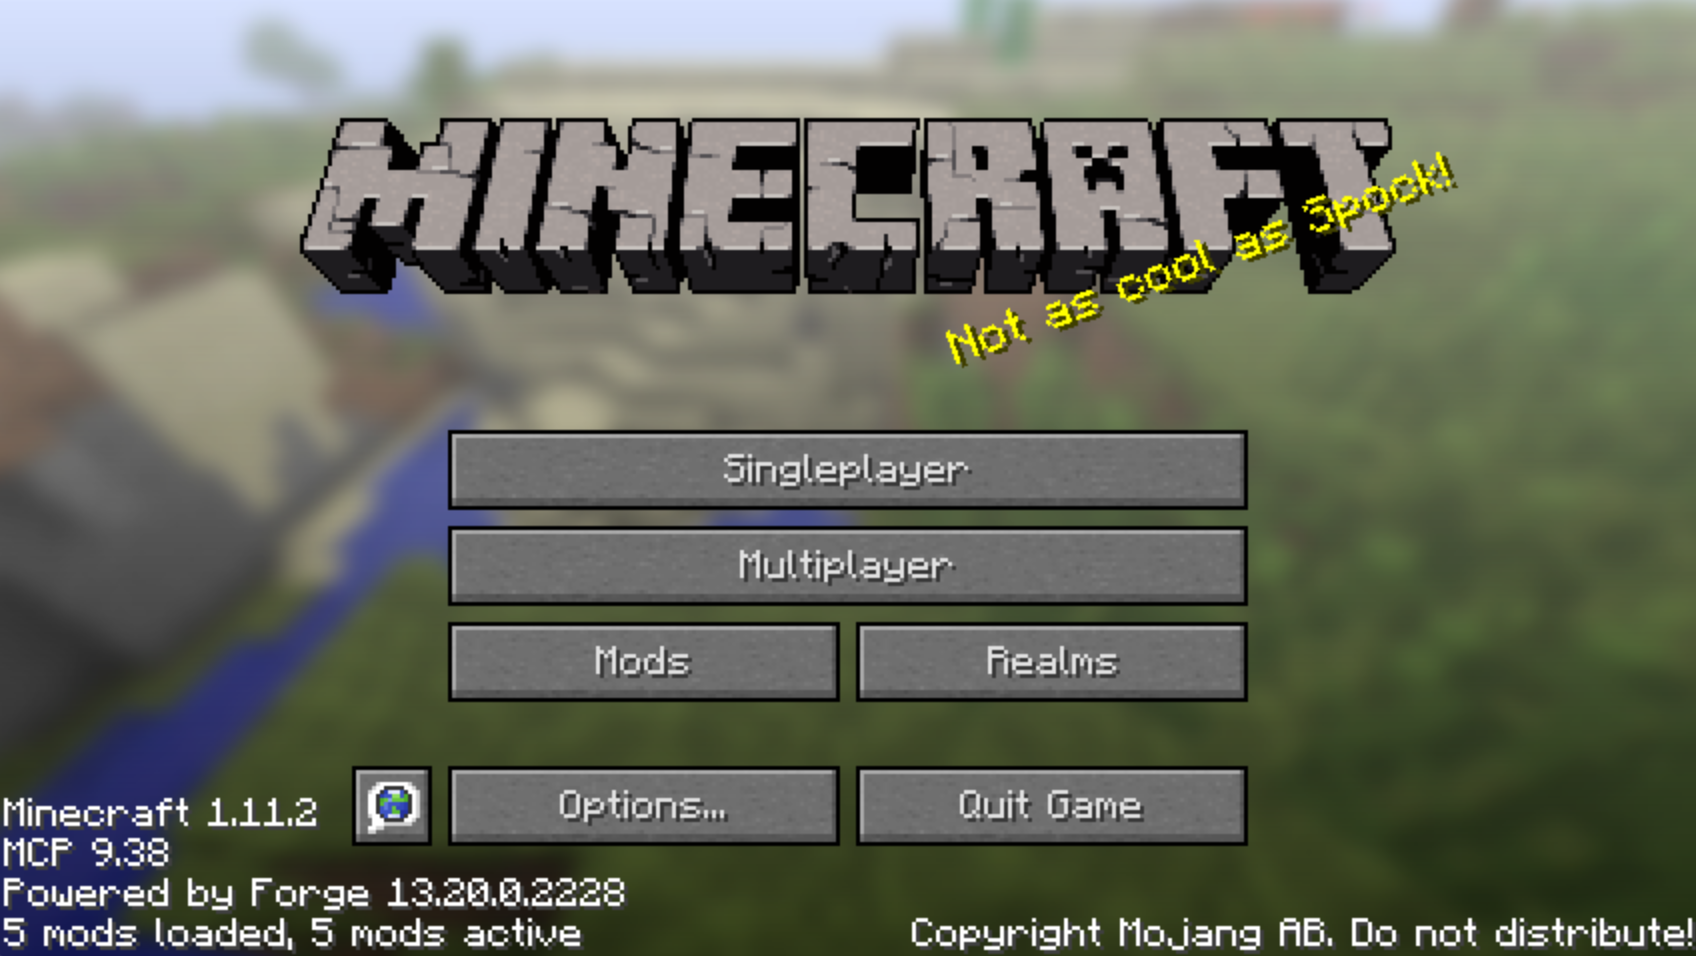

In [7]:
import minerl
import gym
import logging
logging.basicConfig(level=logging.DEBUG)

env = gym.make("MineRLNavigateDense-v0")

/opt/anaconda3/envs/minerl/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
INFO:minerl.env.malmo.instance.bc03d7:Starting Minecraft process: ['/var/folders/62/k_zhh1l92sz088h8j7w4s5j80000gp/T/tmp3u9snr4f/Minecraft/launchClient.sh', '-port', '9522', '-env', '-runDir', '/var/folders/62/k_zhh1l92sz088h8j7w4s5j80000gp/T/tmp3u9snr4f/Minecraft/run']
INFO:minerl.env.malmo.instance.bc03d7:Starting process watcher for process 75677 @ localhost:9522
DEBUG:minerl.env.malmo.instance.bc03d7:Etag download for https://files.minecraftforge.net/maven/de/oceanlabs/mcp/versions.json failed with code 404
DEBUG:minerl.env.malmo.instance.bc03d7:This mapping 'snapshot_20161220' was designed for MC 1.11! Use at your own peril.
DEBUG:minerl.env.malmo.instance.bc03d7:#################################################
DEBUG:minerl.env.malmo.instance.bc03d7:         ForgeGradle 2.2-

Actions the agents can do

In [8]:
env.action_space

Dict(attack:Discrete(2), back:Discrete(2), camera:Box(low=-180.0, high=180.0, shape=(2,)), forward:Discrete(2), jump:Discrete(2), left:Discrete(2), place:Enum(dirt,none), right:Discrete(2), sneak:Discrete(2), sprint:Discrete(2))

DEBUG:minerl.env.malmo.instance.bc03d7:[10:13:10] [Realms Notification Availability checker #1/INFO]: Could not authorize you against Realms server: Invalid session id
DEBUG:minerl.env.malmo.instance.bc03d7:[10:13:59] [Client thread/INFO]: Stopping!
DEBUG:minerl.env.malmo.instance.bc03d7:[10:13:59] [Client thread/INFO]: SoundSystem shutting down...
DEBUG:minerl.env.malmo.instance.bc03d7:[10:13:59] [Client thread/WARN]: Author: Paul Lamb, www.paulscode.com
DEBUG:minerl.env.malmo.instance.bc03d7:
DEBUG:minerl.env.malmo.instance.bc03d7:BUILD SUCCESSFUL
DEBUG:minerl.env.malmo.instance.bc03d7:
DEBUG:minerl.env.malmo.instance.bc03d7:Total time: 1 mins 48.077 secs


In [9]:
env.action_space.noop()

OrderedDict([('attack', 0),
             ('back', 0),
             ('camera', array([0., 0.], dtype=float32)),
             ('forward', 0),
             ('jump', 0),
             ('left', 0),
             ('place', 'none'),
             ('right', 0),
             ('sneak', 0),
             ('sprint', 0)])

Repeating a hard-coded action until done

In [13]:
done = False
net_reward = 0
step = 0
step_rewards = [(0, 0.0)]
obs = env.reset()


while not done:
    action = env.action_space.noop()

    action['camera'] = [0, 0.03*obs["compassAngle"]]
    action['back'] = 0
    action['forward'] = 1
    action['jump'] = 1
    action['attack'] = 1

    obs, reward, done, info = env.step(
        action)

    step += 1
    net_reward += reward
    step_rewards.append((step, net_reward))
    print(f"Step {step}: {net_reward}")

DEBUG:minerl.env.core:Creating socket connection!
ERROR:minerl.env.core:Failed to reset (socket error), trying again!
ERROR:minerl.env.core:Cleaning connection! Something must have gone wrong.
ERROR:minerl.env.core:Connection with Minecraft client cleaned more than once; restarting.
INFO:minerl.env.malmo.instance.aed60c:Starting Minecraft process: ['/var/folders/62/k_zhh1l92sz088h8j7w4s5j80000gp/T/tmp_8axmjlv/Minecraft/launchClient.sh', '-port', '9525', '-env', '-runDir', '/var/folders/62/k_zhh1l92sz088h8j7w4s5j80000gp/T/tmp_8axmjlv/Minecraft/run']
INFO:minerl.env.malmo.instance.aed60c:Starting process watcher for process 75834 @ localhost:9525
DEBUG:minerl.env.malmo.instance.aed60c:This mapping 'snapshot_20161220' was designed for MC 1.11! Use at your own peril.
DEBUG:minerl.env.malmo.instance.aed60c:#################################################
DEBUG:minerl.env.malmo.instance.aed60c:         ForgeGradle 2.2-SNAPSHOT-3966cea        
DEBUG:minerl.env.malmo.instance.aed60c:  https:/

Step 1: 0.06170654296875
Step 2: 0.10594940185546875
Step 3: 0.15381240844726562
Step 4: 0.20579147338867188
Step 5: 0.2614288330078125
Step 6: 0.3206977844238281
Step 7: 0.3838310241699219
Step 8: 0.5084190368652344
Step 9: 0.644317626953125
Step 10: 0.7886924743652344
Step 11: 0.9427375793457031
Step 12: 1.0388374328613281
Step 13: 1.1404380798339844
Step 14: 1.3117599487304688
Step 15: 1.4686431884765625
Step 16: 1.5477561950683594
Step 17: 1.6305198669433594
Step 18: 1.7164878845214844
Step 19: 1.8053169250488281
Step 20: 1.8967666625976562


DEBUG:minerl.env.malmo.instance.421b47:[10:25:14] [Client thread/INFO]: [CHAT] §l297...


Step 21: 1.9962272644042969
Step 22: 2.058788299560547
Step 23: 2.131195068359375
Step 24: 2.2135963439941406
Step 25: 2.3060302734375
Step 26: 2.407928466796875
Step 27: 2.5181884765625
Step 28: 2.7069931030273438
Step 29: 2.899188995361328
Step 30: 3.0937461853027344
Step 31: 3.288562774658203
Step 32: 3.410472869873047
Step 33: 3.5388870239257812
Step 34: 3.6743087768554688
Step 35: 3.8179702758789062
Step 36: 3.96929931640625
Step 37: 4.1262664794921875


DEBUG:minerl.env.malmo.instance.421b47:[10:25:15] [Client thread/INFO]: [CHAT] §l296...


Step 38: 4.359840393066406
Step 39: 4.580410003662109
Step 40: 4.794136047363281
Step 41: 4.995399475097656
Step 42: 5.119537353515625
Step 43: 5.251502990722656
Step 44: 5.391792297363281
Step 45: 5.5405731201171875
Step 46: 5.697685241699219
Step 47: 5.862674713134766
Step 48: 6.034801483154297
Step 49: 6.158237457275391
Step 50: 6.182762145996094
Step 51: 6.191585540771484
Step 52: 6.19390869140625
Step 53: 6.1847381591796875
Step 54: 6.175205230712891
Step 55: 6.180442810058594
Step 56: 6.200366973876953
Step 57: 6.234588623046875


DEBUG:minerl.env.malmo.instance.421b47:[10:25:15] [Client thread/INFO]: [CHAT] §l295...


Step 58: 6.282440185546875
Step 59: 6.342990875244141
Step 60: 6.415061950683594
Step 61: 6.490238189697266
Step 62: 6.627971649169922
Step 63: 6.756557464599609
Step 64: 6.8343048095703125
Step 65: 6.925647735595703
Step 66: 7.030693054199219
Step 67: 7.149234771728516
Step 68: 7.280769348144531
Step 69: 7.424522399902344
Step 70: 7.579444885253906
Step 71: 7.733306884765625
Step 72: 7.9693603515625
Step 73: 8.170326232910156
Step 74: 8.290817260742188
Step 75: 8.422168731689453
Step 76: 8.564884185791016
Step 77: 8.723033905029297
Step 78: 8.895023345947266
Step 79: 9.07733154296875
Step 80: 9.268817901611328


DEBUG:minerl.env.malmo.instance.421b47:[10:25:16] [Client thread/INFO]: [CHAT] §l294...


Step 81: 9.46807861328125
Step 82: 9.673442840576172
Step 83: 9.861713409423828
Step 84: 10.10150146484375
Step 85: 10.242874145507812
Step 86: 10.393333435058594
Step 87: 10.553596496582031
Step 88: 10.72808837890625
Step 89: 10.91531753540039
Step 90: 11.084293365478516


DEBUG:minerl.env.malmo.instance.421b47:[10:25:16] [Client thread/INFO]: [CHAT] §l293...


Step 91: 11.243412017822266
Step 92: 11.408676147460938
Step 93: 11.578514099121094
Step 94: 11.729011535644531
Step 95: 11.91000747680664
Step 96: 12.014232635498047
Step 97: 12.130950927734375
Step 98: 12.260623931884766
Step 99: 12.407581329345703
Step 100: 12.570045471191406
Step 101: 12.741439819335938
Step 102: 12.98583984375
Step 103: 13.223312377929688
Step 104: 13.381378173828125
Step 105: 13.551033020019531
Step 106: 13.730571746826172
Step 107: 13.90911865234375
Step 108: 14.12725830078125
Step 109: 14.256092071533203
Step 110: 14.395374298095703
Step 111: 14.545825958251953
Step 112: 14.707763671875
Step 113: 14.881122589111328
Step 114: 15.065467834472656
Step 115: 15.260013580322266
Step 116: 15.463642120361328
Step 117: 15.642585754394531


DEBUG:minerl.env.malmo.instance.421b47:[10:25:16] [Client thread/INFO]: [CHAT] §l292...


Step 118: 15.713573455810547
Step 119: 15.766204833984375
Step 120: 15.799835205078125
Step 121: 15.812522888183594
Step 122: 15.831169128417969
Step 123: 15.856895446777344
Step 124: 15.890365600585938
Step 125: 15.931800842285156
Step 126: 15.981006622314453
Step 127: 16.03740692138672
Step 128: 16.082653045654297
Step 129: 16.143409729003906
Step 130: 16.159072875976562
Step 131: 16.15938949584961
Step 132: 16.183006286621094
Step 133: 16.229656219482422
Step 134: 16.298725128173828
Step 135: 16.38930892944336
Step 136: 16.500179290771484
Step 137: 16.629840850830078
Step 138: 16.754314422607422
Step 139: 16.96240234375
Step 140: 17.12411117553711


DEBUG:minerl.env.malmo.instance.421b47:[10:25:17] [Client thread/INFO]: [CHAT] §l291...


Step 141: 17.216629028320312
Step 142: 17.32535171508789
Step 143: 17.450862884521484
Step 144: 17.593334197998047
Step 145: 17.752559661865234
Step 146: 17.92795181274414
Step 147: 18.118568420410156
Step 148: 18.323131561279297
Step 149: 18.540023803710938
Step 150: 18.767311096191406
Step 151: 19.002735137939453
Step 152: 19.243736267089844


DEBUG:minerl.env.malmo.instance.421b47:[10:25:17] [Client thread/INFO]: [CHAT] §l290...


Step 153: 19.449657440185547
Step 154: 19.67816162109375
Step 155: 19.8087158203125
Step 156: 19.951065063476562
Step 157: 20.106197357177734
Step 158: 20.274620056152344
Step 159: 20.456409454345703
Step 160: 20.651206970214844
Step 161: 20.858261108398438
Step 162: 21.051864624023438
Step 163: 21.322521209716797
Step 164: 21.51290512084961
Step 165: 21.619319915771484
Step 166: 21.741161346435547
Step 167: 21.879329681396484
Step 168: 22.034244537353516
Step 169: 22.205875396728516
Step 170: 22.393779754638672
Step 171: 22.597087860107422
Step 172: 22.814537048339844
Step 173: 23.044490814208984
Step 174: 23.28491973876953
Step 175: 23.53343963623047
Step 176: 23.78729248046875


DEBUG:minerl.env.malmo.instance.421b47:[10:25:18] [Client thread/INFO]: [CHAT] §l289...


Step 177: 24.000999450683594
Step 178: 24.22964096069336
Step 179: 24.358535766601562
Step 180: 24.499813079833984
Step 181: 24.65465545654297
Step 182: 24.82372283935547
Step 183: 25.007171630859375
Step 184: 25.20467758178711
Step 185: 25.415470123291016
Step 186: 25.638320922851562
Step 187: 25.871570587158203
Step 188: 26.113147735595703
Step 189: 26.360557556152344
Step 190: 26.610897064208984
Step 191: 26.8271484375
Step 192: 27.06951904296875
Step 193: 27.207744598388672
Step 194: 27.356369018554688
Step 195: 27.516765594482422
Step 196: 27.689727783203125
Step 197: 27.875503540039062
Step 198: 28.073802947998047


DEBUG:minerl.env.malmo.instance.421b47:[10:25:18] [Client thread/INFO]: [CHAT] §l288...


Step 199: 28.28384780883789
Step 200: 28.504356384277344
Step 201: 28.73357391357422
Step 202: 28.969276428222656
Step 203: 29.18045425415039
Step 204: 29.417938232421875
Step 205: 29.552467346191406
Step 206: 29.697938919067383
Step 207: 29.85584831237793
Step 208: 29.892894744873047
Step 209: 29.94396209716797
Step 210: 30.020158767700195
Step 211: 30.119504928588867
Step 212: 30.2396240234375
Step 213: 30.36186408996582
Step 214: 30.477327346801758
Step 215: 30.574071884155273
Step 216: 30.68653106689453
Step 217: 30.74856185913086
Step 218: 30.828266143798828
Step 219: 30.92658233642578
Step 220: 30.97358512878418


DEBUG:minerl.env.malmo.instance.421b47:[10:25:18] [Client thread/INFO]: [CHAT] §l287...


Step 221: 30.98617172241211
Step 222: 31.027788162231445
Step 223: 31.0960693359375
Step 224: 31.16224479675293
Step 225: 31.31667137145996
Step 226: 31.470895767211914
Step 227: 31.600133895874023
Step 228: 31.74382209777832
Step 229: 31.96717071533203
Step 230: 32.12308120727539
Step 231: 32.29475784301758
Step 232: 32.47976875305176
Step 233: 32.6605224609375
Step 234: 32.89992141723633
Step 235: 33.09878921508789
Step 236: 33.23078536987305


DEBUG:minerl.env.malmo.instance.421b47:[10:25:19] [Client thread/INFO]: [CHAT] §l286...


Step 237: 33.30201530456543
Step 238: 33.38660430908203
Step 239: 33.4860897064209
Step 240: 33.60873603820801
Step 241: 33.75209426879883
Step 242: 33.910030364990234
Step 243: 34.08087730407715
Step 244: 34.26240921020508
Step 245: 34.45185089111328
Step 246: 34.605098724365234
Step 247: 34.78584861755371
Step 248: 34.886356353759766
Step 249: 35.0014762878418
Step 250: 35.132850646972656
Step 251: 35.28929901123047
Step 252: 35.46829414367676
Step 253: 35.663368225097656
Step 254: 35.872802734375
Step 255: 36.09427070617676
Step 256: 36.32484817504883
Step 257: 36.51711082458496
Step 258: 36.72907066345215
Step 259: 36.84518051147461
Step 260: 36.97475624084473


DEBUG:minerl.env.malmo.instance.421b47:[10:25:19] [Client thread/INFO]: [CHAT] §l285...


Step 261: 37.11980056762695
Step 262: 37.281524658203125
Step 263: 37.46039390563965
Step 264: 37.65615272521973
Step 265: 37.867849349975586
Step 266: 38.09384346008301
Step 267: 38.33181571960449
Step 268: 38.57876205444336
Step 269: 38.79072380065918
Step 270: 39.00630760192871
Step 271: 39.12236404418945
Step 272: 39.252241134643555


DEBUG:minerl.env.malmo.instance.421b47:[10:25:20] [Client thread/INFO]: [CHAT] §l284...


Step 273: 39.39824295043945
Step 274: 39.57122993469238
Step 275: 39.74207305908203
Step 276: 39.91608810424805
Step 277: 40.104196548461914
Step 278: 40.30385398864746
Step 279: 40.51617622375488
Step 280: 40.6842041015625
Step 281: 40.89664268493652
Step 282: 41.06006050109863
Step 283: 41.23540115356445
Step 284: 41.4752140045166
Step 285: 41.70288848876953
Step 286: 41.92392921447754
Step 287: 42.141334533691406
Step 288: 42.356733322143555
Step 289: 42.571014404296875
Step 290: 42.78466033935547
Step 291: 42.9256591796875
Step 292: 42.983333587646484
Step 293: 43.043657302856445
Step 294: 43.12797546386719
Step 295: 43.24882507324219
Step 296: 43.40256881713867
Step 297: 43.57999038696289
Step 298: 43.77870178222656


DEBUG:minerl.env.malmo.instance.421b47:[10:25:20] [Client thread/INFO]: [CHAT] §l283...


Step 299: 43.99546432495117
Step 300: 44.226158142089844
Step 301: 44.40169143676758
Step 302: 44.56968688964844
Step 303: 44.65255546569824
Step 304: 44.75347709655762
Step 305: 44.875505447387695
Step 306: 45.03310775756836
Step 307: 45.22292518615723
Step 308: 45.43531036376953
Step 309: 45.66810894012451
Step 310: 45.91816520690918
Step 311: 46.181278228759766


DEBUG:minerl.env.malmo.instance.421b47:[10:25:20] [Client thread/INFO]: [CHAT] §l282...


Step 312: 46.379714012145996
Step 313: 46.55651664733887
Step 314: 46.64015197753906
Step 315: 46.742289543151855
Step 316: 46.866586685180664
Step 317: 47.015451431274414
Step 318: 47.19012260437012
Step 319: 47.39071178436279
Step 320: 47.56015396118164
Step 321: 47.67337226867676
Step 322: 47.80272674560547
Step 323: 47.957265853881836
Step 324: 48.06221008300781
Step 325: 48.18192768096924
Step 326: 48.30969715118408
Step 327: 48.45634746551514
Step 328: 48.677489280700684
Step 329: 48.842095375061035
Step 330: 49.028306007385254
Step 331: 49.23169231414795
Step 332: 49.4235315322876
Step 333: 49.65862464904785
Step 334: 49.88349914550781
Step 335: 50.022403717041016
Step 336: 50.08538627624512
Step 337: 50.16653919219971
Step 338: 50.27049160003662
Step 339: 50.41441822052002
Step 340: 50.595102310180664
Step 341: 50.80157947540283

DEBUG:minerl.env.malmo.instance.421b47:[10:25:21] [Client thread/INFO]: [CHAT] §l281...



Step 342: 51.030943870544434
Step 343: 51.27873229980469
Step 344: 51.53876209259033
Step 345: 51.731024742126465
Step 346: 51.89571666717529
Step 347: 51.96571350097656
Step 348: 52.05333614349365
Step 349: 52.16454315185547
Step 350: 52.320465087890625
Step 351: 52.517937660217285
Step 352: 52.744441986083984
Step 353: 52.9971399307251
Step 354: 53.27127456665039
Step 355: 53.5598669052124


DEBUG:minerl.env.malmo.instance.421b47:[10:25:21] [Client thread/INFO]: [CHAT] §l280...


Step 356: 53.762603759765625
Step 357: 53.90744209289551
Step 358: 53.955395221710205
Step 359: 54.02323770523071
Step 360: 54.11858415603638
Step 361: 54.246758460998535
Step 362: 54.38390111923218
Step 363: 54.54608917236328
Step 364: 54.74773836135864
Step 365: 54.98568916320801
Step 366: 55.25453853607178
Step 367: 55.54608726501465
Step 368: 55.74629592895508
Step 369: 55.81898593902588


DEBUG:minerl.env.malmo.instance.421b47:[10:25:21] [Client thread/INFO]: [CHAT] §l279...


Step 370: 55.8101019859314
Step 371: 55.82701015472412
Step 372: 55.87918472290039
Step 373: 56.00134038925171
Step 374: 56.18925094604492
Step 375: 56.42409420013428
Step 376: 56.64720964431763
Step 377: 56.85273504257202
Step 378: 57.080143451690674
Step 379: 57.151535987854004
Step 380: 57.01212692260742
Step 381: 56.86533832550049
Step 382: 56.76414728164673
Step 383: 56.71613597869873
Step 384: 56.758185386657715
Step 385: 56.881845474243164
Step 386: 57.0415153503418
Step 387: 57.18527317047119
Step 388: 57.33169889450073
Step 389: 57.47692918777466
Step 390: 57.29435920715332
Step 391: 57.10172128677368
Step 392: 56.9665961265564
Step 393: 56.89498233795166
Step 394: 56.89031982421875
Step 395: 56.95445775985718
Step 396: 57.08822536468506
Step 397: 57.29177808761597


DEBUG:minerl.env.malmo.instance.421b47:[10:25:22] [Client thread/INFO]: [CHAT] §l278...


Step 398: 57.56480360031128
Step 399: 57.906638383865356
Step 400: 58.31630873680115
Step 401: 58.48406744003296
Step 402: 58.131858587265015
Step 403: 57.8247606754303
Step 404: 57.5918607711792
Step 405: 57.43364953994751
Step 406: 57.34932804107666
Step 407: 57.33723831176758
Step 408: 57.39498281478882
Step 409: 57.51933240890503


DEBUG:minerl.env.malmo.instance.421b47:[10:25:22] [Client thread/INFO]: [CHAT] §l277...


Step 410: 57.707741498947144
Step 411: 57.96640229225159
Step 412: 58.275615215301514
Step 413: 58.62202453613281
Step 414: 58.98271369934082
Step 415: 59.00959515571594
Step 416: 58.533119916915894
Step 417: 58.178048610687256
Step 418: 57.88779807090759
Step 419: 57.663002490997314
Step 420: 57.50195550918579
Step 421: 57.401291847229004
Step 422: 57.35611057281494
Step 423: 57.35978031158447
Step 424: 57.40349245071411
Step 425: 57.471341609954834
Step 426: 57.55212640762329
Step 427: 57.48167181015015
Step 428: 57.11239528656006
Step 429: 56.839144229888916
Step 430: 56.61158609390259
Step 431: 56.43536853790283
Step 432: 56.3124566078186
Step 433: 56.242210388183594
Step 434: 56.22189521789551
Step 435: 56.246816635131836
Step 436: 56.31019163131714


DEBUG:minerl.env.malmo.instance.421b47:[10:25:22] [Client thread/INFO]: [CHAT] §l276...


Step 437: 56.40279579162598
Step 438: 56.51244783401489
Step 439: 56.50568437576294
Step 440: 56.27822494506836
Step 441: 56.09050369262695
Step 442: 55.93557643890381
Step 443: 55.82075119018555
Step 444: 55.747910022735596
Step 445: 55.71996307373047
Step 446: 55.735464096069336
Step 447: 55.790836811065674
Step 448: 55.88030195236206
Step 449: 55.995604515075684
Step 450: 56.125579833984375


DEBUG:minerl.env.malmo.instance.421b47:[10:25:23] [Client thread/INFO]: [CHAT] §l275...


Step 451: 56.14581251144409
Step 452: 55.9657678604126
Step 453: 55.839924335479736
Step 454: 55.72149467468262
Step 455: 55.643725872039795
Step 456: 55.61097002029419
Step 457: 55.624847412109375
Step 458: 55.68469524383545
Step 459: 55.78774166107178
Step 460: 55.82633972167969
Step 461: 55.88065433502197
Step 462: 55.706923961639404
Step 463: 55.54127550125122
Step 464: 55.41804361343384
Step 465: 55.343369483947754
Step 466: 55.32063579559326
Step 467: 55.35112714767456
Step 468: 55.43439197540283
Step 469: 55.56837177276611
Step 470: 55.74931478500366
Step 471: 55.971460819244385
Step 472: 56.22644329071045


DEBUG:minerl.env.malmo.instance.421b47:[10:25:23] [Client thread/INFO]: [CHAT] §l274...


Step 473: 56.32580900192261
Step 474: 56.260324001312256
Step 475: 56.33497953414917
Step 476: 56.433334827423096
Step 477: 56.480995178222656
Step 478: 56.52790975570679
Step 479: 56.57399606704712
Step 480: 56.61823654174805
Step 481: 56.658522605895996
Step 482: 56.69113826751709
Step 483: 56.73022747039795
Step 484: 56.64908504486084
Step 485: 56.72871971130371
Step 486: 56.83848333358765
Step 487: 56.89997386932373
Step 488: 56.9718451499939
Step 489: 57.04809904098511
Step 490: 57.12444257736206
Step 491: 57.19828224182129
Step 492: 57.26810121536255
Step 493: 57.33299684524536
Step 494: 57.24804925918579
Step 495: 57.33790874481201


DEBUG:minerl.env.malmo.instance.421b47:[10:25:23] [Client thread/INFO]: [CHAT] §l273...


Step 496: 57.45760107040405
Step 497: 57.505154609680176
Step 498: 57.54572582244873
Step 499: 57.57970333099365
Step 500: 57.60723924636841
Step 501: 57.62842273712158
Step 502: 57.64334678649902
Step 503: 57.652132987976074
Step 504: 57.32805871963501
Step 505: 57.055142879486084
Step 506: 56.84319877624512
Step 507: 56.69558095932007
Step 508: 56.6132550239563
Step 509: 56.59555244445801


DEBUG:minerl.env.malmo.instance.421b47:[10:25:24] [Client thread/INFO]: [CHAT] §l272...


Step 510: 56.64048624038696
Step 511: 56.74642896652222
Step 512: 56.946263790130615
Step 513: 57.1965856552124
Step 514: 57.487775802612305
Step 515: 57.57392930984497
Step 516: 57.4057879447937
Step 517: 57.44589948654175
Step 518: 57.51014041900635
Step 519: 57.46831035614014
Step 520: 57.42642879486084
Step 521: 57.383644104003906
Step 522: 57.339377880096436
Step 523: 57.293333530426025
Step 524: 57.24544334411621
Step 525: 57.195788860321045
Step 526: 57.00796699523926
Step 527: 57.02668905258179
Step 528: 57.06866264343262
Step 529: 57.010310649871826
Step 530: 56.955199241638184
Step 531: 56.90189790725708
Step 532: 56.84960699081421
Step 533: 56.797911167144775


DEBUG:minerl.env.malmo.instance.421b47:[10:25:24] [Client thread/INFO]: [CHAT] §l271...


Step 534: 56.71046733856201
Step 535: 56.62140083312988
Step 536: 56.41835927963257
Step 537: 56.415650844573975
Step 538: 56.43546772003174
Step 539: 56.3649787902832
Step 540: 56.30722379684448
Step 541: 56.260140895843506
Step 542: 56.222538471221924
Step 543: 56.19367980957031
Step 544: 56.238587856292725
Step 545: 56.32548999786377
Step 546: 56.44960975646973
Step 547: 56.60230779647827
Step 548: 56.714003562927246
Step 549: 56.5625114440918
Step 550: 56.414695262908936
Step 551: 56.299134731292725
Step 552: 56.22416114807129
Step 553: 56.22371196746826
Step 554: 56.28909921646118
Step 555: 56.3873233795166
Step 556: 56.51153564453125
Step 557: 56.665727615356445
Step 558: 56.83771800994873
Step 559: 56.859615325927734
Step 560: 56.79071664810181


DEBUG:minerl.env.malmo.instance.421b47:[10:25:24] [Client thread/INFO]: [CHAT] §l270...


Step 561: 56.835649490356445
Step 562: 56.897871017456055
Step 563: 56.9261474609375
Step 564: 56.959473609924316
Step 565: 56.99493885040283
Step 566: 57.03071165084839
Step 567: 57.065664768218994
Step 568: 57.09910535812378
Step 569: 57.13060712814331
Step 570: 57.09474229812622
Step 571: 57.2007474899292
Step 572: 57.32992076873779
Step 573: 57.413991928100586
Step 574: 57.47590923309326
Step 575: 57.523762702941895


DEBUG:minerl.env.malmo.instance.421b47:[10:25:25] [Client thread/INFO]: [CHAT] §l269...


Step 576: 57.56204319000244
Step 577: 57.593252182006836
Step 578: 57.6187789440155
Step 579: 57.63938522338867
Step 580: 57.550827503204346
Step 581: 57.59830379486084
Step 582: 57.66401267051697
Step 583: 57.66998267173767
Step 584: 57.673784494400024
Step 585: 57.66595530509949
Step 586: 57.6627140045166
Step 587: 57.6700484752655
Step 588: 57.685126543045044
Step 589: 57.708092212677
Step 590: 57.50644636154175


DEBUG:minerl.env.malmo.instance.421b47:[10:25:25] [Client thread/INFO]: [CHAT] §l268...


Step 591: 57.32077980041504
Step 592: 57.17976140975952
Step 593: 57.09190130233765
Step 594: 57.06165933609009
Step 595: 57.09073305130005
Step 596: 57.17871904373169
Step 597: 57.323326110839844
Step 598: 57.37877702713013
Step 599: 57.44192838668823
Step 600: 57.18525218963623
Step 601: 56.95244121551514
Step 602: 56.77710676193237
Step 603: 56.66400146484375
Step 604: 56.615275382995605
Step 605: 56.63132858276367
Step 606: 56.71121835708618
Step 607: 56.852778911590576
Step 608: 57.05248165130615
Step 609: 57.30499076843262
Step 610: 57.60225582122803
Step 611: 57.69046998023987
Step 612: 57.354764461517334
Step 613: 57.074055671691895
Step 614: 56.84047985076904
Step 615: 56.653526306152344
Step 616: 56.576552867889404
Step 617: 56.59236717224121
Step 618: 56.66860866546631


DEBUG:minerl.env.malmo.instance.421b47:[10:25:25] [Client thread/INFO]: [CHAT] §l267...


Step 619: 56.82653856277466
Step 620: 57.059940814971924
Step 621: 57.340407848358154
Step 622: 57.389155864715576
Step 623: 57.27637195587158
Step 624: 57.35403251647949
Step 625: 57.463881492614746
Step 626: 57.50296401977539
Step 627: 57.53935194015503
Step 628: 57.571733474731445
Step 629: 57.59885263442993
Step 630: 57.620049476623535
Step 631: 57.63500928878784
Step 632: 57.64363360404968
Step 633: 57.49275350570679


DEBUG:minerl.env.malmo.instance.421b47:[10:25:25] [Client thread/INFO]: [CHAT] §l266...


Step 634: 57.549909591674805
Step 635: 57.63526391983032
Step 636: 57.62248754501343
Step 637: 57.60594081878662
Step 638: 57.58549976348877
Step 639: 57.561148166656494
Step 640: 57.53299427032471
Step 641: 57.501219749450684
Step 642: 57.46605968475342
Step 643: 57.11735773086548
Step 644: 56.83411169052124
Step 645: 56.60953712463379
Step 646: 56.50226163864136
Step 647: 56.46008253097534


DEBUG:minerl.env.malmo.instance.421b47:[10:25:26] [Client thread/INFO]: [CHAT] §l265...


Step 648: 56.48225927352905
Step 649: 56.567938804626465
Step 650: 56.71498441696167
Step 651: 56.91983985900879
Step 652: 57.177091121673584
Step 653: 57.475544929504395
Step 654: 57.56914758682251
Step 655: 57.40603303909302
Step 656: 57.45007658004761
Step 657: 57.51896572113037
Step 658: 57.48076915740967
Step 659: 57.43870687484741
Step 660: 57.393250465393066
Step 661: 57.345269203186035
Step 662: 57.29497718811035
Step 663: 57.242610931396484
Step 664: 57.18843746185303
Step 665: 56.99651908874512
Step 666: 57.012394428253174
Step 667: 57.05128765106201
Step 668: 56.98871040344238
Step 669: 56.92977714538574
Step 670: 56.872990131378174
Step 671: 56.81751871109009
Step 672: 56.76292562484741
Step 673: 56.708998680114746
Step 674: 56.65565538406372
Step 675: 56.4806923866272
Step 676: 56.48011875152588
Step 677: 56.48698568344116
Step 678: 56.3932785987854


DEBUG:minerl.env.malmo.instance.421b47:[10:25:26] [Client thread/INFO]: [CHAT] §l264...


Step 679: 56.31208086013794
Step 680: 56.241450786590576
Step 681: 56.18037796020508
Step 682: 56.19273138046265
Step 683: 56.25792217254639
Step 684: 56.35808849334717
Step 685: 56.484384536743164
Step 686: 56.568859577178955
Step 687: 56.38830757141113
Step 688: 56.22552680969238
Step 689: 56.09444284439087
Step 690: 56.002989292144775
Step 691: 55.98349380493164
Step 692: 56.02706432342529


DEBUG:minerl.env.malmo.instance.421b47:[10:25:26] [Client thread/INFO]: [CHAT] §l263...


Step 693: 56.11233425140381
Step 694: 56.2324538230896
Step 695: 56.37905168533325
Step 696: 56.54043388366699
Step 697: 56.5588173866272
Step 698: 56.38804483413696
Step 699: 56.22909688949585
Step 700: 56.1006383895874
Step 701: 56.01080656051636
Step 702: 55.992578983306885
Step 703: 56.03682231903076
Step 704: 56.122172832489014
Step 705: 56.24314594268799
Step 706: 56.391541481018066
Step 707: 56.563315868377686
Step 708: 56.600157260894775
Step 709: 56.57084369659424


DEBUG:minerl.env.malmo.instance.421b47:[10:25:27] [Client thread/INFO]: [CHAT] §l262...


Step 710: 56.64117240905762
Step 711: 56.73284959793091
Step 712: 56.81173276901245
Step 713: 56.894333362579346
Step 714: 56.977426528930664
Step 715: 57.05916118621826
Step 716: 57.13844060897827
Step 717: 57.214577198028564
Step 718: 57.28711652755737
Step 719: 57.29792499542236
Step 720: 57.40750217437744
Step 721: 57.53659105300903
Step 722: 57.62910461425781
Step 723: 57.70586657524109
Step 724: 57.771605491638184
Step 725: 57.82887649536133
Step 726: 57.87903428077698
Step 727: 57.92277646064758


DEBUG:minerl.env.malmo.instance.421b47:[10:25:27] [Client thread/INFO]: [CHAT] §l261...


Step 728: 57.96045279502869
Step 729: 57.87811350822449
Step 730: 57.938459396362305
Step 731: 58.01900506019592
Step 732: 58.025904178619385
Step 733: 58.042391538619995
Step 734: 58.06740045547485
Step 735: 58.100261926651
Step 736: 58.14046239852905
Step 737: 58.1875433921814
Step 738: 58.24103260040283
Step 739: 58.03136086463928
Step 740: 57.832032680511475
Step 741: 57.68365812301636
Step 742: 57.594571590423584
Step 743: 57.569095611572266
Step 744: 57.60903978347778
Step 745: 57.71447205543518
Step 746: 57.88401460647583
Step 747: 57.9503390789032
Step 748: 58.01888132095337
Step 749: 57.71437358856201
Step 750: 57.445313930511475
Step 751: 57.24275827407837
Step 752: 57.10962390899658
Step 753: 57.0467848777771
Step 754: 57.05380725860596
Step 755: 57.129273891448975
Step 756: 57.270843505859375
Step 757: 57.47507858276367
Step 758: 57.73697352409363
Step 759: 58.04897689819336
Step 760: 58.12522768974304


DEBUG:minerl.env.malmo.instance.421b47:[10:25:27] [Client thread/INFO]: [CHAT] §l260...


Step 761: 58.07951760292053
Step 762: 58.043906450271606
Step 763: 57.98928689956665
Step 764: 57.933815479278564
Step 765: 57.87623691558838
Step 766: 57.81584668159485
Step 767: 57.75238752365112
Step 768: 57.685911655426025
Step 769: 57.616655111312866
Step 770: 57.544949531555176
Step 771: 57.32301378250122
Step 772: 57.33112716674805
Step 773: 57.36329746246338
Step 774: 57.28020000457764
Step 775: 57.201189041137695


DEBUG:minerl.env.malmo.instance.421b47:[10:25:27] [Client thread/INFO]: [CHAT] §l259...


Step 776: 57.12448501586914
Step 777: 57.04912233352661
Step 778: 56.97461938858032
Step 779: 56.90078067779541
Step 780: 56.82756042480469
Step 781: 56.62907838821411
Step 782: 56.6310338973999
Step 783: 56.67336368560791
Step 784: 56.72399950027466
Step 785: 56.79884576797485
Step 786: 56.88498544692993
Step 787: 56.81594276428223
Step 788: 56.698195457458496
Step 789: 56.604724407196045
Step 790: 56.52885389328003
Step 791: 56.28964185714722


DEBUG:minerl.env.malmo.instance.421b47:[10:25:28] [Client thread/INFO]: [CHAT] §l258...


Step 792: 56.09528923034668
Step 793: 55.938459396362305
Step 794: 55.826228618621826
Step 795: 55.806602478027344
Step 796: 55.863104820251465
Step 797: 55.94425678253174
Step 798: 55.9792685508728
Step 799: 56.01802158355713
Step 800: 56.0579195022583
Step 801: 55.98632860183716
Step 802: 56.05285596847534
Step 803: 56.14228057861328
Step 804: 56.18045616149902
Step 805: 56.217713832855225
Step 806: 56.25378608703613


DEBUG:minerl.env.malmo.instance.421b47:[10:25:28] [Client thread/INFO]: [CHAT] §l257...


Step 807: 56.28846454620361
Step 808: 56.32161474227905
Step 809: 56.35316562652588
Step 810: 56.38307285308838
Step 811: 56.293516635894775
Step 812: 56.354907512664795
Step 813: 56.43974018096924
Step 814: 56.46456718444824
Step 815: 56.488929271698
Step 816: 56.51242923736572
Step 817: 56.53474473953247
Step 818: 56.55564022064209
Step 819: 56.57494926452637
Step 820: 56.59254598617554
Step 821: 56.486034870147705
Step 822: 56.54120969772339
Step 823: 56.62006330490112
Step 824: 56.63116455078125
Step 825: 56.64202260971069
Step 826: 56.652071475982666
Step 827: 56.66091585159302
Step 828: 56.66830396652222
Step 829: 56.62959051132202
Step 830: 56.59126567840576
Step 831: 56.438783168792725
Step 832: 56.46858024597168
Step 833: 56.523722648620605
Step 834: 56.50704479217529
Step 835: 56.50053119659424
Step 836: 56.502639293670654
Step 837: 56.51124095916748
Step 838: 56.527316093444824
Step 839: 56.55008935928345
Step 840: 56.57896375656128


DEBUG:minerl.env.malmo.instance.421b47:[10:25:28] [Client thread/INFO]: [CHAT] §l256...


Step 841: 56.490992069244385
Step 842: 56.56216812133789
Step 843: 56.66173791885376
Step 844: 56.70948028564453
Step 845: 56.76177263259888


DEBUG:minerl.env.malmo.instance.421b47:[10:25:29] [Client thread/INFO]: [CHAT] §l255...


Step 846: 56.817994117736816
Step 847: 56.877649784088135
Step 848: 56.940322399139404
Step 849: 57.00563335418701
Step 850: 57.07321882247925
Step 851: 57.00620079040527
Step 852: 57.10366106033325
Step 853: 57.23356580734253
Step 854: 57.310322761535645
Step 855: 57.38641357421875
Step 856: 57.486435413360596
Step 857: 57.59723138809204
Step 858: 57.71051621437073
Step 859: 57.82132029533386
Step 860: 57.92662239074707
Step 861: 57.855794191360474
Step 862: 57.978031873703
Step 863: 58.13784742355347
Step 864: 58.21822786331177
Step 865: 58.284956216812134
Step 866: 58.33879613876343
Step 867: 58.379950761795044
Step 868: 58.481637954711914
Step 869: 58.63757300376892
Step 870: 58.870481729507446
Step 871: 59.181941986083984
Step 872: 59.42131519317627
Step 873: 59.04825496673584
Step 874: 58.72750735282898
Step 875: 58.478291511535645
Step 876: 58.30854558944702
Step 877: 58.216553926467896
Step 878: 58.20000910758972
Step 879: 58.256004095077515


DEBUG:minerl.env.malmo.instance.421b47:[10:25:29] [Client thread/INFO]: [CHAT] §l254...


Step 880: 58.38080930709839
Step 881: 58.38174510002136
Step 882: 58.347219944000244
Step 883: 57.92326760292053
Step 884: 57.58806562423706
Step 885: 57.32835292816162
Step 886: 57.14328384399414
Step 887: 57.031044006347656
Step 888: 56.98906373977661
Step 889: 57.0140438079834
Step 890: 57.101656913757324
Step 891: 57.246278285980225
Step 892: 57.43235206604004
Step 893: 57.65657162666321
Step 894: 57.66425371170044
Step 895: 57.403823375701904
Step 896: 57.394025802612305


DEBUG:minerl.env.malmo.instance.421b47:[10:25:29] [Client thread/INFO]: [CHAT] §l253...


Step 897: 57.410038471221924
Step 898: 57.31406831741333
Step 899: 57.231106758117676
Step 900: 57.155213832855225
Step 901: 57.08306932449341
Step 902: 57.012882709503174
Step 903: 56.94373559951782
Step 904: 56.875202655792236
Step 905: 56.71180248260498
Step 906: 56.75172472000122
Step 907: 56.81338453292847
Step 908: 56.78015422821045
Step 909: 56.73766803741455
Step 910: 56.68662405014038
Step 911: 56.631038188934326
Step 912: 56.573620319366455


DEBUG:minerl.env.malmo.instance.421b47:[10:25:30] [Client thread/INFO]: [CHAT] §l252...


Step 913: 56.51566171646118
Step 914: 56.457905769348145
Step 915: 56.2832465171814
Step 916: 56.29163932800293
Step 917: 56.33906316757202
Step 918: 56.41920709609985
Step 919: 56.52297067642212
Step 920: 56.637972831726074
Step 921: 56.59820890426636
Step 922: 56.49619817733765
Step 923: 56.42663335800171
Step 924: 56.37551403045654
Step 925: 56.16218423843384
Step 926: 55.98088979721069
Step 927: 55.82917404174805
Step 928: 55.71474599838257


DEBUG:minerl.env.malmo.instance.421b47:[10:25:30] [Client thread/INFO]: [CHAT] §l251...


Step 929: 55.66821765899658
Step 930: 55.680622577667236
Step 931: 55.73017740249634
Step 932: 55.81107139587402
Step 933: 55.91498136520386
Step 934: 56.030699253082275
Step 935: 56.01580286026001
Step 936: 55.82328414916992
Step 937: 55.650216579437256
Step 938: 55.4831657409668
Step 939: 55.35588884353638
Step 940: 55.2972207069397
Step 941: 55.29868698120117
Step 942: 55.33987998962402
Step 943: 55.415547370910645
Step 944: 55.5181827545166
Step 945: 55.63769245147705
Step 946: 55.6412615776062
Step 947: 55.49607515335083
Step 948: 55.36599922180176
Step 949: 55.26622772216797
Step 950: 55.20444917678833
Step 951: 55.20986795425415
Step 952: 55.27560091018677
Step 953: 55.382450103759766
Step 954: 55.5259051322937
Step 955: 55.69906044006348
Step 956: 55.89212417602539
Step 957: 55.964998722076416
Step 958: 55.89642810821533
Step 959: 55.80645799636841


DEBUG:minerl.env.malmo.instance.421b47:[10:25:30] [Client thread/INFO]: [CHAT] §l250...


Step 960: 55.746397972106934
Step 961: 55.72488212585449
Step 962: 55.77437973022461
Step 963: 55.89208650588989
Step 964: 56.03989315032959
Step 965: 56.18245458602905
Step 966: 56.3264946937561
Step 967: 56.46972894668579
Step 968: 56.488351821899414
Step 969: 56.62322998046875
Step 970: 56.78872728347778
Step 971: 56.92970943450928
Step 972: 57.062532901763916
Step 973: 57.188490867614746
Step 974: 57.308061599731445
Step 975: 57.42127847671509
Step 976: 57.52794599533081
Step 977: 57.62773656845093


DEBUG:minerl.env.malmo.instance.421b47:[10:25:30] [Client thread/INFO]: [CHAT] §l249...


Step 978: 57.38830518722534
Step 979: 57.161311626434326
Step 980: 57.00306987762451
Step 981: 56.914902210235596
Step 982: 56.89557218551636
Step 983: 56.94649887084961
Step 984: 57.06813430786133
Step 985: 57.26026916503906
Step 986: 57.52219295501709
Step 987: 57.85274052619934
Step 988: 58.24878668785095
Step 989: 58.40705609321594
Step 990: 58.26535773277283


DEBUG:minerl.env.malmo.instance.421b47:[10:25:31] [Client thread/INFO]: [CHAT] §l248...


Step 991: 58.35993409156799
Step 992: 58.489402770996094
Step 993: 58.49311399459839
Step 994: 58.479756355285645
Step 995: 58.45212531089783
Step 996: 58.485193490982056
Step 997: 58.59760069847107
Step 998: 58.80241799354553
Step 999: 59.06888270378113
Step 1000: 59.260093450546265
Step 1001: 59.059271812438965
Step 1002: 59.10365343093872
Step 1003: 59.17695450782776
Step 1004: 59.12298130989075
Step 1005: 59.05994415283203
Step 1006: 58.98811864852905
Step 1007: 58.90828561782837
Step 1008: 58.82139539718628


DEBUG:minerl.env.malmo.instance.421b47:[10:25:31] [Client thread/INFO]: [CHAT] §l247...


Step 1009: 58.72841024398804
Step 1010: 58.62296485900879
Step 1011: 58.227728605270386
Step 1012: 57.92269945144653
Step 1013: 57.67621660232544
Step 1014: 57.49222135543823
Step 1015: 57.37129592895508
Step 1016: 57.31181335449219
Step 1017: 57.31034517288208
Step 1018: 57.361623764038086
Step 1019: 57.31879472732544
Step 1020: 57.24625062942505
Step 1021: 56.89268207550049
Step 1022: 56.6113018989563
Step 1023: 56.386879444122314
Step 1024: 56.22275114059448
Step 1025: 56.11974811553955
Step 1026: 56.076913356781006
Step 1027: 56.09181261062622


DEBUG:minerl.env.malmo.instance.421b47:[10:25:31] [Client thread/INFO]: [CHAT] §l246...


Step 1028: 56.160561084747314
Step 1029: 56.27853584289551
Step 1030: 56.43721151351929
Step 1031: 56.626262187957764
Step 1032: 56.64339065551758
Step 1033: 56.31670904159546
Step 1034: 56.05686807632446
Step 1035: 55.84724283218384
Step 1036: 55.69208478927612
Step 1037: 55.5929479598999
Step 1038: 55.549399852752686
Step 1039: 55.55936622619629
Step 1040: 55.61921262741089
Step 1041: 55.72362184524536
Step 1042: 55.865275382995605
Step 1043: 56.03433561325073
Step 1044: 56.05023145675659


DEBUG:minerl.env.malmo.instance.421b47:[10:25:31] [Client thread/INFO]: [CHAT] §l245...


Step 1045: 55.890578269958496
Step 1046: 55.90226936340332
Step 1047: 55.935213565826416
Step 1048: 55.90453338623047
Step 1049: 55.8863091468811
Step 1050: 55.87543058395386
Step 1051: 55.86891031265259
Step 1052: 55.86502122879028
Step 1053: 55.86278581619263
Step 1054: 55.85986042022705
Step 1055: 55.74705410003662
Step 1056: 55.787240982055664
Step 1057: 55.853376388549805
Step 1058: 55.866716384887695
Step 1059: 55.8909387588501
Step 1060: 55.92455863952637
Step 1061: 55.96658706665039
Step 1062: 56.016297817230225
Step 1063: 56.073081493377686
Step 1064: 56.13638734817505
Step 1065: 56.09228277206421
Step 1066: 56.18187427520752
Step 1067: 56.29957151412964
Step 1068: 56.38500213623047
Step 1069: 56.474247455596924
Step 1070: 56.56699180603027
Step 1071: 56.662864685058594
Step 1072: 56.761475563049316
Step 1073: 56.86242151260376
Step 1074: 56.9695200920105
Step 1075: 56.943575382232666
Step 1076: 57.06318521499634
Step 1077: 57.21515083312988
Step 1078: 57.32383680343628


DEBUG:minerl.env.malmo.instance.421b47:[10:25:32] [Client thread/INFO]: [CHAT] §l244...


Step 1079: 57.424928188323975
Step 1080: 57.51872777938843
Step 1081: 57.60522747039795
Step 1082: 57.68426275253296
Step 1083: 57.75558924674988
Step 1084: 57.81894254684448
Step 1085: 57.71189212799072
Step 1086: 57.804800033569336
Step 1087: 57.93062210083008
Step 1088: 57.96772313117981
Step 1089: 57.995476484298706
Step 1090: 58.014456033706665
Step 1091: 58.0249457359314
Step 1092: 58.02715587615967
Step 1093: 58.02131247520447
Step 1094: 58.00769305229187


DEBUG:minerl.env.malmo.instance.421b47:[10:25:32] [Client thread/INFO]: [CHAT] §l243...


Step 1095: 57.632436990737915
Step 1096: 57.32691144943237
Step 1097: 57.088908672332764
Step 1098: 56.9199595451355
Step 1099: 56.81974649429321
Step 1100: 56.78667497634888
Step 1101: 56.835243225097656
Step 1102: 56.95989465713501
Step 1103: 57.14985132217407
Step 1104: 57.400816917419434
Step 1105: 57.70319199562073
Step 1106: 57.796767473220825
Step 1107: 57.639506816864014
Step 1108: 57.70228147506714
Step 1109: 57.79753494262695
Step 1110: 57.79746675491333
Step 1111: 57.79420280456543


DEBUG:minerl.env.malmo.instance.421b47:[10:25:32] [Client thread/INFO]: [CHAT] §l242...


Step 1112: 57.7860381603241
Step 1113: 57.772191286087036
Step 1114: 57.75239276885986
Step 1115: 57.72667908668518
Step 1116: 57.6952691078186
Step 1117: 57.50481986999512
Step 1118: 57.538180351257324
Step 1119: 57.59791946411133
Step 1120: 57.54697942733765
Step 1121: 57.54952907562256
Step 1122: 57.568378925323486
Step 1123: 57.57828330993652
Step 1124: 57.57852792739868
Step 1125: 57.55269193649292
Step 1126: 57.56832265853882
Step 1127: 57.646055459976196
Step 1128: 57.77915954589844


DEBUG:minerl.env.malmo.instance.421b47:[10:25:32] [Client thread/INFO]: [CHAT] §l241...


Step 1129: 57.95988154411316
Step 1130: 58.08075428009033
Step 1131: 57.937469244003296
Step 1132: 57.966562271118164
Step 1133: 58.01406741142273
Step 1134: 57.98313784599304
Step 1135: 57.95251679420471
Step 1136: 57.920265436172485
Step 1137: 57.885491132736206
Step 1138: 57.84783983230591
Step 1139: 57.80725407600403
Step 1140: 57.7638304233551
Step 1141: 57.61146879196167
Step 1142: 57.621135234832764
Step 1143: 57.6467707157135
Step 1144: 57.59152030944824
Step 1145: 57.53865957260132
Step 1146: 57.486889362335205
Step 1147: 57.435526847839355


DEBUG:minerl.env.malmo.instance.421b47:[10:25:33] [Client thread/INFO]: [CHAT] §l240...


Step 1148: 57.38428020477295
Step 1149: 57.33306407928467
Step 1150: 57.281906604766846
Step 1151: 57.13613319396973
Step 1152: 57.13895559310913
Step 1153: 57.15623378753662
Step 1154: 57.097129344940186
Step 1155: 57.04199838638306
Step 1156: 56.99990940093994
Step 1157: 56.96957445144653
Step 1158: 56.950223445892334
Step 1159: 56.94131898880005
Step 1160: 56.94242334365845
Step 1161: 56.75755786895752
Step 1162: 56.59099626541138
Step 1163: 56.461978912353516
Step 1164: 56.3788743019104
Step 1165: 56.34617853164673
Step 1166: 56.36554431915283


DEBUG:minerl.env.malmo.instance.421b47:[10:25:33] [Client thread/INFO]: [CHAT] §l239...


Step 1167: 56.436328411102295
Step 1168: 56.55577611923218
Step 1169: 56.6000018119812
Step 1170: 56.655226707458496
Step 1171: 56.44356822967529
Step 1172: 56.247239112854004
Step 1173: 56.09947729110718
Step 1174: 56.00608968734741
Step 1175: 55.97007703781128
Step 1176: 55.992408752441406
Step 1177: 56.07242679595947
Step 1178: 56.20798206329346
Step 1179: 56.39531707763672
Step 1180: 56.62867736816406
Step 1181: 56.89955759048462
Step 1182: 56.99236249923706
Step 1183: 56.73335123062134
Step 1184: 56.504517555236816


DEBUG:minerl.env.malmo.instance.421b47:[10:25:33] [Client thread/INFO]: [CHAT] §l238...


Step 1185: 56.32719564437866
Step 1186: 56.20653581619263
Step 1187: 56.11398887634277
Step 1188: 56.057600021362305
Step 1189: 56.05993366241455
Step 1190: 56.11710596084595
Step 1191: 56.22370386123657
Step 1192: 56.372384548187256
Step 1193: 56.5618314743042
Step 1194: 56.592538356781006
Step 1195: 56.46022033691406
Step 1196: 56.50655937194824
Step 1197: 56.58232545852661
Step 1198: 56.61266899108887
Step 1199: 56.655251026153564
Step 1200: 56.703001976013184
Step 1201: 56.75196886062622
Step 1202: 56.801976680755615
Step 1203: 56.84880495071411
Step 1204: 56.89214277267456
Step 1205: 56.801262855529785
Step 1206: 56.87408638000488
Step 1207: 56.97309064865112
Step 1208: 57.00508117675781
Step 1209: 57.03381824493408
Step 1210: 57.05929660797119
Step 1211: 57.08144760131836
Step 1212: 57.10020589828491
Step 1213: 57.11554193496704
Step 1214: 57.12744760513306
Step 1215: 56.9996223449707
Step 1216: 57.05500936508179
Step 1217: 57.1361608505249
Step 1218: 57.136005878448486
Step 1219

DEBUG:minerl.env.malmo.instance.421b47:[10:25:33] [Client thread/INFO]: [CHAT] §l237...


Step 1220: 57.13089990615845
Step 1221: 57.125086307525635
Step 1222: 57.11679172515869
Step 1223: 57.105937004089355
Step 1224: 57.092525005340576
Step 1225: 56.942015171051025
Step 1226: 56.981711864471436
Step 1227: 57.04577684402466
Step 1228: 57.02208614349365
Step 1229: 56.999022006988525
Step 1230: 56.975669860839844
Step 1231: 56.9514946937561
Step 1232: 56.92623043060303
Step 1233: 56.89975881576538
Step 1234: 56.87206840515137
Step 1235: 56.715017318725586
Step 1236: 56.744542598724365
Step 1237: 56.796879291534424


DEBUG:minerl.env.malmo.instance.421b47:[10:25:34] [Client thread/INFO]: [CHAT] §l236...


Step 1238: 56.76257848739624
Step 1239: 56.73073863983154
Step 1240: 56.70012712478638
Step 1241: 56.67003154754639
Step 1242: 56.640053272247314
Step 1243: 56.609986305236816
Step 1244: 56.57975482940674
Step 1245: 56.428410053253174
Step 1246: 56.454455852508545
Step 1247: 56.50208759307861
Step 1248: 56.46830129623413
Step 1249: 56.437931060791016
Step 1250: 56.40961217880249
Step 1251: 56.382554054260254
Step 1252: 56.35629367828369
Step 1253: 56.33058786392212
Step 1254: 56.30530548095703


DEBUG:minerl.env.malmo.instance.421b47:[10:25:34] [Client thread/INFO]: [CHAT] §l235...


Step 1255: 56.16543006896973
Step 1256: 56.19279336929321
Step 1257: 56.240986824035645
Step 1258: 56.21419620513916
Step 1259: 56.19109773635864
Step 1260: 56.21315097808838
Step 1261: 56.27943420410156
Step 1262: 56.37668752670288
Step 1263: 56.495991230010986
Step 1264: 56.569273471832275
Step 1265: 56.3650336265564
Step 1266: 56.186789989471436
Step 1267: 56.03915596008301
Step 1268: 55.930015087127686
Step 1269: 55.89111280441284
Step 1270: 55.91326570510864
Step 1271: 55.97400760650635
Step 1272: 56.06747102737427
Step 1273: 56.18515396118164


DEBUG:minerl.env.malmo.instance.421b47:[10:25:34] [Client thread/INFO]: [CHAT] §l234...


Step 1274: 56.31357765197754
Step 1275: 56.30443811416626
Step 1276: 56.110307693481445
Step 1277: 55.944687843322754
Step 1278: 55.85482692718506
Step 1279: 55.806320667266846
Step 1280: 55.83159017562866
Step 1281: 55.923668384552
Step 1282: 56.06207895278931
Step 1283: 56.24271631240845
Step 1284: 56.391541481018066
Step 1285: 56.5631308555603
Step 1286: 56.59961175918579
Step 1287: 56.569008350372314
Step 1288: 56.63839626312256
Step 1289: 56.72896766662598
Step 1290: 56.80576181411743
Step 1291: 56.88607311248779


DEBUG:minerl.env.malmo.instance.421b47:[10:25:34] [Client thread/INFO]: [CHAT] §l233...


Step 1292: 56.96675777435303
Step 1293: 57.046021938323975
Step 1294: 57.122811794281006
Step 1295: 57.19648361206055
Step 1296: 57.266621589660645
Step 1297: 57.28976488113403
Step 1298: 57.39904737472534
Step 1299: 57.527735233306885
Step 1300: 57.619577407836914
Step 1301: 57.69560122489929
Step 1302: 57.760600328445435
Step 1303: 57.817171812057495
Step 1304: 57.86669135093689
Step 1305: 57.90986442565918
Step 1306: 57.947033166885376
Step 1307: 57.86467456817627


DEBUG:minerl.env.malmo.instance.421b47:[10:25:35] [Client thread/INFO]: [CHAT] §l232...


Step 1308: 57.92460799217224
Step 1309: 58.00493812561035
Step 1310: 58.01166605949402
Step 1311: 58.026780128479004
Step 1312: 58.05046987533569
Step 1313: 58.08205556869507
Step 1314: 58.12104415893555
Step 1315: 58.16698479652405
Step 1316: 58.219419717788696
Step 1317: 58.01048159599304
Step 1318: 57.81198263168335
Step 1319: 57.664148807525635
Step 1320: 57.57533645629883
Step 1321: 57.54988479614258
Step 1322: 57.58960723876953
Step 1323: 57.69455623626709
Step 1324: 57.8633177280426
Step 1325: 57.9294707775116
Step 1326: 57.99821448326111


DEBUG:minerl.env.malmo.instance.421b47:[10:25:35] [Client thread/INFO]: [CHAT] §l231...


Step 1327: 57.696017026901245
Step 1328: 57.428585052490234
Step 1329: 57.22727680206299
Step 1330: 57.09510803222656
Step 1331: 57.03301763534546
Step 1332: 57.04061698913574
Step 1333: 57.1165189743042
Step 1334: 57.25840091705322
Step 1335: 57.46283769607544
Step 1336: 57.72482967376709
Step 1337: 58.03683090209961
Step 1338: 58.11395001411438
Step 1339: 58.07013773918152
Step 1340: 58.03571343421936
Step 1341: 57.98291897773743
Step 1342: 57.92916560173035
Step 1343: 57.87321639060974
Step 1344: 57.81437659263611
Step 1345: 57.75239658355713
Step 1346: 57.68732309341431
Step 1347: 57.61939072608948
Step 1348: 57.54893922805786
Step 1349: 57.32864284515381
Step 1350: 57.33787441253662
Step 1351: 57.37120532989502
Step 1352: 57.289403438568115
Step 1353: 57.21142768859863
Step 1354: 57.135587215423584
Step 1355: 57.06096792221069
Step 1356: 56.98711824417114
Step 1357: 56.9138560295105


DEBUG:minerl.env.malmo.instance.421b47:[10:25:35] [Client thread/INFO]: [CHAT] §l230...


Step 1358: 56.84114980697632
Step 1359: 56.64277267456055
Step 1360: 56.64513683319092
Step 1361: 56.68871784210205
Step 1362: 56.75126552581787
Step 1363: 56.82617473602295
Step 1364: 56.91230058670044
Step 1365: 56.84220504760742
Step 1366: 56.722421646118164
Step 1367: 56.626872539520264
Step 1368: 56.54889965057373
Step 1369: 56.30697536468506


DEBUG:minerl.env.malmo.instance.421b47:[10:25:35] [Client thread/INFO]: [CHAT] §l229...


Step 1370: 56.11086368560791
Step 1371: 55.95239734649658
Step 1372: 55.83863830566406
Step 1373: 55.80657482147217
Step 1374: 55.86306858062744
Step 1375: 55.94406509399414
Step 1376: 55.97836112976074
Step 1377: 56.016037464141846
Step 1378: 56.0546817779541
Step 1379: 55.98185348510742
Step 1380: 56.04750347137451
Step 1381: 56.13596725463867
Step 1382: 56.17275810241699
Step 1383: 56.20871114730835
Step 1384: 56.243545055389404
Step 1385: 56.277045249938965
Step 1386: 56.30907678604126


DEBUG:minerl.env.malmo.instance.421b47:[10:25:36] [Client thread/INFO]: [CHAT] §l228...


Step 1387: 56.33956050872803
Step 1388: 56.36845827102661
Step 1389: 56.27829885482788
Step 1390: 56.338979721069336
Step 1391: 56.4229998588562
Step 1392: 56.4469838142395
Step 1393: 56.4706130027771
Step 1394: 56.493468284606934
Step 1395: 56.51522445678711
Step 1396: 56.53563737869263
Step 1397: 56.554537773132324
Step 1398: 56.571805477142334
Step 1399: 56.4655327796936
Step 1400: 56.520376205444336
Step 1401: 56.59880208969116
Step 1402: 56.60979413986206
Step 1403: 56.62063121795654
Step 1404: 56.63072490692139


DEBUG:minerl.env.malmo.instance.421b47:[10:25:36] [Client thread/INFO]: [CHAT] §l227...


Step 1405: 56.63967752456665
Step 1406: 56.64724254608154
Step 1407: 56.61563539505005
Step 1408: 56.57653045654297
Step 1409: 56.42363214492798
Step 1410: 56.452796936035156
Step 1411: 56.50719404220581
Step 1412: 56.48972177505493
Step 1413: 56.48247575759888
Step 1414: 56.48390865325928
Step 1415: 56.49225854873657
Step 1416: 56.50797653198242
Step 1417: 56.53036022186279
Step 1418: 56.55885410308838
Step 1419: 56.47101879119873
Step 1420: 56.54179811477661
Step 1421: 56.64085578918457
Step 1422: 56.68834161758423
Step 1423: 56.740455627441406


DEBUG:minerl.env.malmo.instance.421b47:[10:25:36] [Client thread/INFO]: [CHAT] §l226...


Step 1424: 56.79656267166138
Step 1425: 56.85616683959961
Step 1426: 56.918850898742676
Step 1427: 56.98422956466675
Step 1428: 57.05193758010864
Step 1429: 56.98571825027466
Step 1430: 57.083072662353516
Step 1431: 57.212749004364014
Step 1432: 57.289825439453125
Step 1433: 57.36630439758301
Step 1434: 57.442354679107666
Step 1435: 57.54236125946045
Step 1436: 57.65303707122803
Step 1437: 57.76602578163147
Step 1438: 57.876298904418945
Step 1439: 57.814045906066895
Step 1440: 57.94015669822693
Step 1441: 58.10419583320618
Step 1442: 58.19361615180969


DEBUG:minerl.env.malmo.instance.421b47:[10:25:36] [Client thread/INFO]: [CHAT] §l225...


Step 1443: 58.26958346366882
Step 1444: 58.332743644714355
Step 1445: 58.3831832408905
Step 1446: 58.420780420303345
Step 1447: 58.51948165893555
Step 1448: 58.67451882362366
Step 1449: 58.90113115310669
Step 1450: 59.20784068107605
Step 1451: 59.44026017189026
Step 1452: 59.04722285270691
Step 1453: 58.71689510345459
Step 1454: 58.46673941612244
Step 1455: 58.29590892791748
Step 1456: 58.20267057418823
Step 1457: 58.18468737602234
Step 1458: 58.23900556564331
Step 1459: 58.36182260513306
Step 1460: 58.3615837097168
Step 1461: 58.32679796218872
Step 1462: 57.905572175979614


DEBUG:minerl.env.malmo.instance.421b47:[10:25:36] [Client thread/INFO]: [CHAT] §l224...


Step 1463: 57.572163581848145
Step 1464: 57.31381893157959
Step 1465: 57.12983417510986
Step 1466: 57.01847982406616
Step 1467: 56.978121757507324
Step 1468: 57.00450038909912
Step 1469: 57.09338140487671
Step 1470: 57.23918294906616
Step 1471: 57.43098258972168
Step 1472: 57.65522384643555
Step 1473: 57.663086891174316
Step 1474: 57.403221130371094
Step 1475: 57.393781661987305
Step 1476: 57.41020345687866
Step 1477: 57.314963817596436
Step 1478: 57.23276090621948
Step 1479: 57.157652378082275
Step 1480: 57.086318016052246
Step 1481: 57.01695919036865
Step 1482: 56.94864749908447
Step 1483: 56.88095045089722
Step 1484: 56.71126985549927
Step 1485: 56.75095796585083
Step 1486: 56.81234550476074
Step 1487: 56.77868986129761
Step 1488: 56.735788345336914
Step 1489: 56.68480920791626
Step 1490: 56.62929105758667
Step 1491: 56.572181224823
Step 1492: 56.51464080810547
Step 1493: 56.457348346710205
Step 1494: 56.28316307067871
Step 1495: 56.29184818267822
Step 1496: 56.33958292007446
Step 1

DEBUG:minerl.env.malmo.instance.421b47:[10:25:37] [Client thread/INFO]: [CHAT] §l223...


Step 1501: 56.492247104644775
Step 1502: 56.42323923110962
Step 1503: 56.37275505065918
Step 1504: 56.160160064697266
Step 1505: 55.97932529449463
Step 1506: 55.82805919647217
Step 1507: 55.71407508850098
Step 1508: 55.667988300323486
Step 1509: 55.680843353271484
Step 1510: 55.73086452484131
Step 1511: 55.81224584579468
Step 1512: 55.91666889190674
Step 1513: 56.03292465209961
Step 1514: 56.01852321624756
Step 1515: 55.826552867889404
Step 1516: 55.65234041213989
Step 1517: 55.48572492599487
Step 1518: 55.358895778656006


DEBUG:minerl.env.malmo.instance.421b47:[10:25:37] [Client thread/INFO]: [CHAT] §l222...


Step 1519: 55.30070972442627
Step 1520: 55.30269765853882
Step 1521: 55.34444856643677
Step 1522: 55.42071342468262
Step 1523: 55.52398681640625
Step 1524: 55.64417028427124
Step 1525: 55.648293018341064
Step 1526: 55.503602027893066
Step 1527: 55.3737530708313
Step 1528: 55.27422761917114
Step 1529: 55.21272563934326
Step 1530: 55.21849012374878
Step 1531: 55.28463840484619
Step 1532: 55.39195442199707
Step 1533: 55.535930156707764
Step 1534: 55.709659576416016


DEBUG:minerl.env.malmo.instance.421b47:[10:25:37] [Client thread/INFO]: [CHAT] §l221...


Step 1535: 55.903342723846436
Step 1536: 55.976598262786865
Step 1537: 55.908082485198975
Step 1538: 55.81802272796631
Step 1539: 55.75791311264038
Step 1540: 55.73640012741089
Step 1541: 55.789456367492676
Step 1542: 55.91054821014404
Step 1543: 56.06147527694702
Step 1544: 56.206045627593994
Step 1545: 56.350364685058594
Step 1546: 56.49288558959961
Step 1547: 56.50971078872681
Step 1548: 56.643850326538086
Step 1549: 56.80856227874756
Step 1550: 56.94760084152222


DEBUG:minerl.env.malmo.instance.421b47:[10:25:37] [Client thread/INFO]: [CHAT] §l220...


Step 1551: 57.078383922576904
Step 1552: 57.20223140716553
Step 1553: 57.319637298583984
Step 1554: 57.4306435585022
Step 1555: 57.535061836242676
Step 1556: 57.632572889328
Step 1557: 57.39064979553223
Step 1558: 57.16803455352783
Step 1559: 57.01329565048218
Step 1560: 56.92460775375366
Step 1561: 56.90486764907837
Step 1562: 56.95547151565552
Step 1563: 57.07685375213623
Step 1564: 57.26879358291626
Step 1565: 57.53057146072388
Step 1566: 57.86101770401001
Step 1567: 58.257035970687866
Step 1568: 58.414586305618286


DEBUG:minerl.env.malmo.instance.421b47:[10:25:38] [Client thread/INFO]: [CHAT] §l219...


Step 1569: 58.2709641456604
Step 1570: 58.364638328552246
Step 1571: 58.49312925338745
Step 1572: 58.49506974220276
Step 1573: 58.480037689208984
Step 1574: 58.450817823410034
Step 1575: 58.48231649398804
Step 1576: 58.60108017921448
Step 1577: 58.806660652160645
Step 1578: 59.07417273521423
Step 1579: 59.26651096343994
Step 1580: 59.06619071960449
Step 1581: 59.11133408546448
Step 1582: 59.185539960861206
Step 1583: 59.13231062889099
Step 1584: 59.069806814193726
Step 1585: 58.99832892417908
Step 1586: 58.91867470741272
Step 1587: 58.83181071281433


DEBUG:minerl.env.malmo.instance.421b47:[10:25:38] [Client thread/INFO]: [CHAT] §l218...


Step 1588: 58.73871469497681
Step 1589: 58.630584478378296
Step 1590: 58.23617076873779
Step 1591: 57.93152093887329
Step 1592: 57.6856164932251
Step 1593: 57.50239276885986
Step 1594: 57.38243532180786
Step 1595: 57.3241286277771
Step 1596: 57.324063301086426
Step 1597: 57.376996994018555
Step 1598: 57.335537910461426
Step 1599: 57.26477098464966
Step 1600: 56.91143846511841
Step 1601: 56.62994575500488
Step 1602: 56.40563631057739
Step 1603: 56.24182319641113
Step 1604: 56.13932466506958
Step 1605: 56.0971794128418


DEBUG:minerl.env.malmo.instance.421b47:[10:25:38] [Client thread/INFO]: [CHAT] §l217...


Step 1606: 56.11295413970947
Step 1607: 56.182772159576416
Step 1608: 56.30119180679321
Step 1609: 56.460556983947754
Step 1610: 56.650524616241455
Step 1611: 56.667795181274414
Step 1612: 56.33975887298584
Step 1613: 56.078941822052
Step 1614: 55.868619441986084
Step 1615: 55.713008403778076
Step 1616: 55.61363220214844
Step 1617: 55.57003593444824
Step 1618: 55.58012914657593
Step 1619: 55.64026594161987
Step 1620: 55.745118618011475
Step 1621: 55.887357234954834
Step 1622: 56.05712556838989
Step 1623: 56.07310199737549
Step 1624: 55.91268873214722
Step 1625: 55.92433261871338
Step 1626: 55.95728778839111
Step 1627: 55.92619466781616
Step 1628: 55.90754222869873
Step 1629: 55.89621829986572
Step 1630: 55.88922452926636
Step 1631: 55.88483667373657
Step 1632: 55.88207292556763
Step 1633: 55.8763632774353
Step 1634: 55.76465320587158
Step 1635: 55.80586528778076
Step 1636: 55.87233638763428
Step 1637: 55.886290550231934
Step 1638: 55.91144132614136


DEBUG:minerl.env.malmo.instance.421b47:[10:25:38] [Client thread/INFO]: [CHAT] §l216...


Step 1639: 55.946123123168945
Step 1640: 55.989253520965576
Step 1641: 56.04004764556885
Step 1642: 56.09786128997803
Step 1643: 56.162126541137695
Step 1644: 56.118342876434326
Step 1645: 56.208667278289795
Step 1646: 56.32724189758301
Step 1647: 56.41337966918945
Step 1648: 56.50319480895996
Step 1649: 56.596394538879395
Step 1650: 56.692620277404785
Step 1651: 56.79148626327515
Step 1652: 56.89259672164917
Step 1653: 56.99978017807007
Step 1654: 56.97296333312988
Step 1655: 57.092867851257324


DEBUG:minerl.env.malmo.instance.421b47:[10:25:39] [Client thread/INFO]: [CHAT] §l215...


Step 1656: 57.24531650543213
Step 1657: 57.353774070739746
Step 1658: 57.45451259613037
Step 1659: 57.54783248901367
Step 1660: 57.63372087478638
Step 1661: 57.71200633049011
Step 1662: 57.782437801361084
Step 1663: 57.84475111961365
Step 1664: 57.73548483848572
Step 1665: 57.827980518341064
Step 1666: 57.95350742340088
Step 1667: 57.989006757736206
Step 1668: 58.0150580406189
Step 1669: 58.03224325180054
Step 1670: 58.04085612297058
Step 1671: 58.04111862182617
Step 1672: 58.03328084945679


DEBUG:minerl.env.malmo.instance.421b47:[10:25:39] [Client thread/INFO]: [CHAT] §l214...


Step 1673: 58.017645835876465
Step 1674: 57.63966202735901
Step 1675: 57.33256387710571
Step 1676: 57.09321165084839
Step 1677: 56.92305088043213
Step 1678: 56.821704387664795
Step 1679: 56.78753042221069
Step 1680: 56.84361934661865
Step 1681: 56.96914052963257
Step 1682: 57.160189628601074
Step 1683: 57.41252851486206
Step 1684: 57.71825289726257
Step 1685: 57.81572222709656
Step 1686: 57.66097354888916
Step 1687: 57.72587299346924
Step 1688: 57.823333501815796
Step 1689: 57.82459259033203


DEBUG:minerl.env.malmo.instance.421b47:[10:25:39] [Client thread/INFO]: [CHAT] §l213...


Step 1690: 57.82179069519043
Step 1691: 57.81353712081909
Step 1692: 57.79922008514404
Step 1693: 57.77867603302002
Step 1694: 57.75200366973877
Step 1695: 57.719470262527466
Step 1696: 57.52691316604614
Step 1697: 57.55980587005615
Step 1698: 57.61915349960327
Step 1699: 57.5667200088501
Step 1700: 57.5570764541626
Step 1701: 57.57285785675049
Step 1702: 57.579490184783936
Step 1703: 57.57629156112671
Step 1704: 57.54769802093506
Step 1705: 57.56090593338013
Step 1706: 57.639225244522095
Step 1707: 57.78337121009827
Step 1708: 57.965548276901245


DEBUG:minerl.env.malmo.instance.421b47:[10:25:39] [Client thread/INFO]: [CHAT] §l212...


Step 1709: 58.088027238845825
Step 1710: 57.94678592681885
Step 1711: 57.976197242736816
Step 1712: 58.026602029800415
Step 1713: 57.999040842056274
Step 1714: 57.97105526924133
Step 1715: 57.94094204902649
Step 1716: 57.907936811447144
Step 1717: 57.87175536155701
Step 1718: 57.83237814903259
Step 1719: 57.78993058204651
Step 1720: 57.63761878013611
Step 1721: 57.64798641204834
Step 1722: 57.67443346977234
Step 1723: 57.61958885192871
Step 1724: 57.566959381103516
Step 1725: 57.515275955200195
Step 1726: 57.463897705078125
Step 1727: 57.41253900527954
Step 1728: 57.36112833023071
Step 1729: 57.309711933135986
Step 1730: 57.163039684295654
Step 1731: 57.16587543487549
Step 1732: 57.183239459991455
Step 1733: 57.121336460113525
Step 1734: 57.06820774078369
Step 1735: 57.02813529968262
Step 1736: 56.99981641769409
Step 1737: 56.982460021972656
Step 1738: 56.97551393508911
Step 1739: 56.97852087020874
Step 1740: 56.792951583862305


DEBUG:minerl.env.malmo.instance.421b47:[10:25:40] [Client thread/INFO]: [CHAT] §l211...


Step 1741: 56.62567949295044
Step 1742: 56.49629878997803
Step 1743: 56.413177490234375
Step 1744: 56.380807876586914
Step 1745: 56.40083980560303
Step 1746: 56.47263765335083
Step 1747: 56.593459129333496
Step 1748: 56.63849449157715
Step 1749: 56.69458770751953
Step 1750: 56.48148441314697
Step 1751: 56.28383159637451
Step 1752: 56.13511896133423
Step 1753: 56.04113149642944
Step 1754: 56.004849433898926
Step 1755: 56.02722883224487
Step 1756: 56.107611656188965


DEBUG:minerl.env.malmo.instance.421b47:[10:25:40] [Client thread/INFO]: [CHAT] §l210...


Step 1757: 56.243857860565186
Step 1758: 56.43222665786743
Step 1759: 56.66699028015137
Step 1760: 56.93966579437256
Step 1761: 57.032780170440674
Step 1762: 56.77063512802124
Step 1763: 56.53950357437134
Step 1764: 56.36034631729126
Step 1765: 56.238245487213135
Step 1766: 56.21381425857544
Step 1767: 56.28963327407837
Step 1768: 56.46336841583252
Step 1769: 56.693339824676514
Step 1770: 56.97498607635498
Step 1771: 57.29778003692627
Step 1772: 57.38188362121582


DEBUG:minerl.env.malmo.instance.421b47:[10:25:40] [Client thread/INFO]: [CHAT] §l209...


Step 1773: 57.28417158126831
Step 1774: 57.36346912384033
Step 1775: 57.468993186950684
Step 1776: 57.48631811141968
Step 1777: 57.49422264099121
Step 1778: 57.49515104293823
Step 1779: 57.49030685424805
Step 1780: 57.479512214660645
Step 1781: 57.4643988609314
Step 1782: 57.44511127471924
Step 1783: 57.276535511016846
Step 1784: 57.31535196304321
Step 1785: 57.379929065704346
Step 1786: 57.34562158584595
Step 1787: 57.311124324798584
Step 1788: 57.275633811950684
Step 1789: 57.2387375831604


DEBUG:minerl.env.malmo.instance.421b47:[10:25:40] [Client thread/INFO]: [CHAT] §l208...


Step 1790: 57.200257301330566
Step 1791: 57.16016674041748
Step 1792: 57.11853742599487
Step 1793: 56.940921783447266
Step 1794: 56.963977336883545
Step 1795: 57.01032257080078
Step 1796: 56.96062231063843
Step 1797: 56.913766860961914
Step 1798: 56.86835050582886
Step 1799: 56.82358264923096
Step 1800: 56.77904796600342
Step 1801: 56.73454666137695
Step 1802: 56.6900200843811
Step 1803: 56.5222692489624
Step 1804: 56.54041767120361
Step 1805: 56.5799822807312
Step 1806: 56.53179311752319
Step 1807: 56.48778772354126


DEBUG:minerl.env.malmo.instance.421b47:[10:25:41] [Client thread/INFO]: [CHAT] §l207...


Step 1808: 56.44641351699829
Step 1809: 56.40677785873413
Step 1810: 56.36950445175171
Step 1811: 56.332690715789795
Step 1812: 56.2964506149292
Step 1813: 56.14630651473999
Step 1814: 56.16691446304321
Step 1815: 56.20788860321045
Step 1816: 56.17071771621704
Step 1817: 56.13805866241455
Step 1818: 56.108394145965576
Step 1819: 56.08082866668701
Step 1820: 56.05484628677368
Step 1821: 56.0301399230957
Step 1822: 56.00654602050781
Step 1823: 55.87493419647217
Step 1824: 55.92326593399048
Step 1825: 56.04096460342407


DEBUG:minerl.env.malmo.instance.421b47:[10:25:41] [Client thread/INFO]: [CHAT] §l206...


Step 1826: 56.126545429229736
Step 1827: 56.17288160324097
Step 1828: 56.197482109069824
Step 1829: 56.20987796783447
Step 1830: 56.215354919433594
Step 1831: 56.21685218811035
Step 1832: 56.2160005569458
Step 1833: 56.1001238822937
Step 1834: 56.13715982437134
Step 1835: 56.19172716140747
Step 1836: 56.28569746017456
Step 1837: 56.41049766540527
Step 1838: 56.55436992645264
Step 1839: 56.559600830078125
Step 1840: 56.56141757965088
Step 1841: 56.57843351364136
Step 1842: 56.60311841964722
Step 1843: 56.44773817062378


DEBUG:minerl.env.malmo.instance.421b47:[10:25:41] [Client thread/INFO]: [CHAT] §l205...


Step 1844: 56.297672271728516
Step 1845: 56.1783127784729
Step 1846: 56.09799861907959
Step 1847: 56.089948654174805
Step 1848: 56.145541191101074
Step 1849: 56.24219036102295
Step 1850: 56.37440490722656
Step 1851: 56.533870220184326
Step 1852: 56.708778858184814
Step 1853: 56.735641956329346
Step 1854: 56.66858148574829
Step 1855: 56.7112340927124
Step 1856: 56.769680976867676
Step 1857: 56.790913105010986
Step 1858: 56.81580448150635
Step 1859: 56.84237003326416
Step 1860: 56.86928653717041
Step 1861: 56.899860858917236


DEBUG:minerl.env.malmo.instance.421b47:[10:25:41] [Client thread/INFO]: [CHAT] §l204...


Step 1862: 57.011667251586914
Step 1863: 57.12428045272827
Step 1864: 57.142045974731445
Step 1865: 57.249478816986084
Step 1866: 57.374107837677
Step 1867: 57.454965114593506
Step 1868: 57.51646137237549
Step 1869: 57.56538105010986
Step 1870: 57.605456829071045
Step 1871: 57.638739585876465
Step 1872: 57.6663339138031
Step 1873: 57.688838958740234
Step 1874: 57.600587368011475
Step 1875: 57.64950227737427
Step 1876: 57.7168984413147
Step 1877: 57.72381377220154
Step 1878: 57.72402572631836
Step 1879: 57.718042612075806
Step 1880: 57.72109770774841
Step 1881: 57.73113775253296
Step 1882: 57.75032663345337
Step 1883: 57.778069257736206
Step 1884: 57.577115535736084
Step 1885: 57.390809059143066
Step 1886: 57.24991989135742
Step 1887: 57.16297626495361
Step 1888: 57.13445329666138
Step 1889: 57.16608905792236
Step 1890: 57.25756311416626
Step 1891: 57.40671730041504
Step 1892: 57.46492385864258
Step 1893: 57.53071117401123
Step 1894: 57.269097328186035
Step 1895: 57.03207063674927
Step 

DEBUG:minerl.env.malmo.instance.421b47:[10:25:41] [Client thread/INFO]: [CHAT] §l203...


Step 1901: 56.927738189697266
Step 1902: 57.1296124458313
Step 1903: 57.38527870178223
Step 1904: 57.686830043792725
Step 1905: 57.774925231933594
Step 1906: 57.428865909576416
Step 1907: 57.11458683013916
Step 1908: 56.85927104949951
Step 1909: 56.67373180389404
Step 1910: 56.59871053695679
Step 1911: 56.617032527923584
Step 1912: 56.69629430770874
Step 1913: 56.8313570022583
Step 1914: 57.059940814971924
Step 1915: 57.34067153930664
Step 1916: 57.389686584472656
Step 1917: 57.27803421020508
Step 1918: 57.35826396942139


DEBUG:minerl.env.malmo.instance.421b47:[10:25:42] [Client thread/INFO]: [CHAT] §l202...


Step 1919: 57.47092008590698
Step 1920: 57.51313400268555
Step 1921: 57.55268573760986
Step 1922: 57.58761978149414
Step 1923: 57.61687779426575
Step 1924: 57.6399085521698
Step 1925: 57.65645885467529
Step 1926: 57.666471004486084
Step 1927: 57.51589632034302
Step 1928: 57.57409429550171
Step 1929: 57.66070604324341
Step 1930: 57.64882779121399
Step 1931: 57.63296413421631
Step 1932: 57.61301946640015
Step 1933: 57.58900547027588
Step 1934: 57.56103229522705
Step 1935: 57.52929067611694
Step 1936: 57.494022369384766


DEBUG:minerl.env.malmo.instance.421b47:[10:25:42] [Client thread/INFO]: [CHAT] §l201...


Step 1937: 57.14315843582153
Step 1938: 56.85836887359619
Step 1939: 56.63266849517822
Step 1940: 56.5162558555603
Step 1941: 56.472867012023926
Step 1942: 56.49386548995972
Step 1943: 56.578349113464355
Step 1944: 56.72412586212158
Step 1945: 56.92757558822632
Step 1946: 57.18320322036743
Step 1947: 57.479859828948975
Step 1948: 57.57125520706177
Step 1949: 57.405208587646484
Step 1950: 57.44747352600098
Step 1951: 57.51449680328369
Step 1952: 57.47393274307251
Step 1953: 57.42992401123047


DEBUG:minerl.env.malmo.instance.421b47:[10:25:42] [Client thread/INFO]: [CHAT] §l200...


Step 1954: 57.381779193878174
Step 1955: 57.33181571960449
Step 1956: 57.27998447418213
Step 1957: 57.22636604309082
Step 1958: 57.171149253845215
Step 1959: 56.9788875579834
Step 1960: 56.99404859542847
Step 1961: 57.03211688995361
Step 1962: 56.96889305114746
Step 1963: 56.90944862365723
Step 1964: 56.852261543273926
Step 1965: 56.79648017883301
Step 1966: 56.74165678024292
Step 1967: 56.68757247924805
Step 1968: 56.63413953781128
Step 1969: 56.459654808044434
Step 1970: 56.44599676132202
Step 1971: 56.453598499298096
Step 1972: 56.36207628250122


DEBUG:minerl.env.malmo.instance.421b47:[10:25:42] [Client thread/INFO]: [CHAT] §l199...


Step 1973: 56.283198833465576
Step 1974: 56.214998722076416
Step 1975: 56.15642213821411
Step 1976: 56.171135902404785
Step 1977: 56.23766469955444
Step 1978: 56.33918857574463
Step 1979: 56.46690511703491
Step 1980: 56.553086280822754
Step 1981: 56.37595891952515
Step 1982: 56.21529150009155
Step 1983: 56.08619832992554
Step 1984: 55.99663257598877
Step 1985: 55.97893047332764
Step 1986: 56.02426338195801
Step 1987: 56.109612464904785
Step 1988: 56.22995710372925
Step 1989: 56.376925468444824
Step 1990: 56.53882932662964
Step 1991: 56.5579195022583
Step 1992: 56.38857984542847


DEBUG:minerl.env.malmo.instance.421b47:[10:25:43] [Client thread/INFO]: [CHAT] §l198...


Step 1993: 56.23051452636719
Step 1994: 56.10296583175659
Step 1995: 56.01407814025879
Step 1996: 55.992578983306885
Step 1997: 56.03682231903076
Step 1998: 56.122172832489014
Step 1999: 56.24314594268799
Step 2000: 56.391541481018066
Step 2001: 56.56342935562134
Step 2002: 56.60048580169678
Step 2003: 56.57187461853027
Step 2004: 56.64270830154419
Step 2005: 56.73496389389038
Step 2006: 56.81484079360962
Step 2007: 56.89846181869507
Step 2008: 56.9825873374939
Step 2009: 57.0653510093689
Step 2010: 57.145644664764404
Step 2011: 57.22277116775513


DEBUG:minerl.env.malmo.instance.421b47:[10:25:43] [Client thread/INFO]: [CHAT] §l197...


Step 2012: 57.29626989364624
Step 2013: 57.30155277252197
Step 2014: 57.41123867034912
Step 2015: 57.54048442840576
Step 2016: 57.633280515670776
Step 2017: 57.710368394851685
Step 2018: 57.77644753456116
Step 2019: 57.83406162261963
Step 2020: 57.88455009460449
Step 2021: 57.92860722541809
Step 2022: 57.96657204627991
Step 2023: 57.884292125701904
Step 2024: 57.94486045837402
Step 2025: 58.025015115737915
Step 2026: 58.034682750701904
Step 2027: 58.05294442176819
Step 2028: 58.07917332649231
Step 2029: 58.11292386054993
Step 2030: 58.15381860733032
Step 2031: 58.201456785202026


DEBUG:minerl.env.malmo.instance.421b47:[10:25:43] [Client thread/INFO]: [CHAT] §l196...


Step 2032: 58.25540351867676
Step 2033: 58.04499697685242
Step 2034: 57.84498620033264
Step 2035: 57.6961305141449
Step 2036: 57.60674428939819
Step 2037: 57.58113431930542
Step 2038: 57.62110376358032
Step 2039: 57.72672462463379
Step 2040: 57.89663791656494
Step 2041: 57.96295499801636
Step 2042: 58.031230211257935
Step 2043: 57.725213050842285
Step 2044: 57.455116748809814
Step 2045: 57.25175666809082
Step 2046: 57.11798906326294
Step 2047: 57.05464506149292
Step 2048: 57.06126260757446
Step 2049: 57.13640308380127
Step 2050: 57.27771043777466
Step 2051: 57.48173761367798


DEBUG:minerl.env.malmo.instance.421b47:[10:25:43] [Client thread/INFO]: [CHAT] §l195...


Step 2052: 57.74346995353699
Step 2053: 58.05534601211548
Step 2054: 58.130995750427246
Step 2055: 58.08409237861633
Step 2056: 58.047741174697876
Step 2057: 57.99200797080994
Step 2058: 57.935503005981445
Step 2059: 57.87694978713989
Step 2060: 57.81563925743103
Step 2061: 57.7513153553009
Step 2062: 57.68402695655823
Step 2063: 57.614004611968994
Step 2064: 57.541584491729736
Step 2065: 57.31876754760742
Step 2066: 57.3262414932251
Step 2067: 57.35774230957031
Step 2068: 57.27392911911011
Step 2069: 57.19435167312622
Step 2070: 57.11717414855957
Step 2071: 57.04140663146973


DEBUG:minerl.env.malmo.instance.421b47:[10:25:43] [Client thread/INFO]: [CHAT] §l194...


Step 2072: 56.966556549072266
Step 2073: 56.89241409301758
Step 2074: 56.81892681121826
Step 2075: 56.620434284210205
Step 2076: 56.62216567993164
Step 2077: 56.657711029052734
Step 2078: 56.70830774307251
Step 2079: 56.78310585021973
Step 2080: 56.86923599243164
Step 2081: 56.80077505111694
Step 2082: 56.68414258956909
Step 2083: 56.59180736541748
Step 2084: 56.51708126068115
Step 2085: 56.2793664932251
Step 2086: 56.08598804473877
Step 2087: 55.930058002471924
Step 2088: 55.8186616897583
Step 2089: 55.80661582946777
Step 2090: 55.86312246322632


DEBUG:minerl.env.malmo.instance.421b47:[10:25:44] [Client thread/INFO]: [CHAT] §l193...


Step 2091: 55.94435787200928
Step 2092: 55.97974634170532
Step 2093: 56.01907444000244
Step 2094: 56.05964183807373
Step 2095: 55.988717555999756
Step 2096: 56.05571699142456
Step 2097: 56.14565992355347
Step 2098: 56.18458652496338
Step 2099: 56.22255516052246
Step 2100: 56.25929832458496
Step 2101: 56.29462003707886
Step 2102: 56.32838535308838
Step 2103: 56.36051416397095
Step 2104: 56.390963554382324
Step 2105: 56.30172872543335
Step 2106: 56.36349964141846
Step 2107: 56.4487681388855
Step 2108: 56.474053382873535
Step 2109: 56.49881553649902


DEBUG:minerl.env.malmo.instance.421b47:[10:25:44] [Client thread/INFO]: [CHAT] §l192...


Step 2110: 56.52266550064087
Step 2111: 56.545283794403076
Step 2112: 56.566436767578125
Step 2113: 56.585957527160645
Step 2114: 56.60372829437256
Step 2115: 56.49707841873169
Step 2116: 56.55242729187012
Step 2117: 56.631507873535156
Step 2118: 56.64266490936279
Step 2119: 56.6535382270813
Step 2120: 56.66355752944946
Step 2121: 56.672335147857666
Step 2122: 56.67962837219238
Step 2123: 56.63714599609375
Step 2124: 56.59924030303955
Step 2125: 56.44697332382202
Step 2126: 56.47710704803467
Step 2127: 56.53264665603638
Step 2128: 56.51638650894165


DEBUG:minerl.env.malmo.instance.421b47:[10:25:44] [Client thread/INFO]: [CHAT] §l191...


Step 2129: 56.51025676727295
Step 2130: 56.51271867752075
Step 2131: 56.521451473236084
Step 2132: 56.537724018096924
Step 2133: 56.560710430145264
Step 2134: 56.58979368209839
Step 2135: 56.50174331665039
Step 2136: 56.57313251495361
Step 2137: 56.67297601699829
Step 2138: 56.7208514213562
Step 2139: 56.77323389053345
Step 2140: 56.82950735092163
Step 2141: 56.8891863822937
Step 2142: 56.9518518447876
Step 2143: 57.01712369918823
Step 2144: 57.08464288711548
Step 2145: 57.017191886901855
Step 2146: 57.1147084236145
Step 2147: 57.24473428726196
Step 2148: 57.32131242752075


DEBUG:minerl.env.malmo.instance.421b47:[10:25:44] [Client thread/INFO]: [CHAT] §l190...


Step 2149: 57.39718770980835
Step 2150: 57.49701404571533
Step 2151: 57.60760831832886
Step 2152: 57.72066402435303
Step 2153: 57.83119797706604
Step 2154: 57.936179399490356
Step 2155: 57.86456036567688
Step 2156: 57.986687421798706
Step 2157: 58.14644956588745
Step 2158: 58.22627067565918
Step 2159: 58.292372941970825
Step 2160: 58.34552311897278
Step 2161: 58.385926723480225
Step 2162: 58.48692727088928
Step 2163: 58.64254641532898
Step 2164: 58.87526726722717
Step 2165: 59.18655586242676
Step 2166: 59.42552208900452
Step 2167: 59.05061888694763
Step 2168: 58.72752594947815


DEBUG:minerl.env.malmo.instance.421b47:[10:25:45] [Client thread/INFO]: [CHAT] §l189...


Step 2169: 58.47832441329956
Step 2170: 58.30860114097595
Step 2171: 58.21664214134216
Step 2172: 58.20014309883118
Step 2173: 58.25620102882385
Step 2174: 58.38109064102173
Step 2175: 58.38211727142334
Step 2176: 58.3477578163147
Step 2177: 57.92389988899231
Step 2178: 57.58873653411865
Step 2179: 57.32907247543335
Step 2180: 57.14405918121338
Step 2181: 57.03188371658325
Step 2182: 56.98997640609741
Step 2183: 57.0149507522583
Step 2184: 57.10257434844971
Step 2185: 57.25785970687866
Step 2186: 57.526673793792725
Step 2187: 57.84577012062073
Step 2188: 57.94566297531128


DEBUG:minerl.env.malmo.instance.421b47:[10:25:45] [Client thread/INFO]: [CHAT] §l188...


Step 2189: 57.76252627372742
Step 2190: 57.811518907547
Step 2191: 57.890002965927124
Step 2192: 57.84990096092224
Step 2193: 57.803391218185425
Step 2194: 57.75132942199707
Step 2195: 57.69443202018738
Step 2196: 57.633302450180054
Step 2197: 57.568482875823975
Step 2198: 57.50047063827515
Step 2199: 57.28416919708252
Step 2200: 57.294147968292236
Step 2201: 57.32788372039795
Step 2202: 57.2472939491272
Step 2203: 57.169944763183594
Step 2204: 57.094409465789795
Step 2205: 57.0199613571167
Step 2206: 56.9477481842041
Step 2207: 56.87553071975708
Step 2208: 56.8036732673645


DEBUG:minerl.env.malmo.instance.421b47:[10:25:45] [Client thread/INFO]: [CHAT] §l187...


Step 2209: 56.60710334777832
Step 2210: 56.60969114303589
Step 2211: 56.63309955596924
Step 2212: 56.55876588821411
Step 2213: 56.49046182632446
Step 2214: 56.42619848251343
Step 2215: 56.40923595428467
Step 2216: 56.452457427978516
Step 2217: 56.52580118179321
Step 2218: 56.61982202529907
Step 2219: 56.66486930847168
Step 2220: 56.41393423080444
Step 2221: 56.20846080780029
Step 2222: 56.034733295440674
Step 2223: 55.900224685668945
Step 2224: 55.83597135543823
Step 2225: 55.83213186264038
Step 2226: 55.84610843658447


DEBUG:minerl.env.malmo.instance.421b47:[10:25:45] [Client thread/INFO]: [CHAT] §l186...


Step 2227: 55.881802558898926
Step 2228: 55.94245147705078
Step 2229: 56.016984939575195
Step 2230: 55.96468639373779
Step 2231: 55.73177671432495
Step 2232: 55.54856729507446
Step 2233: 55.397709369659424
Step 2234: 55.28650236129761
Step 2235: 55.24371528625488
Step 2236: 55.26128959655762
Step 2237: 55.31918478012085
Step 2238: 55.41231155395508
Step 2239: 55.53329610824585
Step 2240: 55.67210674285889
Step 2241: 55.69632530212402
Step 2242: 55.57560396194458
Step 2243: 55.458903312683105
Step 2244: 55.372254371643066
Step 2245: 55.32357931137085


DEBUG:minerl.env.malmo.instance.421b47:[10:25:45] [Client thread/INFO]: [CHAT] §l185...


Step 2246: 55.34283924102783
Step 2247: 55.4233603477478
Step 2248: 55.54583215713501
Step 2249: 55.70592260360718
Step 2250: 55.89683294296265
Step 2251: 56.10873746871948
Step 2252: 56.19571304321289
Step 2253: 56.13581466674805
Step 2254: 56.048110485076904
Step 2255: 55.994417667388916
Step 2256: 55.983213901519775
Step 2257: 56.04816770553589
Step 2258: 56.18287754058838
Step 2259: 56.34768581390381
Step 2260: 56.50136375427246
Step 2261: 56.649653911590576
Step 2262: 56.79304361343384
Step 2263: 56.801082611083984


DEBUG:minerl.env.malmo.instance.421b47:[10:25:46] [Client thread/INFO]: [CHAT] §l184...


Step 2264: 56.93680763244629
Step 2265: 57.1045355796814
Step 2266: 57.23933219909668
Step 2267: 57.36466360092163
Step 2268: 57.481929779052734
Step 2269: 57.59162425994873
Step 2270: 57.69375991821289
Step 2271: 57.78809881210327
Step 2272: 57.87427377700806
Step 2273: 57.95186924934387
Step 2274: 57.99588918685913
Step 2275: 58.06033635139465
Step 2276: 58.11413645744324
Step 2277: 58.157554388046265
Step 2278: 58.190635442733765
Step 2279: 58.21337699890137
Step 2280: 58.225823640823364
Step 2281: 58.22810482978821
Step 2282: 58.22046732902527
Step 2283: 58.0261766910553
Step 2284: 58.0793092250824
Step 2285: 58.163578748703
Step 2286: 58.12343120574951
Step 2287: 58.143815994262695
Step 2288: 58.25152802467346
Step 2289: 58.431986570358276
Step 2290: 58.66399598121643
Step 2291: 58.82807660102844
Step 2292: 58.81330847740173
Step 2293: 58.64661884307861
Step 2294: 58.686633825302124
Step 2295: 58.751044034957886
Step 2296: 58.71241283416748
Step 2297: 58.668286085128784
Step 2298:

DEBUG:minerl.env.malmo.instance.421b47:[10:25:46] [Client thread/INFO]: [CHAT] §l183...


Step 2299: 58.56164026260376
Step 2300: 58.49932265281677
Step 2301: 58.43154740333557
Step 2302: 58.358872175216675
Step 2303: 58.15823698043823
Step 2304: 58.15519165992737
Step 2305: 58.16927194595337
Step 2306: 58.07908248901367
Step 2307: 57.981359004974365
Step 2308: 57.89432454109192
Step 2309: 57.8180627822876
Step 2310: 57.752397298812866
Step 2311: 57.697314739227295
Step 2312: 57.65281581878662
Step 2313: 57.39299297332764
Step 2314: 57.17588233947754
Step 2315: 57.00340509414673
Step 2316: 56.88320207595825
Step 2317: 56.8188533782959
Step 2318: 56.811119079589844


DEBUG:minerl.env.malmo.instance.421b47:[10:25:46] [Client thread/INFO]: [CHAT] §l182...


Step 2319: 56.858545780181885
Step 2320: 56.95762586593628
Step 2321: 56.97491979598999
Step 2322: 56.989990234375
Step 2323: 56.72530460357666
Step 2324: 56.495298862457275
Step 2325: 56.31781721115112
Step 2326: 56.197800636291504
Step 2327: 56.13745403289795
Step 2328: 56.13703632354736
Step 2329: 56.19524431228638
Step 2330: 56.30930948257446
Step 2331: 56.474844455718994
Step 2332: 56.685415267944336
Step 2333: 56.93176031112671
Step 2334: 56.99723434448242
Step 2335: 56.703415393829346
Step 2336: 56.456146240234375
Step 2337: 56.26140832901001


DEBUG:minerl.env.malmo.instance.421b47:[10:25:46] [Client thread/INFO]: [CHAT] §l181...


Step 2338: 56.123777866363525
Step 2339: 56.000264167785645
Step 2340: 55.93358516693115
Step 2341: 55.92398548126221
Step 2342: 55.96738815307617
Step 2343: 56.058162689208984
Step 2344: 56.188753604888916
Step 2345: 56.3572416305542
Step 2346: 56.37216663360596
Step 2347: 56.22709941864014
Step 2348: 56.260289669036865
Step 2349: 56.32128429412842
Step 2350: 56.336020946502686
Step 2351: 56.36526966094971
Step 2352: 56.40141201019287
Step 2353: 56.44020462036133
Step 2354: 56.47928285598755
Step 2355: 56.51885461807251


DEBUG:minerl.env.malmo.instance.421b47:[10:25:47] [Client thread/INFO]: [CHAT] §l180...


Step 2356: 56.55598020553589
Step 2357: 56.46659326553345
Step 2358: 56.52808856964111
Step 2359: 56.617491245269775
Step 2360: 56.65265417098999
Step 2361: 56.695505142211914
Step 2362: 56.745232582092285
Step 2363: 56.801241874694824
Step 2364: 56.86302614212036
Step 2365: 56.93489456176758
Step 2366: 57.011048793792725
Step 2367: 56.952401638031006
Step 2368: 57.051045417785645
Step 2369: 57.1797456741333
Step 2370: 57.252681732177734
Step 2371: 57.31961250305176
Step 2372: 57.38053369522095
Step 2373: 57.43532752990723


DEBUG:minerl.env.malmo.instance.421b47:[10:25:47] [Client thread/INFO]: [CHAT] §l179...


Step 2374: 57.483850955963135
Step 2375: 57.52599000930786
Step 2376: 57.561668395996094
Step 2377: 57.439669609069824
Step 2378: 57.51279020309448
Step 2379: 57.61521339416504
Step 2380: 57.629905700683594
Step 2381: 57.63910365104675
Step 2382: 57.64296078681946
Step 2383: 57.641563415527344
Step 2384: 57.63500928878784
Step 2385: 57.623441219329834
Step 2386: 57.60703897476196
Step 2387: 57.26429891586304
Step 2388: 56.982998847961426
Step 2389: 56.78615856170654
Step 2390: 56.651212215423584
Step 2391: 56.57936716079712


DEBUG:minerl.env.malmo.instance.421b47:[10:25:47] [Client thread/INFO]: [CHAT] §l178...


Step 2392: 56.5700306892395
Step 2393: 56.62139558792114
Step 2394: 56.73028230667114
Step 2395: 56.90714120864868
Step 2396: 57.14885473251343
Step 2397: 57.436686515808105
Step 2398: 57.52819776535034
Step 2399: 57.38233232498169
Step 2400: 57.4416241645813
Step 2401: 57.53084945678711
Step 2402: 57.53008985519409
Step 2403: 57.526461124420166
Step 2404: 57.51891374588013
Step 2405: 57.506990909576416
Step 2406: 57.49055337905884
Step 2407: 57.46964359283447
Step 2408: 57.44442129135132
Step 2409: 57.270023822784424


DEBUG:minerl.env.malmo.instance.421b47:[10:25:47] [Client thread/INFO]: [CHAT] §l177...


Step 2410: 57.3050217628479
Step 2411: 57.36540746688843
Step 2412: 57.38568162918091
Step 2413: 57.435221672058105
Step 2414: 57.47892189025879
Step 2415: 57.51592779159546
Step 2416: 57.5453085899353
Step 2417: 57.56614398956299
Step 2418: 57.57759237289429
Step 2419: 57.428171157836914
Step 2420: 57.48326921463013
Step 2421: 57.563148021698
Step 2422: 57.59030771255493
Step 2423: 57.67753481864929
Step 2424: 57.8335702419281
Step 2425: 58.03184771537781
Step 2426: 58.169498682022095
Step 2427: 58.15923738479614
Step 2428: 58.145224809646606
Step 2429: 58.00828790664673


DEBUG:minerl.env.malmo.instance.421b47:[10:25:47] [Client thread/INFO]: [CHAT] §l176...


Step 2430: 58.039998292922974
Step 2431: 58.091269969940186
Step 2432: 58.061124086380005
Step 2433: 58.029104471206665
Step 2434: 57.99436378479004
Step 2435: 57.956528425216675
Step 2436: 57.915507793426514
Step 2437: 57.87140130996704
Step 2438: 57.82443046569824
Step 2439: 57.667038679122925
Step 2440: 57.675121784210205
Step 2441: 57.69930624961853
Step 2442: 57.640705823898315
Step 2443: 57.58487558364868
Step 2444: 57.53042650222778
Step 2445: 57.47660732269287
Step 2446: 57.4230580329895
Step 2447: 57.36964511871338
Step 2448: 57.3071494102478
Step 2449: 57.04623031616211


DEBUG:minerl.env.malmo.instance.421b47:[10:25:48] [Client thread/INFO]: [CHAT] §l175...


Step 2450: 56.83214044570923
Step 2451: 56.65875196456909
Step 2452: 56.533738136291504
Step 2453: 56.460753440856934
Step 2454: 56.44057369232178
Step 2455: 56.47167348861694
Step 2456: 56.55039834976196
Step 2457: 56.55307388305664
Step 2458: 56.55273771286011
Step 2459: 56.30125331878662
Step 2460: 56.084293365478516
Step 2461: 55.91560363769531
Step 2462: 55.80046844482422
Step 2463: 55.741371631622314
Step 2464: 55.738746643066406
Step 2465: 55.791348934173584
Step 2466: 55.896368980407715
Step 2467: 56.04930400848389


DEBUG:minerl.env.malmo.instance.421b47:[10:25:48] [Client thread/INFO]: [CHAT] §l174...


Step 2468: 56.243595600128174
Step 2469: 56.469977378845215
Step 2470: 56.53154134750366
Step 2471: 56.26951837539673
Step 2472: 56.0457124710083
Step 2473: 55.86957931518555
Step 2474: 55.74633836746216
Step 2475: 55.67839193344116
Step 2476: 55.66606521606445
Step 2477: 55.70797872543335
Step 2478: 55.80115509033203
Step 2479: 55.940898418426514
Step 2480: 56.11212396621704
Step 2481: 56.26877975463867
Step 2482: 56.2732892036438
Step 2483: 56.11565017700195
Step 2484: 56.13846778869629
Step 2485: 56.18793964385986


DEBUG:minerl.env.malmo.instance.421b47:[10:25:48] [Client thread/INFO]: [CHAT] §l173...


Step 2486: 56.18795299530029
Step 2487: 56.20389461517334
Step 2488: 56.227943897247314
Step 2489: 56.25575017929077
Step 2490: 56.284897804260254
Step 2491: 56.31402254104614
Step 2492: 56.344318866729736
Step 2493: 56.254199504852295
Step 2494: 56.30988025665283
Step 2495: 56.392162799835205
Step 2496: 56.42155694961548
Step 2497: 56.45940828323364
Step 2498: 56.504775047302246
Step 2499: 56.55699920654297
Step 2500: 56.615546226501465
Step 2501: 56.679927825927734
Step 2502: 56.74965238571167
Step 2503: 56.696523666381836
Step 2504: 56.79450464248657


DEBUG:minerl.env.malmo.instance.421b47:[10:25:48] [Client thread/INFO]: [CHAT] §l172...


Step 2505: 56.92491626739502
Step 2506: 57.01810884475708
Step 2507: 57.11219310760498
Step 2508: 57.204081535339355
Step 2509: 57.29188537597656
Step 2510: 57.37445640563965
Step 2511: 57.45106554031372
Step 2512: 57.52120923995972
Step 2513: 57.43354940414429
Step 2514: 57.527955532073975
Step 2515: 57.65362548828125
Step 2516: 57.70266628265381
Step 2517: 57.74342918395996
Step 2518: 57.77649760246277
Step 2519: 57.8021354675293
Step 2520: 57.820494413375854
Step 2521: 57.83170485496521
Step 2522: 57.83592462539673


DEBUG:minerl.env.malmo.instance.421b47:[10:25:49] [Client thread/INFO]: [CHAT] §l171...


Step 2523: 57.49229288101196
Step 2524: 57.20608472824097
Step 2525: 56.98399496078491
Step 2526: 56.82863092422485
Step 2527: 56.74043798446655
Step 2528: 56.718388080596924
Step 2529: 56.76024532318115
Step 2530: 56.86255931854248
Step 2531: 57.02040910720825
Step 2532: 57.22684669494629
Step 2533: 57.47191572189331
Step 2534: 57.510881423950195
Step 2535: 57.299808979034424
Step 2536: 57.31421136856079
Step 2537: 57.355586528778076
Step 2538: 57.29513597488403
Step 2539: 57.2417950630188
Step 2540: 57.19190454483032
Step 2541: 57.14332675933838
Step 2542: 57.09489345550537
Step 2543: 57.04603290557861
Step 2544: 56.99651622772217
Step 2545: 56.815372467041016
Step 2546: 56.83277606964111
Step 2547: 56.87261247634888
Step 2548: 56.81696557998657
Step 2549: 56.76513671875
Step 2550: 56.71559524536133
Step 2551: 56.63243103027344
Step 2552: 56.54671001434326
Step 2553: 56.46836280822754
Step 2554: 56.397621154785156
Step 2555: 56.21858310699463
Step 2556: 56.22657775878906
Step 2557: 5

DEBUG:minerl.env.malmo.instance.421b47:[10:25:49] [Client thread/INFO]: [CHAT] §l170...


Step 2561: 56.42999744415283
Step 2562: 56.57191801071167
Step 2563: 56.672587394714355
Step 2564: 56.6945538520813
Step 2565: 56.538225173950195
Step 2566: 56.387102127075195
Step 2567: 56.26757764816284
Step 2568: 56.18798780441284
Step 2569: 56.18201732635498
Step 2570: 56.24091053009033
Step 2571: 56.34176254272461
Step 2572: 56.47908306121826
Step 2573: 56.61575174331665
Step 2574: 56.76564979553223
Step 2575: 56.768067836761475
Step 2576: 56.6806755065918
Step 2577: 56.71334743499756
Step 2578: 56.7633171081543
Step 2579: 56.77940559387207


DEBUG:minerl.env.malmo.instance.421b47:[10:25:49] [Client thread/INFO]: [CHAT] §l169...


Step 2580: 56.80408716201782
Step 2581: 56.83307933807373
Step 2582: 56.86379909515381
Step 2583: 56.89471673965454
Step 2584: 56.924925804138184
Step 2585: 57.0343222618103
Step 2586: 57.054795265197754
Step 2587: 57.162296772003174
Step 2588: 57.292901039123535
Step 2589: 57.411094665527344
Step 2590: 57.496004581451416
Step 2591: 57.56060075759888
Step 2592: 57.611945152282715
Step 2593: 57.65392446517944
Step 2594: 57.68868279457092
Step 2595: 57.71739649772644
Step 2596: 57.633795738220215
Step 2597: 57.68644404411316


DEBUG:minerl.env.malmo.instance.421b47:[10:25:49] [Client thread/INFO]: [CHAT] §l168...


Step 2598: 57.75794053077698
Step 2599: 57.769814014434814
Step 2600: 57.778464794158936
Step 2601: 57.77630043029785
Step 2602: 57.7736337184906
Step 2603: 57.78092336654663
Step 2604: 57.79585123062134
Step 2605: 57.818551778793335
Step 2606: 57.61013984680176
Step 2607: 57.41909742355347
Step 2608: 57.27401781082153
Step 2609: 57.183327198028564
Step 2610: 57.15139150619507
Step 2611: 57.179845333099365
Step 2612: 57.26826858520508
Step 2613: 57.41440296173096
Step 2614: 57.469348430633545
Step 2615: 57.53075695037842
Step 2616: 57.265684604644775


DEBUG:minerl.env.malmo.instance.421b47:[10:25:49] [Client thread/INFO]: [CHAT] §l167...


Step 2617: 57.02685499191284
Step 2618: 56.846782207489014
Step 2619: 56.72997188568115
Step 2620: 56.678390979766846
Step 2621: 56.69230508804321
Step 2622: 56.7706823348999
Step 2623: 56.91130256652832
Step 2624: 57.110610008239746
Step 2625: 57.3632607460022
Step 2626: 57.66119933128357
Step 2627: 57.746827125549316
Step 2628: 57.40110921859741
Step 2629: 57.098493576049805
Step 2630: 56.84239482879639
Step 2631: 56.655810832977295
Step 2632: 56.57932233810425
Step 2633: 56.59575939178467
Step 2634: 56.672773361206055
Step 2635: 56.82653856277466


DEBUG:minerl.env.malmo.instance.421b47:[10:25:50] [Client thread/INFO]: [CHAT] §l166...


Step 2636: 57.059940814971924
Step 2637: 57.34054613113403
Step 2638: 57.38943386077881
Step 2639: 57.277241706848145
Step 2640: 57.35535669326782
Step 2641: 57.465750217437744
Step 2642: 57.5074462890625
Step 2643: 57.544267654418945
Step 2644: 57.57726287841797
Step 2645: 57.605061054229736
Step 2646: 57.62692975997925
Step 2647: 57.64252305030823


DEBUG:minerl.env.malmo.instance.421b47:[10:25:50] [Client thread/INFO]: [CHAT] §l165...


Step 2648: 57.65173578262329
Step 2649: 57.50107192993164
Step 2650: 57.55867004394531
Step 2651: 57.644551515579224
Step 2652: 57.632227182388306
Step 2653: 57.61605978012085
Step 2654: 57.59593391418457
Step 2655: 57.57184410095215
Step 2656: 57.543898582458496
Step 2657: 57.51227807998657
Step 2658: 57.47721767425537
Step 2659: 57.127793312072754
Step 2660: 56.84400749206543
Step 2661: 56.61905765533447
Step 2662: 56.507813930511475
Step 2663: 56.46518135070801
Step 2664: 56.48691415786743
Step 2665: 56.57214021682739
Step 2666: 56.71870136260986


DEBUG:minerl.env.malmo.instance.421b47:[10:25:50] [Client thread/INFO]: [CHAT] §l164...


Step 2667: 56.92301607131958
Step 2668: 57.17963933944702
Step 2669: 57.47739791870117
Step 2670: 57.57013654708862
Step 2671: 57.40586805343628
Step 2672: 57.449214935302734
Step 2673: 57.51737403869629
Step 2674: 57.47825574874878
Step 2675: 57.4354362487793
Step 2676: 57.38890552520752
Step 2677: 57.340139865875244
Step 2678: 57.28924751281738
Step 2679: 57.23640060424805
Step 2680: 57.181830406188965
Step 2681: 56.989784717559814
Step 2682: 57.00538969039917
Step 2683: 57.043970584869385
Step 2684: 56.981154441833496


DEBUG:minerl.env.malmo.instance.421b47:[10:25:50] [Client thread/INFO]: [CHAT] §l163...


Step 2685: 56.92203617095947
Step 2686: 56.86510467529297
Step 2687: 56.80952215194702
Step 2688: 56.75484800338745
Step 2689: 56.70086717605591
Step 2690: 56.647489070892334
Step 2691: 56.472705364227295
Step 2692: 56.466612339019775
Step 2693: 56.473788261413574
Step 2694: 56.38097620010376
Step 2695: 56.30073356628418
Step 2696: 56.23110485076904
Step 2697: 56.171061992645264
Step 2698: 56.184393882751465
Step 2699: 56.250144958496094
Step 2700: 56.35088300704956
Step 2701: 56.47777986526489
Step 2702: 56.56296920776367
Step 2703: 56.38381004333496


DEBUG:minerl.env.malmo.instance.421b47:[10:25:51] [Client thread/INFO]: [CHAT] §l162...


Step 2704: 56.22188377380371
Step 2705: 56.09160757064819
Step 2706: 56.00092267990112
Step 2707: 55.98216247558594
Step 2708: 56.02646017074585
Step 2709: 56.11176919937134
Step 2710: 56.231990814208984
Step 2711: 56.378753662109375
Step 2712: 56.54036474227905
Step 2713: 56.55903673171997
Step 2714: 56.38882398605347
Step 2715: 56.230215549468994
Step 2716: 56.10210990905762
Step 2717: 56.012648582458496
Step 2718: 55.992578983306885
Step 2719: 56.03682231903076
Step 2720: 56.122172832489014
Step 2721: 56.24314594268799
Step 2722: 56.391541481018066
Step 2723: 56.56336259841919


DEBUG:minerl.env.malmo.instance.421b47:[10:25:51] [Client thread/INFO]: [CHAT] §l161...


Step 2724: 56.60029220581055
Step 2725: 56.57126760482788
Step 2726: 56.64180517196655
Step 2727: 56.73371982574463
Step 2728: 56.81301164627075
Step 2729: 56.89602994918823
Step 2730: 56.97954797744751
Step 2731: 57.061705589294434
Step 2732: 57.1414008140564
Step 2733: 57.21794033050537
Step 2734: 57.29087543487549
Step 2735: 57.299418926239014
Step 2736: 57.409040451049805
Step 2737: 57.53819417953491
Step 2738: 57.630823612213135
Step 2739: 57.707717418670654
Step 2740: 57.77359628677368
Step 2741: 57.83100152015686
Step 2742: 57.881288051605225


DEBUG:minerl.env.malmo.instance.421b47:[10:25:51] [Client thread/INFO]: [CHAT] §l160...


Step 2743: 57.92515230178833
Step 2744: 57.96294283866882
Step 2745: 57.88062930107117
Step 2746: 57.94106698036194
Step 2747: 58.02145075798035
Step 2748: 58.0309534072876
Step 2749: 58.04897141456604
Step 2750: 58.07491064071655
Step 2751: 58.108359813690186
Step 2752: 58.148953437805176
Step 2753: 58.19631266593933
Step 2754: 58.250001192092896
Step 2755: 58.03978943824768
Step 2756: 57.8399920463562
Step 2757: 57.69127655029297
Step 2758: 57.60196304321289
Step 2759: 57.57636308670044
Step 2760: 57.616281032562256
Step 2761: 57.721784591674805
Step 2762: 57.8915057182312
Step 2763: 57.95778441429138
Step 2764: 58.026113510131836
Step 2765: 57.72067856788635
Step 2766: 57.450990200042725
Step 2767: 57.24794244766235
Step 2768: 57.11441659927368
Step 2769: 57.051260471343994
Step 2770: 57.05802297592163
Step 2771: 57.133273124694824
Step 2772: 57.27466058731079
Step 2773: 57.478740215301514
Step 2774: 57.74049997329712
Step 2775: 58.0523796081543
Step 2776: 58.12824821472168
Step 277

DEBUG:minerl.env.malmo.instance.421b47:[10:25:51] [Client thread/INFO]: [CHAT] §l159...


Step 2781: 57.87627363204956
Step 2782: 57.81535315513611
Step 2783: 57.751396894454956
Step 2784: 57.68445706367493
Step 2785: 57.61476516723633
Step 2786: 57.54265737533569
Step 2787: 57.320242404937744
Step 2788: 57.32799243927002
Step 2789: 57.359779834747314
Step 2790: 57.27628421783447
Step 2791: 57.1969633102417
Step 2792: 57.11999797821045
Step 2793: 57.04441452026367
Step 2794: 56.96972131729126
Step 2795: 56.89571571350098
Step 2796: 56.822349548339844
Step 2797: 56.62387561798096
Step 2798: 56.6257061958313
Step 2799: 56.664491176605225


DEBUG:minerl.env.malmo.instance.421b47:[10:25:51] [Client thread/INFO]: [CHAT] §l158...


Step 2800: 56.71508550643921
Step 2801: 56.789883613586426
Step 2802: 56.87599420547485
Step 2803: 56.80725812911987
Step 2804: 56.69010877609253
Step 2805: 56.59724569320679
Step 2806: 56.52198791503906
Step 2807: 56.283597469329834
Step 2808: 56.089783668518066
Step 2809: 55.93344736099243
Step 2810: 55.82167100906372
Step 2811: 55.80660963058472
Step 2812: 55.86311435699463
Step 2813: 55.94431114196777
Step 2814: 55.979530811309814
Step 2815: 56.01859712600708
Step 2816: 56.05885982513428
Step 2817: 55.98762798309326
Step 2818: 56.05440950393677


DEBUG:minerl.env.malmo.instance.421b47:[10:25:52] [Client thread/INFO]: [CHAT] §l157...


Step 2819: 56.14411401748657
Step 2820: 56.18269395828247
Step 2821: 56.220337867736816
Step 2822: 56.25677728652954
Step 2823: 56.29180192947388
Step 2824: 56.32528352737427
Step 2825: 56.35714626312256
Step 2826: 56.387343883514404
Step 2827: 56.29796075820923
Step 2828: 56.359556674957275
Step 2829: 56.44462299346924
Step 2830: 56.46969795227051
Step 2831: 56.494274616241455
Step 2832: 56.51795721054077
Step 2833: 56.54043197631836
Step 2834: 56.56146717071533
Step 2835: 56.58089017868042
Step 2836: 56.5985803604126
Step 2837: 56.49199104309082
Step 2838: 56.54725646972656


DEBUG:minerl.env.malmo.instance.421b47:[10:25:52] [Client thread/INFO]: [CHAT] §l156...


Step 2839: 56.62622880935669
Step 2840: 56.63735342025757
Step 2841: 56.6482195854187
Step 2842: 56.65825271606445
Step 2843: 56.66706132888794
Step 2844: 56.674402713775635
Step 2845: 56.633652687072754
Step 2846: 56.59555196762085
Step 2847: 56.443185329437256
Step 2848: 56.47316360473633
Step 2849: 56.52852010726929
Step 2850: 56.51206398010254
Step 2851: 56.505756855010986
Step 2852: 56.50805330276489
Step 2853: 56.51672697067261
Step 2854: 56.53291130065918
Step 2855: 56.555803298950195
Step 2856: 56.58479118347168
Step 2857: 56.496777057647705


DEBUG:minerl.env.malmo.instance.421b47:[10:25:52] [Client thread/INFO]: [CHAT] §l155...


Step 2858: 56.56806802749634
Step 2859: 56.66778516769409
Step 2860: 56.71560287475586
Step 2861: 56.76794624328613
Step 2862: 56.82419443130493
Step 2863: 56.88386631011963
Step 2864: 56.94653797149658
Step 2865: 57.01182746887207
Step 2866: 57.07937574386597
Step 2867: 57.01211977005005
Step 2868: 57.109607219696045
Step 2869: 57.239574909210205
Step 2870: 57.31623029708862
Step 2871: 57.39220190048218
Step 2872: 57.49211835861206
Step 2873: 57.60280704498291
Step 2874: 57.7159698009491
Step 2875: 57.82663106918335
Step 2876: 57.93176245689392


DEBUG:minerl.env.malmo.instance.421b47:[10:25:52] [Client thread/INFO]: [CHAT] §l154...


Step 2877: 57.860512495040894
Step 2878: 57.98269248008728
Step 2879: 58.142481327056885
Step 2880: 58.222564935684204
Step 2881: 58.28896164894104
Step 2882: 58.34243321418762
Step 2883: 58.383185148239136
Step 2884: 58.48450326919556
Step 2885: 58.64026951789856
Step 2886: 58.859463930130005
Step 2887: 59.13556432723999
Step 2888: 59.33102750778198
Step 2889: 58.93011116981506
Step 2890: 58.59779715538025
Step 2891: 58.336365699768066
Step 2892: 58.15203809738159
Step 2893: 58.0428192615509
Step 2894: 58.0059232711792


DEBUG:minerl.env.malmo.instance.421b47:[10:25:53] [Client thread/INFO]: [CHAT] §l153...


Step 2895: 58.03771686553955
Step 2896: 58.13341307640076
Step 2897: 58.11395812034607
Step 2898: 58.062894105911255
Step 2899: 57.660470485687256
Step 2900: 57.3415961265564
Step 2901: 57.09277057647705
Step 2902: 56.91465520858765
Step 2903: 56.80633783340454
Step 2904: 56.765784740448
Step 2905: 56.79040002822876
Step 2906: 56.87556600570679
Step 2907: 57.015711307525635
Step 2908: 57.2032265663147
Step 2909: 57.42746925354004
Step 2910: 57.446802616119385
Step 2911: 57.05188274383545
Step 2912: 56.74550914764404


DEBUG:minerl.env.malmo.instance.421b47:[10:25:53] [Client thread/INFO]: [CHAT] §l152...


Step 2913: 56.53276872634888
Step 2914: 56.42649459838867
Step 2915: 56.42448377609253
Step 2916: 56.51380920410156
Step 2917: 56.6446213722229
Step 2918: 56.82653856277466
Step 2919: 57.059940814971924
Step 2920: 57.336798667907715
Step 2921: 57.3769416809082
Step 2922: 57.23933219909668
Step 2923: 57.29923343658447
Step 2924: 57.388662815093994
Step 2925: 57.394898891448975
Step 2926: 57.39925241470337
Step 2927: 57.40025806427002
Step 2928: 57.397202491760254
Step 2929: 57.38979959487915
Step 2930: 57.3779935836792
Step 2931: 57.363276958465576
Step 2932: 57.20103740692139


DEBUG:minerl.env.malmo.instance.421b47:[10:25:53] [Client thread/INFO]: [CHAT] §l151...


Step 2933: 57.24116659164429
Step 2934: 57.3066611289978
Step 2935: 57.27566957473755
Step 2936: 57.244104862213135
Step 2937: 57.21137046813965
Step 2938: 57.17718267440796
Step 2939: 57.14144802093506
Step 2940: 57.10420846939087
Step 2941: 57.06556272506714
Step 2942: 56.89250659942627
Step 2943: 56.91700744628906
Step 2944: 56.96472358703613
Step 2945: 56.91869020462036
Step 2946: 56.875534534454346
Step 2947: 56.833858013153076
Step 2948: 56.84121751785278
Step 2949: 56.90464496612549
Step 2950: 56.9966516494751
Step 2951: 57.08481407165527


DEBUG:minerl.env.malmo.instance.421b47:[10:25:53] [Client thread/INFO]: [CHAT] §l150...


Step 2952: 57.12053203582764
Step 2953: 56.82672452926636
Step 2954: 56.5967378616333
Step 2955: 56.4099907875061
Step 2956: 56.27291488647461
Step 2957: 56.21761655807495
Step 2958: 56.23313617706299
Step 2959: 56.27636003494263
Step 2960: 56.26663112640381
Step 2961: 56.27436637878418
Step 2962: 56.29082632064819
Step 2963: 56.19558620452881
Step 2964: 56.2520055770874
Step 2965: 56.33169412612915
Step 2966: 56.35240030288696
Step 2967: 56.37375259399414
Step 2968: 56.39476299285889
Step 2969: 56.41484069824219
Step 2970: 56.433653354644775


DEBUG:minerl.env.malmo.instance.421b47:[10:25:53] [Client thread/INFO]: [CHAT] §l149...


Step 2971: 56.45103073120117
Step 2972: 56.466896533966064
Step 2973: 56.36187744140625
Step 2974: 56.41511631011963
Step 2975: 56.49145984649658
Step 2976: 56.50197792053223
Step 2977: 56.51283407211304
Step 2978: 56.523420333862305
Step 2979: 56.533326625823975
Step 2980: 56.54227828979492
Step 2981: 56.550095081329346
Step 2982: 56.55666542053223
Step 2983: 56.44069194793701
Step 2984: 56.4889235496521
Step 2985: 56.56020545959473
Step 2986: 56.5612473487854
Step 2987: 56.56299448013306
Step 2988: 56.56467533111572


DEBUG:minerl.env.malmo.instance.421b47:[10:25:54] [Client thread/INFO]: [CHAT] §l148...


Step 2989: 56.565786361694336
Step 2990: 56.56602716445923
Step 2991: 56.51873540878296
Step 2992: 56.476147174835205
Step 2993: 56.32237434387207
Step 2994: 56.348612785339355
Step 2995: 56.39949035644531
Step 2996: 56.379117488861084
Step 2997: 56.36936140060425
Step 2998: 56.36859178543091
Step 2999: 56.376203536987305
Step 3000: 56.390869140625
Step 3001: 56.41212606430054
Step 3002: 56.43954515457153
Step 3003: 56.35355234146118
Step 3004: 56.42270612716675
Step 3005: 56.519511699676514
Step 3006: 56.5664496421814
Step 3007: 56.61831331253052
Step 3008: 56.674447536468506


DEBUG:minerl.env.malmo.instance.421b47:[10:25:54] [Client thread/INFO]: [CHAT] §l147...


Step 3009: 56.7343487739563
Step 3010: 56.79759120941162
Step 3011: 56.86379337310791
Step 3012: 56.93259572982788
Step 3013: 56.87112045288086
Step 3014: 56.96814250946045
Step 3015: 57.09683704376221
Step 3016: 57.17605018615723
Step 3017: 57.25497627258301
Step 3018: 57.333786487579346
Step 3019: 57.4123797416687
Step 3020: 57.51453113555908
Step 3021: 57.62718367576599
Step 3022: 57.74212384223938
Step 3023: 57.6930365562439
Step 3024: 57.82286739349365
Step 3025: 57.99048089981079
Step 3026: 58.09234356880188
Step 3027: 58.18179774284363
Step 3028: 58.259291648864746


DEBUG:minerl.env.malmo.instance.421b47:[10:25:54] [Client thread/INFO]: [CHAT] §l146...


Step 3029: 58.32475161552429
Step 3030: 58.377883195877075
Step 3031: 58.41835379600525
Step 3032: 58.519999265670776
Step 3033: 58.67709255218506
Step 3034: 58.898579120635986
Step 3035: 59.17823672294617
Step 3036: 59.37631964683533
Step 3037: 58.962318420410156
Step 3038: 58.62254023551941
Step 3039: 58.36158609390259
Step 3040: 58.17835783958435
Step 3041: 58.07080411911011
Step 3042: 58.036149978637695
Step 3043: 58.07082748413086
Step 3044: 58.17016553878784
Step 3045: 58.153220653533936
Step 3046: 58.10486626625061
Step 3047: 57.700350284576416


DEBUG:minerl.env.malmo.instance.421b47:[10:25:54] [Client thread/INFO]: [CHAT] §l145...


Step 3048: 57.37969398498535
Step 3049: 57.12986898422241
Step 3050: 56.951350688934326
Step 3051: 56.843117237091064
Step 3052: 56.8030743598938
Step 3053: 56.827794551849365
Step 3054: 56.91352033615112
Step 3055: 57.054672718048096
Step 3056: 57.24364709854126
Step 3057: 57.46980094909668
Step 3058: 57.4890022277832
Step 3059: 57.089659690856934
Step 3060: 56.7804388999939
Step 3061: 56.56424617767334
Step 3062: 56.45607900619507
Step 3063: 56.452624797821045
Step 3064: 56.51990556716919
Step 3065: 56.6446213722229
Step 3066: 56.82653856277466


DEBUG:minerl.env.malmo.instance.421b47:[10:25:55] [Client thread/INFO]: [CHAT] §l144...


Step 3067: 57.059940814971924
Step 3068: 57.33704328536987
Step 3069: 57.37765550613403
Step 3070: 57.24156951904297
Step 3071: 57.302578926086426
Step 3072: 57.39329242706299
Step 3073: 57.401634216308594
Step 3074: 57.40806818008423
Step 3075: 57.41106033325195
Step 3076: 57.409868240356445
Step 3077: 57.404170989990234
Step 3078: 57.39391231536865
Step 3079: 57.37961006164551
Step 3080: 57.217533588409424
Step 3081: 57.258334159851074
Step 3082: 57.32466220855713
Step 3083: 57.29447603225708
Step 3084: 57.26365613937378


DEBUG:minerl.env.malmo.instance.421b47:[10:25:55] [Client thread/INFO]: [CHAT] §l143...


Step 3085: 57.23159694671631
Step 3086: 57.198007106781006
Step 3087: 57.16279077529907
Step 3088: 57.12598705291748
Step 3089: 57.08769512176514
Step 3090: 56.91427516937256
Step 3091: 56.939165115356445
Step 3092: 56.98738431930542
Step 3093: 56.94145107269287
Step 3094: 56.89830446243286
Step 3095: 56.85655498504639
Step 3096: 56.86399555206299
Step 3097: 56.92774486541748
Step 3098: 57.0059700012207
Step 3099: 57.095508098602295
Step 3100: 57.13261556625366
Step 3101: 56.8400354385376
Step 3102: 56.610658168792725
Step 3103: 56.4246711730957
Step 3104: 56.2885160446167
Step 3105: 56.234394550323486
Step 3106: 56.251344203948975
Step 3107: 56.29613399505615
Step 3108: 56.28825807571411
Step 3109: 56.2975959777832
Step 3110: 56.31546592712402
Step 3111: 56.223164081573486
Step 3112: 56.28180456161499
Step 3113: 56.363783836364746
Step 3114: 56.386531352996826
Step 3115: 56.409260272979736
Step 3116: 56.4312310218811
Step 3117: 56.451992988586426
Step 3118: 56.47128343582153
Step 3119

DEBUG:minerl.env.malmo.instance.421b47:[10:25:55] [Client thread/INFO]: [CHAT] §l142...


Step 3121: 56.399219036102295
Step 3122: 56.45280075073242
Step 3123: 56.52963876724243
Step 3124: 56.53998279571533
Step 3125: 56.550546169281006
Step 3126: 56.5607385635376
Step 3127: 56.570151805877686
Step 3128: 56.57852125167847
Step 3129: 56.585670471191406
Step 3130: 56.59149217605591
Step 3131: 56.47389078140259
Step 3132: 56.521883964538574
Step 3133: 56.593026638031006
Step 3134: 56.59302854537964
Step 3135: 56.593688011169434
Step 3136: 56.59423494338989
Step 3137: 56.59417533874512
Step 3138: 56.580101013183594
Step 3139: 56.53140830993652
Step 3140: 56.489901065826416


DEBUG:minerl.env.malmo.instance.421b47:[10:25:55] [Client thread/INFO]: [CHAT] §l141...
DEBUG:minerl.env.malmo.instance.421b47:[10:25:55] [Client thread/INFO]: [CHAT] §l140...


Step 3141: 56.33690643310547
Step 3142: 56.36397981643677
Step 3143: 56.41581916809082
Step 3144: 56.39661979675293
Step 3145: 56.38796520233154
Step 3146: 56.38822603225708
Step 3147: 56.39622735977173
Step 3148: 56.41146230697632
Step 3149: 56.43334627151489
Step 3150: 56.46138906478882
Step 3151: 56.375465393066406
Step 3152: 56.445165157318115
Step 3153: 56.54264307022095
Step 3154: 56.590046405792236
Step 3155: 56.642276763916016
Step 3156: 56.69869422912598
Step 3157: 56.75880193710327
Step 3158: 56.82217788696289
Step 3159: 56.88844871520996
Step 3160: 56.95725727081299
Step 3161: 56.89503526687622


DEBUG:minerl.env.malmo.instance.421b47:[10:25:56] [Client thread/INFO]: [CHAT] §l139...


Step 3162: 56.99226140975952
Step 3163: 57.12130117416382
Step 3164: 57.20029067993164
Step 3165: 57.27891159057617
Step 3166: 57.35733413696289
Step 3167: 57.43545627593994
Step 3168: 57.53716802597046
Step 3169: 57.64935040473938
Step 3170: 57.763752460479736
Step 3171: 57.71316480636597
Step 3172: 57.84286975860596
Step 3173: 58.01050090789795
Step 3174: 58.11139130592346
Step 3175: 58.199737787246704
Step 3176: 58.275981187820435
Step 3177: 58.34004330635071
Step 3178: 58.39163279533386
Step 3179: 58.430424451828
Step 3180: 58.530513763427734
Step 3181: 58.68685173988342
Step 3182: 58.907623529434204
Step 3183: 59.1865451335907


DEBUG:minerl.env.malmo.instance.421b47:[10:25:56] [Client thread/INFO]: [CHAT] §l138...


Step 3184: 59.38333988189697
Step 3185: 58.96217370033264
Step 3186: 58.62241983413696
Step 3187: 58.36150360107422
Step 3188: 58.17833352088928
Step 3189: 58.07086396217346
Step 3190: 58.03632712364197
Step 3191: 58.071162939071655
Step 3192: 58.17071080207825
Step 3193: 58.15399956703186
Step 3194: 58.10607051849365
Step 3195: 57.701831340789795
Step 3196: 57.38129949569702
Step 3197: 57.13161516189575
Step 3198: 56.95325422286987
Step 3199: 56.8451943397522
Step 3200: 56.80534315109253
Step 3201: 56.830069065093994
Step 3202: 56.91583967208862


DEBUG:minerl.env.malmo.instance.421b47:[10:25:56] [Client thread/INFO]: [CHAT] §l137...


Step 3203: 57.057076930999756
Step 3204: 57.24617624282837
Step 3205: 57.47249698638916
Step 3206: 57.49174690246582
Step 3207: 57.09222459793091
Step 3208: 56.782880783081055
Step 3209: 56.56651592254639
Step 3210: 56.45823860168457
Step 3211: 56.454702854156494
Step 3212: 56.51990556716919
Step 3213: 56.6446213722229
Step 3214: 56.82653856277466
Step 3215: 57.059940814971924
Step 3216: 57.337077617645264
Step 3217: 57.377755641937256
Step 3218: 57.24188423156738
Step 3219: 57.30304718017578
Step 3220: 57.39393854141235
Step 3221: 57.402568340301514
Step 3222: 57.40928602218628
Step 3223: 57.412550926208496
Step 3224: 57.41160726547241
Step 3225: 57.406142234802246
Step 3226: 57.396095275878906
Step 3227: 57.38184881210327
Step 3228: 57.219797134399414
Step 3229: 57.26069259643555
Step 3230: 57.327139377593994
Step 3231: 57.29706907272339
Step 3232: 57.26636505126953
Step 3233: 57.23440885543823
Step 3234: 57.200910568237305
Step 3235: 57.16577339172363
Step 3236: 57.12903690338135
St

DEBUG:minerl.env.malmo.instance.421b47:[10:25:56] [Client thread/INFO]: [CHAT] §l136...


Step 3241: 56.94465398788452
Step 3242: 56.90150785446167
Step 3243: 56.85974931716919
Step 3244: 56.86720275878906
Step 3245: 56.93099927902222
Step 3246: 57.00733947753906
Step 3247: 57.09707307815552
Step 3248: 57.13437747955322
Step 3249: 56.84196853637695
Step 3250: 56.612675189971924
Step 3251: 56.42679309844971
Step 3252: 56.29076433181763
Step 3253: 56.23680830001831
Step 3254: 56.25395965576172
Step 3255: 56.298970222473145
Step 3256: 56.291348934173584
Step 3257: 56.30090856552124
Step 3258: 56.31897020339966
Step 3259: 56.22666358947754


DEBUG:minerl.env.malmo.instance.421b47:[10:25:57] [Client thread/INFO]: [CHAT] §l135...


Step 3260: 56.28538417816162
Step 3261: 56.36746692657471
Step 3262: 56.39031410217285
Step 3263: 56.41313552856445
Step 3264: 56.435190200805664
Step 3265: 56.456026554107666
Step 3266: 56.47538232803345
Step 3267: 56.49312877655029
Step 3268: 56.50922107696533
Step 3269: 56.40333032608032
Step 3270: 56.4569616317749
Step 3271: 56.53386926651001
Step 3272: 56.544211864471436
Step 3273: 56.5547661781311
Step 3274: 56.564939975738525
Step 3275: 56.57432508468628
Step 3276: 56.58265495300293
Step 3277: 56.589754581451416
Step 3278: 56.59550905227661


DEBUG:minerl.env.malmo.instance.421b47:[10:25:57] [Client thread/INFO]: [CHAT] §l134...


Step 3279: 56.47773838043213
Step 3280: 56.52571678161621
Step 3281: 56.59685707092285
Step 3282: 56.59675645828247
Step 3283: 56.597312450408936
Step 3284: 56.59775114059448
Step 3285: 56.5975775718689
Step 3286: 56.58164834976196
Step 3287: 56.53309345245361
Step 3288: 56.491729736328125
Step 3289: 56.33882999420166
Step 3290: 56.366007804870605
Step 3291: 56.417967796325684
Step 3292: 56.39890480041504
Step 3293: 56.39037561416626
Step 3294: 56.39075469970703
Step 3295: 56.398804664611816
Step 3296: 56.4141058921814
Step 3297: 56.43606424331665


DEBUG:minerl.env.malmo.instance.421b47:[10:25:57] [Client thread/INFO]: [CHAT] §l133...


Step 3298: 56.46417713165283
Step 3299: 56.37825393676758
Step 3300: 56.44801950454712
Step 3301: 56.545578479766846
Step 3302: 56.593034744262695
Step 3303: 56.64530086517334
Step 3304: 56.70174312591553
Step 3305: 56.76186752319336
Step 3306: 56.8252592086792
Step 3307: 56.89153718948364
Step 3308: 56.96034526824951
Step 3309: 56.89802885055542
Step 3310: 56.99528121948242
Step 3311: 57.12436485290527
Step 3312: 57.20332479476929
Step 3313: 57.28190565109253
Step 3314: 57.360278606414795
Step 3315: 57.438342571258545
Step 3316: 57.539997577667236
Step 3317: 57.65211868286133


DEBUG:minerl.env.malmo.instance.421b47:[10:25:57] [Client thread/INFO]: [CHAT] §l132...


Step 3318: 57.766449213027954
Step 3319: 57.71566867828369
Step 3320: 57.84535503387451
Step 3321: 58.01298475265503
Step 3322: 58.11374640464783
Step 3323: 58.201948404312134
Step 3324: 58.27803015708923
Step 3325: 58.34191346168518
Step 3326: 58.39330458641052
Step 3327: 58.43188285827637
Step 3328: 58.53177499771118
Step 3329: 58.68801522254944
Step 3330: 58.908692359924316
Step 3331: 59.187514781951904
Step 3332: 59.38414144515991
Step 3333: 58.96212887763977
Step 3334: 58.62237763404846
Step 3335: 58.36146593093872
Step 3336: 58.17830204963684
Step 3337: 58.070842266082764
Step 3338: 58.03631901741028


DEBUG:minerl.env.malmo.instance.421b47:[10:25:57] [Client thread/INFO]: [CHAT] §l131...


Step 3339: 58.071173429489136
Step 3340: 58.17074537277222
Step 3341: 58.1540629863739
Step 3342: 58.10618710517883
Step 3343: 57.70198702812195
Step 3344: 57.381473541259766
Step 3345: 57.13180923461914
Step 3346: 56.953468799591064
Step 3347: 56.845431327819824
Step 3348: 56.80560493469238
Step 3349: 56.830331325531006
Step 3350: 56.916107177734375
Step 3351: 57.05735397338867
Step 3352: 57.246466636657715
Step 3353: 57.47280550003052
Step 3354: 57.49206066131592
Step 3355: 57.092519760131836
Step 3356: 56.783161640167236
Step 3357: 56.566781997680664
Step 3358: 56.458491802215576
Step 3359: 56.454946994781494


DEBUG:minerl.env.malmo.instance.421b47:[10:25:58] [Client thread/INFO]: [CHAT] §l130...


Step 3360: 56.51990556716919
Step 3361: 56.6446213722229
Step 3362: 56.82653856277466
Step 3363: 57.059940814971924
Step 3364: 57.337082862854004
Step 3365: 57.377769947052
Step 3366: 57.24192476272583
Step 3367: 57.303107261657715
Step 3368: 57.394020557403564
Step 3369: 57.4026894569397
Step 3370: 57.409440994262695
Step 3371: 57.41273593902588
Step 3372: 57.4118275642395
Step 3373: 57.4063925743103
Step 3374: 57.39637279510498
Step 3375: 57.382134437561035
Step 3376: 57.22008657455444
Step 3377: 57.26099348068237
Step 3378: 57.32745361328125


DEBUG:minerl.env.malmo.instance.421b47:[10:25:58] [Client thread/INFO]: [CHAT] §l129...


Step 3379: 57.29739761352539
Step 3380: 57.26670217514038
Step 3381: 57.23475742340088
Step 3382: 57.20126438140869
Step 3383: 57.16613531112671
Step 3384: 57.12940835952759
Step 3385: 57.0911808013916
Step 3386: 56.91771221160889
Step 3387: 56.94266891479492
Step 3388: 56.99097442626953
Step 3389: 56.94505834579468
Step 3390: 56.90191650390625
Step 3391: 56.860153675079346
Step 3392: 56.86760902404785
Step 3393: 56.931411266326904
Step 3394: 57.007516384124756
Step 3395: 57.09727430343628
Step 3396: 57.13460350036621
Step 3397: 56.84221792221069


DEBUG:minerl.env.malmo.instance.421b47:[10:25:58] [Client thread/INFO]: [CHAT] §l128...


Step 3398: 56.61293601989746
Step 3399: 56.42706871032715
Step 3400: 56.29105854034424
Step 3401: 56.2371244430542
Step 3402: 56.254302978515625
Step 3403: 56.29934310913086
Step 3404: 56.29176092147827
Step 3405: 56.301350116729736
Step 3406: 56.319435596466064
Step 3407: 56.22712707519531
Step 3408: 56.28585720062256
Step 3409: 56.36795234680176
Step 3410: 56.39081144332886
Step 3411: 56.413644790649414
Step 3412: 56.43571090698242
Step 3413: 56.456557750701904
Step 3414: 56.47592306137085
Step 3415: 56.493677616119385
Step 3416: 56.509777545928955


DEBUG:minerl.env.malmo.instance.421b47:[10:25:58] [Client thread/INFO]: [CHAT] §l127...


Step 3417: 56.403879165649414
Step 3418: 56.45751905441284
Step 3419: 56.53443717956543
Step 3420: 56.54478216171265
Step 3421: 56.55533742904663
Step 3422: 56.565510272979736
Step 3423: 56.5748929977417
Step 3424: 56.583219051361084
Step 3425: 56.59031295776367
Step 3426: 56.596060276031494
Step 3427: 56.47826814651489
Step 3428: 56.526244163513184
Step 3429: 56.597383975982666
Step 3430: 56.5972695350647
Step 3431: 56.59781074523926
Step 3432: 56.59823417663574
Step 3433: 56.59804391860962
Step 3434: 56.581862926483154
Step 3435: 56.53332471847534
Step 3436: 56.49197769165039


DEBUG:minerl.env.malmo.instance.421b47:[10:25:58] [Client thread/INFO]: [CHAT] §l126...


Step 3437: 56.339088439941406
Step 3438: 56.36627960205078
Step 3439: 56.418254375457764
Step 3440: 56.39920902252197
Step 3441: 56.39069652557373
Step 3442: 56.39109230041504
Step 3443: 56.3991494178772
Step 3444: 56.41446113586426
Step 3445: 56.43642473220825
Step 3446: 56.46454620361328
Step 3447: 56.37862586975098
Step 3448: 56.448400020599365
Step 3449: 56.54597091674805
Step 3450: 56.59343099594116
Step 3451: 56.64570474624634
Step 3452: 56.702155113220215
Step 3453: 56.76228857040405
Step 3454: 56.825682640075684
Step 3455: 56.89195919036865
Step 3456: 56.960763454437256
Step 3457: 56.89842987060547


DEBUG:minerl.env.malmo.instance.421b47:[10:25:59] [Client thread/INFO]: [CHAT] §l125...


Step 3458: 56.99568271636963
Step 3459: 57.12476968765259
Step 3460: 57.20372724533081
Step 3461: 57.282301902770996
Step 3462: 57.36066675186157
Step 3463: 57.438720703125
Step 3464: 57.540366649627686
Step 3465: 57.65247893333435
Step 3466: 57.766802072525024
Step 3467: 57.71599745750427
Step 3468: 57.84568214416504
Step 3469: 58.013312339782715
Step 3470: 58.11405849456787
Step 3471: 58.202242612838745
Step 3472: 58.27830410003662
Step 3473: 58.34216237068176
Step 3474: 58.3935272693634
Step 3475: 58.43207502365112
Step 3476: 58.53193736076355
Step 3477: 58.68816256523132
Step 3478: 58.90882468223572


DEBUG:minerl.env.malmo.instance.421b47:[10:25:59] [Client thread/INFO]: [CHAT] §l124...


Step 3479: 59.18763017654419
Step 3480: 59.384231090545654
Step 3481: 58.96211075782776
Step 3482: 58.62235903739929
Step 3483: 58.361446380615234
Step 3484: 58.178282022476196
Step 3485: 58.07082200050354
Step 3486: 58.036298751831055
Step 3487: 58.07115292549133
Step 3488: 58.17072510719299
Step 3489: 58.15404462814331
Step 3490: 58.1061749458313
Step 3491: 57.70197892189026
Step 3492: 57.38146781921387
Step 3493: 57.13180685043335
Step 3494: 56.953468799591064
Step 3495: 56.84543418884277
Step 3496: 56.80561017990112
Step 3497: 56.83033609390259
Step 3498: 56.91611194610596
Step 3499: 57.057358264923096


DEBUG:minerl.env.malmo.instance.421b47:[10:25:59] [Client thread/INFO]: [CHAT] §l123...


Step 3500: 57.24647092819214
Step 3501: 57.47281074523926
Step 3502: 57.492066383361816
Step 3503: 57.09252452850342
Step 3504: 56.783167362213135
Step 3505: 56.56679105758667
Step 3506: 56.45850086212158
Step 3507: 56.4549560546875
Step 3508: 56.51990556716919
Step 3509: 56.6446213722229
Step 3510: 56.82653856277466
Step 3511: 57.059940814971924
Step 3512: 57.337082862854004
Step 3513: 57.377769947052
Step 3514: 57.24192476272583
Step 3515: 57.30310821533203
Step 3516: 57.394023418426514
Step 3517: 57.40269327163696
Step 3518: 57.409451961517334
Step 3519: 57.41275072097778


DEBUG:minerl.env.malmo.instance.421b47:[10:25:59] [Client thread/INFO]: [CHAT] §l122...


Step 3520: 57.41184425354004
Step 3521: 57.40641689300537
Step 3522: 57.39640140533447
Step 3523: 57.382168769836426
Step 3524: 57.22012281417847
Step 3525: 57.261033058166504
Step 3526: 57.32749795913696
Step 3527: 57.29744482040405
Step 3528: 57.2667498588562
Step 3529: 57.23480463027954
Step 3530: 57.20131778717041
Step 3531: 57.16619062423706
Step 3532: 57.12946367263794
Step 3533: 57.09123468399048
Step 3534: 56.917762756347656
Step 3535: 56.94271898269653
Step 3536: 56.991023540496826
Step 3537: 56.94510459899902
Step 3538: 56.90195989608765


DEBUG:minerl.env.malmo.instance.421b47:[10:26:00] [Client thread/INFO]: [CHAT] §l121...


Step 3539: 56.86019325256348
Step 3540: 56.86764574050903
Step 3541: 56.93144655227661
Step 3542: 57.00752401351929
Step 3543: 57.09728193283081
Step 3544: 57.1346116065979
Step 3545: 56.842225551605225
Step 3546: 56.61294364929199
Step 3547: 56.42707633972168
Step 3548: 56.29106569290161
Step 3549: 56.23713159561157
Step 3550: 56.254310607910156
Step 3551: 56.299352169036865


DEBUG:minerl.env.malmo.instance.421b47:[10:26:00] [Client thread/INFO]: [CHAT] §l120...


Step 3552: 56.29177141189575
Step 3553: 56.30136156082153
Step 3554: 56.31944751739502
Step 3555: 56.2271466255188
Step 3556: 56.28588104248047
Step 3557: 56.367980003356934
Step 3558: 56.39084243774414
Step 3559: 56.41367769241333
Step 3560: 56.435744285583496
Step 3561: 56.45659160614014
Step 3562: 56.47595691680908
Step 3563: 56.49371147155762
Step 3564: 56.50981092453003
Step 3565: 56.403911113739014
Step 3566: 56.45755100250244
Step 3567: 56.53446865081787


DEBUG:minerl.env.malmo.instance.421b47:[10:26:00] [Client thread/INFO]: [CHAT] §l119...


Step 3568: 56.54481315612793
Step 3569: 56.5553674697876
Step 3570: 56.56553936004639
Step 3571: 56.574920654296875
Step 3572: 56.58324575424194
Step 3573: 56.590338706970215
Step 3574: 56.59608459472656
Step 3575: 56.47829055786133
Step 3576: 56.526267528533936
Step 3577: 56.597408294677734
Step 3578: 56.59729337692261
Step 3579: 56.59783363342285
Step 3580: 56.59825563430786
Step 3581: 56.598063945770264
Step 3582: 56.58186960220337
Step 3583: 56.533331871032715
Step 3584: 56.491984367370605
Step 3585: 56.33909559249878


DEBUG:minerl.env.malmo.instance.421b47:[10:26:00] [Client thread/INFO]: [CHAT] §l118...


Step 3586: 56.366286277770996
Step 3587: 56.41826152801514
Step 3588: 56.399216175079346
Step 3589: 56.3907036781311
Step 3590: 56.39109945297241
Step 3591: 56.39915609359741
Step 3592: 56.41446828842163
Step 3593: 56.43643856048584
Step 3594: 56.46456432342529
Step 3595: 56.37864542007446
Step 3596: 56.4484224319458
Step 3597: 56.54599571228027
Step 3598: 56.593464374542236
Step 3599: 56.645742416381836
Step 3600: 56.702195167541504
Step 3601: 56.76232957839966
Step 3602: 56.82572412490845
Step 3603: 56.89200019836426
Step 3604: 56.96080446243286
Step 3605: 56.8984694480896


DEBUG:minerl.env.malmo.instance.421b47:[10:26:00] [Client thread/INFO]: [CHAT] §l117...


Step 3606: 56.99572229385376
Step 3607: 57.12480926513672
Step 3608: 57.20376634597778
Step 3609: 57.28234004974365
Step 3610: 57.36070394515991
Step 3611: 57.43875694274902
Step 3612: 57.54040193557739
Step 3613: 57.65251326560974
Step 3614: 57.7668354511261
Step 3615: 57.716028451919556
Step 3616: 57.845712661743164
Step 3617: 58.01334309577942
Step 3618: 58.11408758163452
Step 3619: 58.20226979255676
Step 3620: 58.278329610824585
Step 3621: 58.342185497283936
Step 3622: 58.393548011779785
Step 3623: 58.432093381881714
Step 3624: 58.53195333480835
Step 3625: 58.68817734718323
Step 3626: 58.908838510513306


DEBUG:minerl.env.malmo.instance.421b47:[10:26:01] [Client thread/INFO]: [CHAT] §l116...


Step 3627: 59.18764281272888
Step 3628: 59.384241819381714
Step 3629: 58.96211075782776
Step 3630: 58.62235975265503
Step 3631: 58.36144757270813
Step 3632: 58.17828369140625
Step 3633: 58.07082414627075
Step 3634: 58.036301612854004
Step 3635: 58.07115721702576
Step 3636: 58.17073106765747
Step 3637: 58.154051780700684
Step 3638: 58.10618329048157
Step 3639: 57.70198702812195
Step 3640: 57.38147592544556
Step 3641: 57.13181447982788
Step 3642: 56.953476428985596
Step 3643: 56.845441818237305
Step 3644: 56.805617809295654
Step 3645: 56.83034372329712


DEBUG:minerl.env.malmo.instance.421b47:[10:26:01] [Client thread/INFO]: [CHAT] §l115...


Step 3646: 56.91611957550049
Step 3647: 57.05736589431763
Step 3648: 57.24647855758667
Step 3649: 57.47281837463379
Step 3650: 57.49207353591919
Step 3651: 57.092530727386475
Step 3652: 56.78317308425903
Step 3653: 56.56679677963257
Step 3654: 56.45850658416748
Step 3655: 56.45496129989624
Step 3656: 56.51990556716919
Step 3657: 56.6446213722229
Step 3658: 56.82653856277466
Step 3659: 57.059940814971924
Step 3660: 57.337082862854004
Step 3661: 57.377769947052
Step 3662: 57.24192476272583
Step 3663: 57.30310821533203
Step 3664: 57.394023418426514
Step 3665: 57.40269327163696
Step 3666: 57.409451961517334


DEBUG:minerl.env.malmo.instance.421b47:[10:26:01] [Client thread/INFO]: [CHAT] §l114...


Step 3667: 57.41275072097778
Step 3668: 57.41184425354004
Step 3669: 57.40641689300537
Step 3670: 57.39640140533447
Step 3671: 57.382168769836426
Step 3672: 57.22012281417847
Step 3673: 57.261033058166504
Step 3674: 57.32749795913696
Step 3675: 57.29744482040405
Step 3676: 57.2667555809021
Step 3677: 57.23481321334839
Step 3678: 57.201327323913574
Step 3679: 57.16620111465454
Step 3680: 57.12947368621826
Step 3681: 57.0912446975708
Step 3682: 56.91777181625366
Step 3683: 56.94272804260254
Step 3684: 56.991032123565674


DEBUG:minerl.env.malmo.instance.421b47:[10:26:01] [Client thread/INFO]: [CHAT] §l113...


Step 3685: 56.94511270523071
Step 3686: 56.90196704864502
Step 3687: 56.86019992828369
Step 3688: 56.86765146255493
Step 3689: 56.93145227432251
Step 3690: 57.00752401351929
Step 3691: 57.097283363342285
Step 3692: 57.13461446762085
Step 3693: 56.84222936630249
Step 3694: 56.612947940826416
Step 3695: 56.42708110809326
Step 3696: 56.29107093811035
Step 3697: 56.23713731765747
Step 3698: 56.25431680679321
Step 3699: 56.29935884475708
Step 3700: 56.291778564453125
Step 3701: 56.301369190216064
Step 3702: 56.31945514678955
Step 3703: 56.22715377807617
Step 3704: 56.28588819503784
Step 3705: 56.367987632751465
Step 3706: 56.39085006713867
Step 3707: 56.41368532180786
Step 3708: 56.43575191497803
Step 3709: 56.45659923553467
Step 3710: 56.475964069366455
Step 3711: 56.49371862411499
Step 3712: 56.509817600250244
Step 3713: 56.40391778945923
Step 3714: 56.4575572013855
Step 3715: 56.534475326538086
Step 3716: 56.544819355010986
Step 3717: 56.555373668670654
Step 3718: 56.565545082092285
Step

DEBUG:minerl.env.malmo.instance.421b47:[10:26:02] [Client thread/INFO]: [CHAT] §l112...


Step 3720: 56.58325147628784
Step 3721: 56.590343952178955
Step 3722: 56.596089363098145
Step 3723: 56.47829484939575
Step 3724: 56.52627182006836
Step 3725: 56.597412109375
Step 3726: 56.597296714782715
Step 3727: 56.59783697128296
Step 3728: 56.59825897216797
Step 3729: 56.598066329956055
Step 3730: 56.58186960220337
Step 3731: 56.533331871032715
Step 3732: 56.491984367370605
Step 3733: 56.33909559249878
Step 3734: 56.366286277770996
Step 3735: 56.41826152801514
Step 3736: 56.399216175079346
Step 3737: 56.3907036781311


DEBUG:minerl.env.malmo.instance.421b47:[10:26:02] [Client thread/INFO]: [CHAT] §l111...


Step 3738: 56.39109945297241
Step 3739: 56.39915609359741
Step 3740: 56.41446828842163
Step 3741: 56.43643856048584
Step 3742: 56.46456432342529
Step 3743: 56.37864542007446
Step 3744: 56.4484224319458
Step 3745: 56.54599571228027
Step 3746: 56.593464374542236
Step 3747: 56.645742416381836
Step 3748: 56.702195167541504
Step 3749: 56.76232957839966
Step 3750: 56.82572412490845
Step 3751: 56.89200019836426
Step 3752: 56.96080446243286
Step 3753: 56.8984694480896
Step 3754: 56.99572229385376
Step 3755: 57.12480926513672
Step 3756: 57.20376634597778


DEBUG:minerl.env.malmo.instance.421b47:[10:26:02] [Client thread/INFO]: [CHAT] §l110...


Step 3757: 57.28234004974365
Step 3758: 57.36070394515991
Step 3759: 57.43875694274902
Step 3760: 57.54040193557739
Step 3761: 57.65251326560974
Step 3762: 57.7668354511261
Step 3763: 57.716028451919556
Step 3764: 57.845712661743164
Step 3765: 58.01334309577942
Step 3766: 58.11408758163452
Step 3767: 58.20226979255676
Step 3768: 58.278329610824585
Step 3769: 58.342185497283936
Step 3770: 58.393548011779785
Step 3771: 58.432093381881714
Step 3772: 58.53195333480835
Step 3773: 58.68817734718323
Step 3774: 58.908838510513306
Step 3775: 59.18764281272888


DEBUG:minerl.env.malmo.instance.421b47:[10:26:02] [Client thread/INFO]: [CHAT] §l109...


Step 3776: 59.384241819381714
Step 3777: 58.96211075782776
Step 3778: 58.62235975265503
Step 3779: 58.36144757270813
Step 3780: 58.17828369140625
Step 3781: 58.07082414627075
Step 3782: 58.036301612854004
Step 3783: 58.07115721702576
Step 3784: 58.17073106765747
Step 3785: 58.154051780700684
Step 3786: 58.10618329048157
Step 3787: 57.70198702812195
Step 3788: 57.38147592544556
Step 3789: 57.13181447982788
Step 3790: 56.953476428985596
Step 3791: 56.845441818237305
Step 3792: 56.805617809295654
Step 3793: 56.83034372329712
Step 3794: 56.91611957550049


DEBUG:minerl.env.malmo.instance.421b47:[10:26:02] [Client thread/INFO]: [CHAT] §l108...


Step 3795: 57.05736589431763
Step 3796: 57.24647855758667
Step 3797: 57.47281837463379
Step 3798: 57.49207353591919
Step 3799: 57.092530727386475
Step 3800: 56.78317308425903
Step 3801: 56.56679677963257
Step 3802: 56.45850658416748
Step 3803: 56.45496129989624
Step 3804: 56.51990556716919
Step 3805: 56.6446213722229
Step 3806: 56.82653856277466
Step 3807: 57.059940814971924
Step 3808: 57.337082862854004
Step 3809: 57.377769947052
Step 3810: 57.24192476272583


DEBUG:minerl.env.malmo.instance.421b47:[10:26:03] [Client thread/INFO]: [CHAT] §l107...


Step 3811: 57.30310821533203
Step 3812: 57.394023418426514
Step 3813: 57.40269327163696
Step 3814: 57.409451961517334
Step 3815: 57.41275072097778
Step 3816: 57.41184425354004
Step 3817: 57.40641689300537
Step 3818: 57.39640140533447
Step 3819: 57.382168769836426
Step 3820: 57.22012281417847
Step 3821: 57.261033058166504
Step 3822: 57.32749795913696
Step 3823: 57.29744482040405
Step 3824: 57.2667555809021
Step 3825: 57.23481321334839
Step 3826: 57.201327323913574
Step 3827: 57.16620111465454


DEBUG:minerl.env.malmo.instance.421b47:[10:26:03] [Client thread/INFO]: [CHAT] §l106...


Step 3828: 57.12947368621826
Step 3829: 57.0912446975708
Step 3830: 56.91777181625366
Step 3831: 56.94272804260254
Step 3832: 56.991032123565674
Step 3833: 56.94511270523071
Step 3834: 56.90196704864502
Step 3835: 56.86019992828369
Step 3836: 56.86765146255493
Step 3837: 56.93145227432251
Step 3838: 57.00752401351929
Step 3839: 57.097283363342285
Step 3840: 57.13461446762085
Step 3841: 56.84222936630249
Step 3842: 56.612947940826416
Step 3843: 56.42708110809326
Step 3844: 56.29107093811035
Step 3845: 56.23713731765747
Step 3846: 56.25431680679321


DEBUG:minerl.env.malmo.instance.421b47:[10:26:03] [Client thread/INFO]: [CHAT] §l105...


Step 3847: 56.29935884475708
Step 3848: 56.291778564453125
Step 3849: 56.301369190216064
Step 3850: 56.31945514678955
Step 3851: 56.22715377807617
Step 3852: 56.28588819503784
Step 3853: 56.367987632751465
Step 3854: 56.39085006713867
Step 3855: 56.41368532180786
Step 3856: 56.43575191497803
Step 3857: 56.45659923553467
Step 3858: 56.475964069366455
Step 3859: 56.49371862411499
Step 3860: 56.509817600250244
Step 3861: 56.40391778945923
Step 3862: 56.4575572013855
Step 3863: 56.534475326538086
Step 3864: 56.544819355010986


DEBUG:minerl.env.malmo.instance.421b47:[10:26:03] [Client thread/INFO]: [CHAT] §l104...


Step 3865: 56.555373668670654
Step 3866: 56.565545082092285
Step 3867: 56.57492637634277
Step 3868: 56.58325147628784
Step 3869: 56.590343952178955
Step 3870: 56.596089363098145
Step 3871: 56.47829484939575
Step 3872: 56.52627182006836
Step 3873: 56.597412109375
Step 3874: 56.597296714782715
Step 3875: 56.59783697128296
Step 3876: 56.59825897216797
Step 3877: 56.598066329956055
Step 3878: 56.58186960220337
Step 3879: 56.533331871032715
Step 3880: 56.491984367370605
Step 3881: 56.33909559249878
Step 3882: 56.366286277770996
Step 3883: 56.41826152801514
Step 3884: 56.399216175079346
Step 3885: 56.3907036781311
Step 3886: 56.39109945297241
Step 3887: 56.39915609359741
Step 3888: 56.41446828842163
Step 3889: 56.43643856048584
Step 3890: 56.46456432342529
Step 3891: 56.37864542007446
Step 3892: 56.4484224319458
Step 3893: 56.54599571228027
Step 3894: 56.593464374542236
Step 3895: 56.645742416381836
Step 3896: 56.702195167541504
Step 3897: 56.76232957839966
Step 3898: 56.82572412490845
Step 

DEBUG:minerl.env.malmo.instance.421b47:[10:26:04] [Client thread/INFO]: [CHAT] §l103...


Step 3901: 56.8984694480896
Step 3902: 56.99572229385376
Step 3903: 57.12480926513672
Step 3904: 57.20376634597778
Step 3905: 57.28234004974365
Step 3906: 57.36070394515991
Step 3907: 57.43875694274902
Step 3908: 57.54040193557739
Step 3909: 57.65251326560974
Step 3910: 57.7668354511261
Step 3911: 57.716028451919556
Step 3912: 57.845712661743164
Step 3913: 58.01334309577942
Step 3914: 58.11408758163452
Step 3915: 58.20226979255676
Step 3916: 58.278329610824585
Step 3917: 58.342185497283936
Step 3918: 58.393548011779785


DEBUG:minerl.env.malmo.instance.421b47:[10:26:04] [Client thread/INFO]: [CHAT] §l102...


Step 3919: 58.432093381881714
Step 3920: 58.53195333480835
Step 3921: 58.68817734718323
Step 3922: 58.908838510513306
Step 3923: 59.18764281272888
Step 3924: 59.384241819381714
Step 3925: 58.96211075782776
Step 3926: 58.62235975265503
Step 3927: 58.36144757270813
Step 3928: 58.17828369140625
Step 3929: 58.07082414627075
Step 3930: 58.036301612854004
Step 3931: 58.07115721702576
Step 3932: 58.17073106765747
Step 3933: 58.154051780700684
Step 3934: 58.10618329048157
Step 3935: 57.70198702812195
Step 3936: 57.38147592544556


DEBUG:minerl.env.malmo.instance.421b47:[10:26:04] [Client thread/INFO]: [CHAT] §l101...


Step 3937: 57.13181447982788
Step 3938: 56.953476428985596
Step 3939: 56.845441818237305
Step 3940: 56.805617809295654
Step 3941: 56.83034372329712
Step 3942: 56.91611957550049
Step 3943: 57.05736589431763
Step 3944: 57.24647855758667
Step 3945: 57.47281837463379
Step 3946: 57.49207353591919
Step 3947: 57.092530727386475
Step 3948: 56.78317308425903
Step 3949: 56.56679677963257
Step 3950: 56.45850658416748
Step 3951: 56.45496129989624
Step 3952: 56.51990556716919
Step 3953: 56.6446213722229
Step 3954: 56.82653856277466
Step 3955: 57.059940814971924


DEBUG:minerl.env.malmo.instance.421b47:[10:26:04] [Client thread/INFO]: [CHAT] §l100...


Step 3956: 57.337082862854004
Step 3957: 57.377769947052
Step 3958: 57.24192476272583
Step 3959: 57.30310821533203
Step 3960: 57.394023418426514
Step 3961: 57.40269327163696
Step 3962: 57.409451961517334
Step 3963: 57.41275072097778
Step 3964: 57.41184425354004
Step 3965: 57.40641689300537
Step 3966: 57.39640140533447
Step 3967: 57.382168769836426
Step 3968: 57.22012281417847
Step 3969: 57.261033058166504
Step 3970: 57.32749795913696
Step 3971: 57.29744482040405
Step 3972: 57.2667555809021
Step 3973: 57.23481321334839


DEBUG:minerl.env.malmo.instance.421b47:[10:26:05] [Client thread/INFO]: [CHAT] §l99...


Step 3974: 57.201327323913574
Step 3975: 57.16620111465454
Step 3976: 57.12947368621826
Step 3977: 57.0912446975708
Step 3978: 56.91777181625366
Step 3979: 56.94272804260254
Step 3980: 56.991032123565674
Step 3981: 56.94511270523071
Step 3982: 56.90196704864502
Step 3983: 56.86019992828369
Step 3984: 56.86765146255493
Step 3985: 56.93145227432251
Step 3986: 57.00752401351929
Step 3987: 57.097283363342285
Step 3988: 57.13461446762085
Step 3989: 56.84222936630249
Step 3990: 56.612947940826416


DEBUG:minerl.env.malmo.instance.421b47:[10:26:05] [Client thread/INFO]: [CHAT] §l98...


Step 3991: 56.42708110809326
Step 3992: 56.29107093811035
Step 3993: 56.23713731765747
Step 3994: 56.25431680679321
Step 3995: 56.29935884475708
Step 3996: 56.291778564453125
Step 3997: 56.301369190216064
Step 3998: 56.31945514678955
Step 3999: 56.22715377807617
Step 4000: 56.28588819503784
Step 4001: 56.367987632751465
Step 4002: 56.39085006713867
Step 4003: 56.41368532180786
Step 4004: 56.43575191497803
Step 4005: 56.45659923553467
Step 4006: 56.475964069366455
Step 4007: 56.49371862411499
Step 4008: 56.509817600250244
Step 4009: 56.40391778945923


DEBUG:minerl.env.malmo.instance.421b47:[10:26:05] [Client thread/INFO]: [CHAT] §l97...


Step 4010: 56.4575572013855
Step 4011: 56.534475326538086
Step 4012: 56.544819355010986
Step 4013: 56.555373668670654
Step 4014: 56.565545082092285
Step 4015: 56.57492637634277
Step 4016: 56.58325147628784
Step 4017: 56.590343952178955
Step 4018: 56.596089363098145
Step 4019: 56.47829484939575
Step 4020: 56.52627182006836
Step 4021: 56.597412109375
Step 4022: 56.597296714782715
Step 4023: 56.59783697128296
Step 4024: 56.59825897216797
Step 4025: 56.598066329956055
Step 4026: 56.58186960220337
Step 4027: 56.533331871032715
Step 4028: 56.491984367370605


DEBUG:minerl.env.malmo.instance.421b47:[10:26:05] [Client thread/INFO]: [CHAT] §l96...


Step 4029: 56.33909559249878
Step 4030: 56.366286277770996
Step 4031: 56.41826152801514
Step 4032: 56.399216175079346
Step 4033: 56.3907036781311
Step 4034: 56.39109945297241
Step 4035: 56.39915609359741
Step 4036: 56.41446828842163
Step 4037: 56.43643856048584
Step 4038: 56.46456432342529
Step 4039: 56.37864542007446
Step 4040: 56.4484224319458
Step 4041: 56.54599571228027
Step 4042: 56.593464374542236
Step 4043: 56.645742416381836
Step 4044: 56.702195167541504
Step 4045: 56.76232957839966
Step 4046: 56.82572412490845
Step 4047: 56.89200019836426


DEBUG:minerl.env.malmo.instance.421b47:[10:26:05] [Client thread/INFO]: [CHAT] §l95...


Step 4048: 56.96080446243286
Step 4049: 56.8984694480896
Step 4050: 56.99572229385376
Step 4051: 57.12480926513672
Step 4052: 57.20376634597778
Step 4053: 57.28234004974365
Step 4054: 57.36070394515991
Step 4055: 57.43875694274902
Step 4056: 57.54040193557739
Step 4057: 57.65251326560974
Step 4058: 57.7668354511261
Step 4059: 57.716028451919556
Step 4060: 57.845712661743164
Step 4061: 58.01334309577942
Step 4062: 58.11408758163452
Step 4063: 58.20226979255676
Step 4064: 58.278329610824585
Step 4065: 58.342185497283936


DEBUG:minerl.env.malmo.instance.421b47:[10:26:06] [Client thread/INFO]: [CHAT] §l94...


Step 4066: 58.393548011779785
Step 4067: 58.432093381881714
Step 4068: 58.53195333480835
Step 4069: 58.68817734718323
Step 4070: 58.908838510513306
Step 4071: 59.18764281272888
Step 4072: 59.384241819381714
Step 4073: 58.96211075782776
Step 4074: 58.62235975265503
Step 4075: 58.36144757270813
Step 4076: 58.17828369140625
Step 4077: 58.07082414627075
Step 4078: 58.036301612854004
Step 4079: 58.07115721702576
Step 4080: 58.17073106765747
Step 4081: 58.154051780700684
Step 4082: 58.10618329048157
Step 4083: 57.70198702812195
Step 4084: 57.38147592544556


DEBUG:minerl.env.malmo.instance.421b47:[10:26:06] [Client thread/INFO]: [CHAT] §l93...


Step 4085: 57.13181447982788
Step 4086: 56.953476428985596
Step 4087: 56.845441818237305
Step 4088: 56.805617809295654
Step 4089: 56.83034372329712
Step 4090: 56.91611957550049
Step 4091: 57.05736589431763
Step 4092: 57.24647855758667
Step 4093: 57.47281837463379
Step 4094: 57.49207353591919
Step 4095: 57.092530727386475
Step 4096: 56.78317308425903
Step 4097: 56.56679677963257
Step 4098: 56.45850658416748
Step 4099: 56.45496129989624
Step 4100: 56.51990556716919
Step 4101: 56.6446213722229
Step 4102: 56.82653856277466


DEBUG:minerl.env.malmo.instance.421b47:[10:26:06] [Client thread/INFO]: [CHAT] §l92...


Step 4103: 57.059940814971924
Step 4104: 57.337082862854004
Step 4105: 57.377769947052
Step 4106: 57.24192476272583
Step 4107: 57.30310821533203
Step 4108: 57.394023418426514
Step 4109: 57.40269327163696
Step 4110: 57.409451961517334
Step 4111: 57.41275072097778
Step 4112: 57.41184425354004
Step 4113: 57.40641689300537
Step 4114: 57.39640140533447
Step 4115: 57.382168769836426
Step 4116: 57.22012281417847
Step 4117: 57.261033058166504
Step 4118: 57.32749795913696
Step 4119: 57.29744482040405
Step 4120: 57.2667555809021
Step 4121: 57.23481321334839
Step 4122: 57.201327323913574
Step 4123: 57.16620111465454
Step 4124: 57.12947368621826
Step 4125: 57.0912446975708
Step 4126: 56.91777181625366
Step 4127: 56.94272804260254
Step 4128: 56.991032123565674
Step 4129: 56.94511270523071
Step 4130: 56.90196704864502
Step 4131: 56.86019992828369
Step 4132: 56.86765146255493
Step 4133: 56.93145227432251
Step 4134: 57.00752401351929
Step 4135: 57.097283363342285
Step 4136: 57.13461446762085
Step 4137

DEBUG:minerl.env.malmo.instance.421b47:[10:26:06] [Client thread/INFO]: [CHAT] §l91...


Step 4141: 56.23713731765747
Step 4142: 56.25431680679321
Step 4143: 56.29935884475708
Step 4144: 56.291778564453125
Step 4145: 56.301369190216064
Step 4146: 56.31945514678955
Step 4147: 56.22715377807617
Step 4148: 56.28588819503784
Step 4149: 56.367987632751465
Step 4150: 56.39085006713867
Step 4151: 56.41368532180786
Step 4152: 56.43575191497803
Step 4153: 56.45659923553467
Step 4154: 56.475964069366455
Step 4155: 56.49371862411499
Step 4156: 56.509817600250244
Step 4157: 56.40391778945923
Step 4158: 56.4575572013855
Step 4159: 56.534475326538086


DEBUG:minerl.env.malmo.instance.421b47:[10:26:07] [Client thread/INFO]: [CHAT] §l90...


Step 4160: 56.544819355010986
Step 4161: 56.555373668670654
Step 4162: 56.565545082092285
Step 4163: 56.57492637634277
Step 4164: 56.58325147628784
Step 4165: 56.590343952178955
Step 4166: 56.596089363098145
Step 4167: 56.47829484939575
Step 4168: 56.52627182006836
Step 4169: 56.597412109375
Step 4170: 56.597296714782715
Step 4171: 56.59783697128296
Step 4172: 56.59825897216797
Step 4173: 56.598066329956055
Step 4174: 56.58186960220337
Step 4175: 56.533331871032715
Step 4176: 56.491984367370605
Step 4177: 56.33909559249878
Step 4178: 56.366286277770996


DEBUG:minerl.env.malmo.instance.421b47:[10:26:07] [Client thread/INFO]: [CHAT] §l89...


Step 4179: 56.41826152801514
Step 4180: 56.399216175079346
Step 4181: 56.3907036781311
Step 4182: 56.39109945297241
Step 4183: 56.39915609359741
Step 4184: 56.41446828842163
Step 4185: 56.43643856048584
Step 4186: 56.46456432342529
Step 4187: 56.37864542007446
Step 4188: 56.4484224319458
Step 4189: 56.54599571228027
Step 4190: 56.593464374542236
Step 4191: 56.645742416381836
Step 4192: 56.702195167541504
Step 4193: 56.76232957839966
Step 4194: 56.82572412490845
Step 4195: 56.89200019836426
Step 4196: 56.96080446243286
Step 4197: 56.8984694480896
Step 4198: 56.99572229385376
Step 4199: 57.12480926513672


DEBUG:minerl.env.malmo.instance.421b47:[10:26:07] [Client thread/INFO]: [CHAT] §l88...


Step 4200: 57.20376634597778
Step 4201: 57.28234004974365
Step 4202: 57.36070394515991
Step 4203: 57.43875694274902
Step 4204: 57.54040193557739
Step 4205: 57.65251326560974
Step 4206: 57.7668354511261
Step 4207: 57.716028451919556
Step 4208: 57.845712661743164
Step 4209: 58.01334309577942
Step 4210: 58.11408758163452
Step 4211: 58.20226979255676
Step 4212: 58.278329610824585
Step 4213: 58.342185497283936
Step 4214: 58.393548011779785
Step 4215: 58.432093381881714
Step 4216: 58.53195333480835
Step 4217: 58.68817734718323
Step 4218: 58.908838510513306


DEBUG:minerl.env.malmo.instance.421b47:[10:26:07] [Client thread/INFO]: [CHAT] §l87...


Step 4219: 59.18764281272888
Step 4220: 59.384241819381714
Step 4221: 58.96211075782776
Step 4222: 58.62235975265503
Step 4223: 58.36144757270813
Step 4224: 58.17828369140625
Step 4225: 58.07082414627075
Step 4226: 58.036301612854004
Step 4227: 58.07115721702576
Step 4228: 58.17073106765747
Step 4229: 58.154051780700684
Step 4230: 58.10618329048157
Step 4231: 57.70198702812195
Step 4232: 57.38147592544556
Step 4233: 57.13181447982788
Step 4234: 56.953476428985596
Step 4235: 56.845441818237305
Step 4236: 56.805617809295654
Step 4237: 56.83034372329712
Step 4238: 56.91611957550049
Step 4239: 57.05736589431763


DEBUG:minerl.env.malmo.instance.421b47:[10:26:07] [Client thread/INFO]: [CHAT] §l86...


Step 4240: 57.24647855758667
Step 4241: 57.47281837463379
Step 4242: 57.49207353591919
Step 4243: 57.092530727386475
Step 4244: 56.78317308425903
Step 4245: 56.56679677963257
Step 4246: 56.45850658416748
Step 4247: 56.45496129989624
Step 4248: 56.51990556716919
Step 4249: 56.6446213722229
Step 4250: 56.82653856277466
Step 4251: 57.059940814971924
Step 4252: 57.337082862854004
Step 4253: 57.377769947052
Step 4254: 57.24192476272583
Step 4255: 57.30310821533203
Step 4256: 57.394023418426514
Step 4257: 57.40269327163696
Step 4258: 57.409451961517334
Step 4259: 57.41275072097778


DEBUG:minerl.env.malmo.instance.421b47:[10:26:08] [Client thread/INFO]: [CHAT] §l85...


Step 4260: 57.41184425354004
Step 4261: 57.40641689300537
Step 4262: 57.39640140533447
Step 4263: 57.382168769836426
Step 4264: 57.22012281417847
Step 4265: 57.261033058166504
Step 4266: 57.32749795913696
Step 4267: 57.29744482040405
Step 4268: 57.2667555809021
Step 4269: 57.23481321334839
Step 4270: 57.201327323913574
Step 4271: 57.16620111465454
Step 4272: 57.12947368621826
Step 4273: 57.0912446975708
Step 4274: 56.91777181625366
Step 4275: 56.94272804260254
Step 4276: 56.991032123565674
Step 4277: 56.94511270523071
Step 4278: 56.90196704864502


DEBUG:minerl.env.malmo.instance.421b47:[10:26:08] [Client thread/INFO]: [CHAT] §l84...


Step 4279: 56.86019992828369
Step 4280: 56.86765146255493
Step 4281: 56.93145227432251
Step 4282: 57.00752401351929
Step 4283: 57.097283363342285
Step 4284: 57.13461446762085
Step 4285: 56.84222936630249
Step 4286: 56.612947940826416
Step 4287: 56.42708110809326
Step 4288: 56.29107093811035
Step 4289: 56.23713731765747
Step 4290: 56.25431680679321
Step 4291: 56.29935884475708
Step 4292: 56.291778564453125
Step 4293: 56.301369190216064
Step 4294: 56.31945514678955
Step 4295: 56.22715377807617
Step 4296: 56.28588819503784
Step 4297: 56.367987632751465


DEBUG:minerl.env.malmo.instance.421b47:[10:26:08] [Client thread/INFO]: [CHAT] §l83...


Step 4298: 56.39085006713867
Step 4299: 56.41368532180786
Step 4300: 56.43575191497803
Step 4301: 56.45659923553467
Step 4302: 56.475964069366455
Step 4303: 56.49371862411499
Step 4304: 56.509817600250244
Step 4305: 56.40391778945923
Step 4306: 56.4575572013855
Step 4307: 56.534475326538086
Step 4308: 56.544819355010986
Step 4309: 56.555373668670654
Step 4310: 56.565545082092285
Step 4311: 56.57492637634277
Step 4312: 56.58325147628784
Step 4313: 56.590343952178955
Step 4314: 56.596089363098145
Step 4315: 56.47829484939575
Step 4316: 56.52627182006836


DEBUG:minerl.env.malmo.instance.421b47:[10:26:08] [Client thread/INFO]: [CHAT] §l82...


Step 4317: 56.597412109375
Step 4318: 56.597296714782715
Step 4319: 56.59783697128296
Step 4320: 56.59825897216797
Step 4321: 56.598066329956055
Step 4322: 56.58186960220337
Step 4323: 56.533331871032715
Step 4324: 56.491984367370605
Step 4325: 56.33909559249878
Step 4326: 56.366286277770996
Step 4327: 56.41826152801514
Step 4328: 56.399216175079346
Step 4329: 56.3907036781311
Step 4330: 56.39109945297241
Step 4331: 56.39915609359741
Step 4332: 56.41446828842163
Step 4333: 56.43643856048584
Step 4334: 56.46456432342529
Step 4335: 56.37864542007446
Step 4336: 56.4484224319458
Step 4337: 56.54599571228027


DEBUG:minerl.env.malmo.instance.421b47:[10:26:08] [Client thread/INFO]: [CHAT] §l81...


Step 4338: 56.593464374542236
Step 4339: 56.645742416381836
Step 4340: 56.702195167541504
Step 4341: 56.76232957839966
Step 4342: 56.82572412490845
Step 4343: 56.89200019836426
Step 4344: 56.96080446243286
Step 4345: 56.8984694480896
Step 4346: 56.99572229385376
Step 4347: 57.12480926513672
Step 4348: 57.20376634597778
Step 4349: 57.28234004974365
Step 4350: 57.36070394515991
Step 4351: 57.43875694274902
Step 4352: 57.54040193557739
Step 4353: 57.65251326560974
Step 4354: 57.7668354511261
Step 4355: 57.716028451919556
Step 4356: 57.845712661743164
Step 4357: 58.01334309577942
Step 4358: 58.11408758163452


DEBUG:minerl.env.malmo.instance.421b47:[10:26:09] [Client thread/INFO]: [CHAT] §l80...


Step 4359: 58.20226979255676
Step 4360: 58.278329610824585
Step 4361: 58.342185497283936
Step 4362: 58.393548011779785
Step 4363: 58.432093381881714
Step 4364: 58.53195333480835
Step 4365: 58.68817734718323
Step 4366: 58.908838510513306
Step 4367: 59.18764281272888
Step 4368: 59.384241819381714
Step 4369: 58.96211075782776
Step 4370: 58.62235975265503
Step 4371: 58.36144757270813
Step 4372: 58.17828369140625
Step 4373: 58.07082414627075
Step 4374: 58.036301612854004
Step 4375: 58.07115721702576
Step 4376: 58.17073106765747
Step 4377: 58.154051780700684
Step 4378: 58.10618329048157
Step 4379: 57.70198702812195


DEBUG:minerl.env.malmo.instance.421b47:[10:26:09] [Client thread/INFO]: [CHAT] §l79...


Step 4380: 57.38147592544556
Step 4381: 57.13181447982788
Step 4382: 56.953476428985596
Step 4383: 56.845441818237305
Step 4384: 56.805617809295654
Step 4385: 56.83034372329712
Step 4386: 56.91611957550049
Step 4387: 57.05736589431763
Step 4388: 57.24647855758667
Step 4389: 57.47281837463379
Step 4390: 57.49207353591919
Step 4391: 57.092530727386475
Step 4392: 56.78317308425903
Step 4393: 56.56679677963257
Step 4394: 56.45850658416748
Step 4395: 56.45496129989624
Step 4396: 56.51990556716919
Step 4397: 56.6446213722229
Step 4398: 56.82653856277466
Step 4399: 57.059940814971924


DEBUG:minerl.env.malmo.instance.421b47:[10:26:09] [Client thread/INFO]: [CHAT] §l78...


Step 4400: 57.337082862854004
Step 4401: 57.377769947052
Step 4402: 57.24192476272583
Step 4403: 57.30310821533203
Step 4404: 57.394023418426514
Step 4405: 57.40269327163696
Step 4406: 57.409451961517334
Step 4407: 57.41275072097778
Step 4408: 57.41184425354004
Step 4409: 57.40641689300537
Step 4410: 57.39640140533447
Step 4411: 57.382168769836426
Step 4412: 57.22012281417847
Step 4413: 57.261033058166504
Step 4414: 57.32749795913696
Step 4415: 57.29744482040405
Step 4416: 57.2667555809021
Step 4417: 57.23481321334839
Step 4418: 57.201327323913574
Step 4419: 57.16620111465454


DEBUG:minerl.env.malmo.instance.421b47:[10:26:09] [Client thread/INFO]: [CHAT] §l77...


Step 4420: 57.12947368621826
Step 4421: 57.0912446975708
Step 4422: 56.91777181625366
Step 4423: 56.94272804260254
Step 4424: 56.991032123565674
Step 4425: 56.94511270523071
Step 4426: 56.90196704864502
Step 4427: 56.86019992828369
Step 4428: 56.86765146255493
Step 4429: 56.93145227432251
Step 4430: 57.00752401351929
Step 4431: 57.097283363342285
Step 4432: 57.13461446762085
Step 4433: 56.84222936630249
Step 4434: 56.612947940826416
Step 4435: 56.42708110809326
Step 4436: 56.29107093811035
Step 4437: 56.23713731765747
Step 4438: 56.25431680679321


DEBUG:minerl.env.malmo.instance.421b47:[10:26:10] [Client thread/INFO]: [CHAT] §l76...


Step 4439: 56.29935884475708
Step 4440: 56.291778564453125
Step 4441: 56.301369190216064
Step 4442: 56.31945514678955
Step 4443: 56.22715377807617
Step 4444: 56.28588819503784
Step 4445: 56.367987632751465
Step 4446: 56.39085006713867
Step 4447: 56.41368532180786
Step 4448: 56.43575191497803
Step 4449: 56.45659923553467
Step 4450: 56.475964069366455
Step 4451: 56.49371862411499
Step 4452: 56.509817600250244
Step 4453: 56.40391778945923


DEBUG:minerl.env.malmo.instance.421b47:[10:26:10] [Client thread/INFO]: [CHAT] §l75...


Step 4454: 56.4575572013855
Step 4455: 56.534475326538086
Step 4456: 56.544819355010986
Step 4457: 56.555373668670654
Step 4458: 56.565545082092285
Step 4459: 56.57492637634277
Step 4460: 56.58325147628784
Step 4461: 56.590343952178955
Step 4462: 56.596089363098145
Step 4463: 56.47829484939575
Step 4464: 56.52627182006836
Step 4465: 56.597412109375
Step 4466: 56.597296714782715
Step 4467: 56.59783697128296
Step 4468: 56.59825897216797
Step 4469: 56.598066329956055
Step 4470: 56.58186960220337
Step 4471: 56.533331871032715
Step 4472: 56.491984367370605
Step 4473: 56.33909559249878
Step 4474: 56.366286277770996


DEBUG:minerl.env.malmo.instance.421b47:[10:26:10] [Client thread/INFO]: [CHAT] §l74...


Step 4475: 56.41826152801514
Step 4476: 56.399216175079346
Step 4477: 56.3907036781311
Step 4478: 56.39109945297241
Step 4479: 56.39915609359741
Step 4480: 56.41446828842163
Step 4481: 56.43643856048584
Step 4482: 56.46456432342529
Step 4483: 56.37864542007446
Step 4484: 56.4484224319458
Step 4485: 56.54599571228027
Step 4486: 56.593464374542236
Step 4487: 56.645742416381836
Step 4488: 56.702195167541504
Step 4489: 56.76232957839966
Step 4490: 56.82572412490845
Step 4491: 56.89200019836426
Step 4492: 56.96080446243286
Step 4493: 56.8984694480896
Step 4494: 56.99572229385376


DEBUG:minerl.env.malmo.instance.421b47:[10:26:10] [Client thread/INFO]: [CHAT] §l73...


Step 4495: 57.12480926513672
Step 4496: 57.20376634597778
Step 4497: 57.28234004974365
Step 4498: 57.36070394515991
Step 4499: 57.43875694274902
Step 4500: 57.54040193557739
Step 4501: 57.65251326560974
Step 4502: 57.7668354511261
Step 4503: 57.716028451919556
Step 4504: 57.845712661743164
Step 4505: 58.01334309577942
Step 4506: 58.11408758163452
Step 4507: 58.20226979255676
Step 4508: 58.278329610824585
Step 4509: 58.342185497283936
Step 4510: 58.393548011779785
Step 4511: 58.432093381881714
Step 4512: 58.53195333480835
Step 4513: 58.68817734718323
Step 4514: 58.908838510513306
Step 4515: 59.18764281272888
Step 4516: 59.384241819381714


DEBUG:minerl.env.malmo.instance.421b47:[10:26:10] [Client thread/INFO]: [CHAT] §l72...


Step 4517: 58.96211075782776
Step 4518: 58.62235975265503
Step 4519: 58.36144757270813
Step 4520: 58.17828369140625
Step 4521: 58.07082414627075
Step 4522: 58.036301612854004
Step 4523: 58.07115721702576
Step 4524: 58.17073106765747
Step 4525: 58.154051780700684
Step 4526: 58.10618329048157
Step 4527: 57.70198702812195
Step 4528: 57.38147592544556
Step 4529: 57.13181447982788
Step 4530: 56.953476428985596
Step 4531: 56.845441818237305
Step 4532: 56.805617809295654
Step 4533: 56.83034372329712
Step 4534: 56.91611957550049
Step 4535: 57.05736589431763
Step 4536: 57.24647855758667


DEBUG:minerl.env.malmo.instance.421b47:[10:26:11] [Client thread/INFO]: [CHAT] §l71...


Step 4537: 57.47281837463379
Step 4538: 57.49207353591919
Step 4539: 57.092530727386475
Step 4540: 56.78317308425903
Step 4541: 56.56679677963257
Step 4542: 56.45850658416748
Step 4543: 56.45496129989624
Step 4544: 56.51990556716919
Step 4545: 56.6446213722229
Step 4546: 56.82653856277466
Step 4547: 57.059940814971924
Step 4548: 57.337082862854004
Step 4549: 57.377769947052
Step 4550: 57.24192476272583
Step 4551: 57.30310821533203
Step 4552: 57.394023418426514
Step 4553: 57.40269327163696
Step 4554: 57.409451961517334
Step 4555: 57.41275072097778


DEBUG:minerl.env.malmo.instance.421b47:[10:26:11] [Client thread/INFO]: [CHAT] §l70...


Step 4556: 57.41184425354004
Step 4557: 57.40641689300537
Step 4558: 57.39640140533447
Step 4559: 57.382168769836426
Step 4560: 57.22012281417847
Step 4561: 57.261033058166504
Step 4562: 57.32749795913696
Step 4563: 57.29744482040405
Step 4564: 57.2667555809021
Step 4565: 57.23481321334839
Step 4566: 57.201327323913574
Step 4567: 57.16620111465454
Step 4568: 57.12947368621826
Step 4569: 57.0912446975708
Step 4570: 56.91777181625366
Step 4571: 56.94272804260254
Step 4572: 56.991032123565674
Step 4573: 56.94511270523071
Step 4574: 56.90196704864502


DEBUG:minerl.env.malmo.instance.421b47:[10:26:11] [Client thread/INFO]: [CHAT] §l69...


Step 4575: 56.86019992828369
Step 4576: 56.86765146255493
Step 4577: 56.93145227432251
Step 4578: 57.00752401351929
Step 4579: 57.097283363342285
Step 4580: 57.13461446762085
Step 4581: 56.84222936630249
Step 4582: 56.612947940826416
Step 4583: 56.42708110809326
Step 4584: 56.29107093811035
Step 4585: 56.23713731765747
Step 4586: 56.25431680679321
Step 4587: 56.29935884475708
Step 4588: 56.291778564453125
Step 4589: 56.301369190216064
Step 4590: 56.31945514678955
Step 4591: 56.22715377807617
Step 4592: 56.28588819503784
Step 4593: 56.367987632751465
Step 4594: 56.39085006713867


DEBUG:minerl.env.malmo.instance.421b47:[10:26:11] [Client thread/INFO]: [CHAT] §l68...


Step 4595: 56.41368532180786
Step 4596: 56.43575191497803
Step 4597: 56.45659923553467
Step 4598: 56.475964069366455
Step 4599: 56.49371862411499
Step 4600: 56.509817600250244
Step 4601: 56.40391778945923
Step 4602: 56.4575572013855
Step 4603: 56.534475326538086
Step 4604: 56.544819355010986
Step 4605: 56.555373668670654
Step 4606: 56.565545082092285
Step 4607: 56.57492637634277
Step 4608: 56.58325147628784
Step 4609: 56.590343952178955
Step 4610: 56.596089363098145
Step 4611: 56.47829484939575
Step 4612: 56.52627182006836
Step 4613: 56.597412109375
Step 4614: 56.597296714782715


DEBUG:minerl.env.malmo.instance.421b47:[10:26:11] [Client thread/INFO]: [CHAT] §l67...


Step 4615: 56.59783697128296
Step 4616: 56.59825897216797
Step 4617: 56.598066329956055
Step 4618: 56.58186960220337
Step 4619: 56.533331871032715
Step 4620: 56.491984367370605
Step 4621: 56.33909559249878
Step 4622: 56.366286277770996
Step 4623: 56.41826152801514
Step 4624: 56.399216175079346
Step 4625: 56.3907036781311
Step 4626: 56.39109945297241
Step 4627: 56.39915609359741
Step 4628: 56.41446828842163
Step 4629: 56.43643856048584
Step 4630: 56.46456432342529
Step 4631: 56.37864542007446
Step 4632: 56.4484224319458
Step 4633: 56.54599571228027
Step 4634: 56.593464374542236
Step 4635: 56.645742416381836


DEBUG:minerl.env.malmo.instance.421b47:[10:26:12] [Client thread/INFO]: [CHAT] §l66...


Step 4636: 56.702195167541504
Step 4637: 56.76232957839966
Step 4638: 56.82572412490845
Step 4639: 56.89200019836426
Step 4640: 56.96080446243286
Step 4641: 56.8984694480896
Step 4642: 56.99572229385376
Step 4643: 57.12480926513672
Step 4644: 57.20376634597778
Step 4645: 57.28234004974365
Step 4646: 57.36070394515991
Step 4647: 57.43875694274902
Step 4648: 57.54040193557739
Step 4649: 57.65251326560974
Step 4650: 57.7668354511261
Step 4651: 57.716028451919556
Step 4652: 57.845712661743164
Step 4653: 58.01334309577942
Step 4654: 58.11408758163452
Step 4655: 58.20226979255676
Step 4656: 58.278329610824585
Step 4657: 58.342185497283936


DEBUG:minerl.env.malmo.instance.421b47:[10:26:12] [Client thread/INFO]: [CHAT] §l65...


Step 4658: 58.393548011779785
Step 4659: 58.432093381881714
Step 4660: 58.53195333480835
Step 4661: 58.68817734718323
Step 4662: 58.908838510513306
Step 4663: 59.18764281272888
Step 4664: 59.384241819381714
Step 4665: 58.96211075782776
Step 4666: 58.62235975265503
Step 4667: 58.36144757270813
Step 4668: 58.17828369140625
Step 4669: 58.07082414627075
Step 4670: 58.036301612854004
Step 4671: 58.07115721702576
Step 4672: 58.17073106765747
Step 4673: 58.154051780700684
Step 4674: 58.10618329048157
Step 4675: 57.70198702812195
Step 4676: 57.38147592544556
Step 4677: 57.13181447982788
Step 4678: 56.953476428985596


DEBUG:minerl.env.malmo.instance.421b47:[10:26:12] [Client thread/INFO]: [CHAT] §l64...


Step 4679: 56.845441818237305
Step 4680: 56.805617809295654
Step 4681: 56.83034372329712
Step 4682: 56.91611957550049
Step 4683: 57.05736589431763
Step 4684: 57.24647855758667
Step 4685: 57.47281837463379
Step 4686: 57.49207353591919
Step 4687: 57.092530727386475
Step 4688: 56.78317308425903
Step 4689: 56.56679677963257
Step 4690: 56.45850658416748
Step 4691: 56.45496129989624
Step 4692: 56.51990556716919
Step 4693: 56.6446213722229
Step 4694: 56.82653856277466
Step 4695: 57.059940814971924
Step 4696: 57.337082862854004
Step 4697: 57.377769947052
Step 4698: 57.24192476272583
Step 4699: 57.30310821533203


DEBUG:minerl.env.malmo.instance.421b47:[10:26:12] [Client thread/INFO]: [CHAT] §l63...


Step 4700: 57.394023418426514
Step 4701: 57.40269327163696
Step 4702: 57.409451961517334
Step 4703: 57.41275072097778
Step 4704: 57.41184425354004
Step 4705: 57.40641689300537
Step 4706: 57.39640140533447
Step 4707: 57.382168769836426
Step 4708: 57.22012281417847
Step 4709: 57.261033058166504
Step 4710: 57.32749795913696
Step 4711: 57.29744482040405
Step 4712: 57.2667555809021
Step 4713: 57.23481321334839
Step 4714: 57.201327323913574
Step 4715: 57.16620111465454
Step 4716: 57.12947368621826
Step 4717: 57.0912446975708
Step 4718: 56.91777181625366


DEBUG:minerl.env.malmo.instance.421b47:[10:26:12] [Client thread/INFO]: [CHAT] §l62...


Step 4719: 56.94272804260254
Step 4720: 56.991032123565674
Step 4721: 56.94511270523071
Step 4722: 56.90196704864502
Step 4723: 56.86019992828369
Step 4724: 56.86765146255493
Step 4725: 56.93145227432251
Step 4726: 57.00752401351929
Step 4727: 57.097283363342285
Step 4728: 57.13461446762085
Step 4729: 56.84222936630249
Step 4730: 56.612947940826416
Step 4731: 56.42708110809326
Step 4732: 56.29107093811035
Step 4733: 56.23713731765747
Step 4734: 56.25431680679321
Step 4735: 56.29935884475708
Step 4736: 56.291778564453125
Step 4737: 56.301369190216064


DEBUG:minerl.env.malmo.instance.421b47:[10:26:13] [Client thread/INFO]: [CHAT] §l61...


Step 4738: 56.31945514678955
Step 4739: 56.22715377807617
Step 4740: 56.28588819503784
Step 4741: 56.367987632751465
Step 4742: 56.39085006713867
Step 4743: 56.41368532180786
Step 4744: 56.43575191497803
Step 4745: 56.45659923553467
Step 4746: 56.475964069366455
Step 4747: 56.49371862411499
Step 4748: 56.509817600250244
Step 4749: 56.40391778945923
Step 4750: 56.4575572013855
Step 4751: 56.534475326538086
Step 4752: 56.544819355010986
Step 4753: 56.555373668670654
Step 4754: 56.565545082092285
Step 4755: 56.57492637634277
Step 4756: 56.58325147628784
Step 4757: 56.590343952178955


DEBUG:minerl.env.malmo.instance.421b47:[10:26:13] [Client thread/INFO]: [CHAT] §l60...


Step 4758: 56.596089363098145
Step 4759: 56.47829484939575
Step 4760: 56.52627182006836
Step 4761: 56.597412109375
Step 4762: 56.597296714782715
Step 4763: 56.59783697128296
Step 4764: 56.59825897216797
Step 4765: 56.598066329956055
Step 4766: 56.58186960220337
Step 4767: 56.533331871032715
Step 4768: 56.491984367370605
Step 4769: 56.33909559249878
Step 4770: 56.366286277770996
Step 4771: 56.41826152801514
Step 4772: 56.399216175079346
Step 4773: 56.3907036781311
Step 4774: 56.39109945297241
Step 4775: 56.39915609359741
Step 4776: 56.41446828842163
Step 4777: 56.43643856048584
Step 4778: 56.46456432342529


DEBUG:minerl.env.malmo.instance.421b47:[10:26:13] [Client thread/INFO]: [CHAT] §l59...


Step 4779: 56.37864542007446
Step 4780: 56.4484224319458
Step 4781: 56.54599571228027
Step 4782: 56.593464374542236
Step 4783: 56.645742416381836
Step 4784: 56.702195167541504
Step 4785: 56.76232957839966
Step 4786: 56.82572412490845
Step 4787: 56.89200019836426
Step 4788: 56.96080446243286
Step 4789: 56.8984694480896
Step 4790: 56.99572229385376
Step 4791: 57.12480926513672
Step 4792: 57.20376634597778
Step 4793: 57.28234004974365
Step 4794: 57.36070394515991
Step 4795: 57.43875694274902
Step 4796: 57.54040193557739
Step 4797: 57.65251326560974
Step 4798: 57.7668354511261
Step 4799: 57.716028451919556


DEBUG:minerl.env.malmo.instance.421b47:[10:26:13] [Client thread/INFO]: [CHAT] §l58...
DEBUG:minerl.env.malmo.instance.421b47:[10:26:13] [Client thread/INFO]: [CHAT] §l57...


Step 4800: 57.845712661743164
Step 4801: 58.01334309577942
Step 4802: 58.11408758163452
Step 4803: 58.20226979255676
Step 4804: 58.278329610824585
Step 4805: 58.342185497283936
Step 4806: 58.393548011779785
Step 4807: 58.432093381881714
Step 4808: 58.53195333480835
Step 4809: 58.68817734718323
Step 4810: 58.908838510513306
Step 4811: 59.18764281272888
Step 4812: 59.384241819381714
Step 4813: 58.96211075782776
Step 4814: 58.62235975265503
Step 4815: 58.36144757270813
Step 4816: 58.17828369140625
Step 4817: 58.07082414627075
Step 4818: 58.036301612854004
Step 4819: 58.07115721702576
Step 4820: 58.17073106765747
Step 4821: 58.154051780700684

DEBUG:minerl.env.malmo.instance.421b47:[10:26:14] [Client thread/INFO]: [CHAT] §l56...



Step 4822: 58.10618329048157
Step 4823: 57.70198702812195
Step 4824: 57.38147592544556
Step 4825: 57.13181447982788
Step 4826: 56.953476428985596
Step 4827: 56.845441818237305
Step 4828: 56.805617809295654
Step 4829: 56.83034372329712
Step 4830: 56.91611957550049
Step 4831: 57.05736589431763
Step 4832: 57.24647855758667
Step 4833: 57.47281837463379
Step 4834: 57.49207353591919
Step 4835: 57.092530727386475
Step 4836: 56.78317308425903
Step 4837: 56.56679677963257
Step 4838: 56.45850658416748
Step 4839: 56.45496129989624
Step 4840: 56.51990556716919
Step 4841: 56.6446213722229
Step 4842: 56.82653856277466
Step 4843: 57.059940814971924
Step 4844: 57.337082862854004
Step 4845: 57.377769947052
Step 4846: 57.24192476272583
Step 4847: 57.30310821533203
Step 4848: 57.394023418426514
Step 4849: 57.40269327163696
Step 4850: 57.409451961517334
Step 4851: 57.41275072097778
Step 4852: 57.41184425354004
Step 4853: 57.40641689300537
Step 4854: 57.39640140533447
Step 4855: 57.382168769836426
Step 48

DEBUG:minerl.env.malmo.instance.421b47:[10:26:14] [Client thread/INFO]: [CHAT] §l55...


Step 4861: 57.23481321334839
Step 4862: 57.201327323913574
Step 4863: 57.16620111465454
Step 4864: 57.12947368621826
Step 4865: 57.0912446975708
Step 4866: 56.91777181625366
Step 4867: 56.94272804260254
Step 4868: 56.991032123565674
Step 4869: 56.94511270523071
Step 4870: 56.90196704864502
Step 4871: 56.86019992828369
Step 4872: 56.86765146255493
Step 4873: 56.93145227432251
Step 4874: 57.00752401351929
Step 4875: 57.097283363342285
Step 4876: 57.13461446762085
Step 4877: 56.84222936630249
Step 4878: 56.612947940826416


DEBUG:minerl.env.malmo.instance.421b47:[10:26:14] [Client thread/INFO]: [CHAT] §l54...


Step 4879: 56.42708110809326
Step 4880: 56.29107093811035
Step 4881: 56.23713731765747
Step 4882: 56.25431680679321
Step 4883: 56.29935884475708
Step 4884: 56.291778564453125
Step 4885: 56.301369190216064
Step 4886: 56.31945514678955
Step 4887: 56.22715377807617
Step 4888: 56.28588819503784
Step 4889: 56.367987632751465
Step 4890: 56.39085006713867
Step 4891: 56.41368532180786
Step 4892: 56.43575191497803
Step 4893: 56.45659923553467
Step 4894: 56.475964069366455
Step 4895: 56.49371862411499
Step 4896: 56.509817600250244
Step 4897: 56.40391778945923


DEBUG:minerl.env.malmo.instance.421b47:[10:26:14] [Client thread/INFO]: [CHAT] §l53...


Step 4898: 56.4575572013855
Step 4899: 56.534475326538086
Step 4900: 56.544819355010986
Step 4901: 56.555373668670654
Step 4902: 56.565545082092285
Step 4903: 56.57492637634277
Step 4904: 56.58325147628784
Step 4905: 56.590343952178955
Step 4906: 56.596089363098145
Step 4907: 56.47829484939575
Step 4908: 56.52627182006836
Step 4909: 56.597412109375
Step 4910: 56.597296714782715
Step 4911: 56.59783697128296
Step 4912: 56.59825897216797
Step 4913: 56.598066329956055
Step 4914: 56.58186960220337
Step 4915: 56.533331871032715
Step 4916: 56.491984367370605
Step 4917: 56.33909559249878


DEBUG:minerl.env.malmo.instance.421b47:[10:26:14] [Client thread/INFO]: [CHAT] §l52...


Step 4918: 56.366286277770996
Step 4919: 56.41826152801514
Step 4920: 56.399216175079346
Step 4921: 56.3907036781311
Step 4922: 56.39109945297241
Step 4923: 56.39915609359741
Step 4924: 56.41446828842163
Step 4925: 56.43643856048584
Step 4926: 56.46456432342529
Step 4927: 56.37864542007446
Step 4928: 56.4484224319458
Step 4929: 56.54599571228027
Step 4930: 56.593464374542236
Step 4931: 56.645742416381836
Step 4932: 56.702195167541504
Step 4933: 56.76232957839966
Step 4934: 56.82572412490845
Step 4935: 56.89200019836426
Step 4936: 56.96080446243286
Step 4937: 56.8984694480896
Step 4938: 56.99572229385376


DEBUG:minerl.env.malmo.instance.421b47:[10:26:15] [Client thread/INFO]: [CHAT] §l51...


Step 4939: 57.12480926513672
Step 4940: 57.20376634597778
Step 4941: 57.28234004974365
Step 4942: 57.36070394515991
Step 4943: 57.43875694274902
Step 4944: 57.54040193557739
Step 4945: 57.65251326560974
Step 4946: 57.7668354511261
Step 4947: 57.716028451919556
Step 4948: 57.845712661743164
Step 4949: 58.01334309577942
Step 4950: 58.11408758163452
Step 4951: 58.20226979255676
Step 4952: 58.278329610824585
Step 4953: 58.342185497283936
Step 4954: 58.393548011779785
Step 4955: 58.432093381881714
Step 4956: 58.53195333480835
Step 4957: 58.68817734718323
Step 4958: 58.908838510513306


DEBUG:minerl.env.malmo.instance.421b47:[10:26:15] [Client thread/INFO]: [CHAT] §l50...


Step 4959: 59.18764281272888
Step 4960: 59.384241819381714
Step 4961: 58.96211075782776
Step 4962: 58.62235975265503
Step 4963: 58.36144757270813
Step 4964: 58.17828369140625
Step 4965: 58.07082414627075
Step 4966: 58.036301612854004
Step 4967: 58.07115721702576
Step 4968: 58.17073106765747
Step 4969: 58.154051780700684
Step 4970: 58.10618329048157
Step 4971: 57.70198702812195
Step 4972: 57.38147592544556
Step 4973: 57.13181447982788
Step 4974: 56.953476428985596
Step 4975: 56.845441818237305
Step 4976: 56.805617809295654
Step 4977: 56.83034372329712
Step 4978: 56.91611957550049
Step 4979: 57.05736589431763
Step 4980: 57.24647855758667


DEBUG:minerl.env.malmo.instance.421b47:[10:26:15] [Client thread/INFO]: [CHAT] §l49...


Step 4981: 57.47281837463379
Step 4982: 57.49207353591919
Step 4983: 57.092530727386475
Step 4984: 56.78317308425903
Step 4985: 56.56679677963257
Step 4986: 56.45850658416748
Step 4987: 56.45496129989624
Step 4988: 56.51990556716919
Step 4989: 56.6446213722229
Step 4990: 56.82653856277466
Step 4991: 57.059940814971924
Step 4992: 57.337082862854004
Step 4993: 57.377769947052
Step 4994: 57.24192476272583
Step 4995: 57.30310821533203
Step 4996: 57.394023418426514
Step 4997: 57.40269327163696
Step 4998: 57.409451961517334
Step 4999: 57.41275072097778
Step 5000: 57.41184425354004


DEBUG:minerl.env.malmo.instance.421b47:[10:26:15] [Client thread/INFO]: [CHAT] §l48...


Step 5001: 57.40641689300537
Step 5002: 57.39640140533447
Step 5003: 57.382168769836426
Step 5004: 57.22012281417847
Step 5005: 57.261033058166504
Step 5006: 57.32749795913696
Step 5007: 57.29744482040405
Step 5008: 57.2667555809021
Step 5009: 57.23481321334839
Step 5010: 57.201327323913574
Step 5011: 57.16620111465454
Step 5012: 57.12947368621826
Step 5013: 57.0912446975708
Step 5014: 56.91777181625366
Step 5015: 56.94272804260254
Step 5016: 56.991032123565674
Step 5017: 56.94511270523071
Step 5018: 56.90196704864502
Step 5019: 56.86019992828369


DEBUG:minerl.env.malmo.instance.421b47:[10:26:15] [Client thread/INFO]: [CHAT] §l47...


Step 5020: 56.86765146255493
Step 5021: 56.93145227432251
Step 5022: 57.00752401351929
Step 5023: 57.097283363342285
Step 5024: 57.13461446762085
Step 5025: 56.84222936630249
Step 5026: 56.612947940826416
Step 5027: 56.42708110809326
Step 5028: 56.29107093811035
Step 5029: 56.23713731765747
Step 5030: 56.25431680679321
Step 5031: 56.29935884475708
Step 5032: 56.291778564453125
Step 5033: 56.301369190216064
Step 5034: 56.31945514678955
Step 5035: 56.22715377807617
Step 5036: 56.28588819503784
Step 5037: 56.367987632751465
Step 5038: 56.39085006713867


DEBUG:minerl.env.malmo.instance.421b47:[10:26:16] [Client thread/INFO]: [CHAT] §l46...


Step 5039: 56.41368532180786
Step 5040: 56.43575191497803
Step 5041: 56.45659923553467
Step 5042: 56.475964069366455
Step 5043: 56.49371862411499
Step 5044: 56.509817600250244
Step 5045: 56.40391778945923
Step 5046: 56.4575572013855
Step 5047: 56.534475326538086
Step 5048: 56.544819355010986
Step 5049: 56.555373668670654
Step 5050: 56.565545082092285
Step 5051: 56.57492637634277
Step 5052: 56.58325147628784
Step 5053: 56.590343952178955
Step 5054: 56.596089363098145
Step 5055: 56.47829484939575
Step 5056: 56.52627182006836
Step 5057: 56.597412109375


DEBUG:minerl.env.malmo.instance.421b47:[10:26:16] [Client thread/INFO]: [CHAT] §l45...


Step 5058: 56.597296714782715
Step 5059: 56.59783697128296
Step 5060: 56.59825897216797
Step 5061: 56.598066329956055
Step 5062: 56.58186960220337
Step 5063: 56.533331871032715
Step 5064: 56.491984367370605
Step 5065: 56.33909559249878
Step 5066: 56.366286277770996
Step 5067: 56.41826152801514
Step 5068: 56.399216175079346
Step 5069: 56.3907036781311
Step 5070: 56.39109945297241
Step 5071: 56.39915609359741
Step 5072: 56.41446828842163
Step 5073: 56.43643856048584
Step 5074: 56.46456432342529
Step 5075: 56.37864542007446
Step 5076: 56.4484224319458
Step 5077: 56.54599571228027
Step 5078: 56.593464374542236


DEBUG:minerl.env.malmo.instance.421b47:[10:26:16] [Client thread/INFO]: [CHAT] §l44...


Step 5079: 56.645742416381836
Step 5080: 56.702195167541504
Step 5081: 56.76232957839966
Step 5082: 56.82572412490845
Step 5083: 56.89200019836426
Step 5084: 56.96080446243286
Step 5085: 56.8984694480896
Step 5086: 56.99572229385376
Step 5087: 57.12480926513672
Step 5088: 57.20376634597778
Step 5089: 57.28234004974365
Step 5090: 57.36070394515991
Step 5091: 57.43875694274902
Step 5092: 57.54040193557739
Step 5093: 57.65251326560974
Step 5094: 57.7668354511261
Step 5095: 57.716028451919556
Step 5096: 57.845712661743164
Step 5097: 58.01334309577942
Step 5098: 58.11408758163452
Step 5099: 58.20226979255676
Step 5100: 58.278329610824585


DEBUG:minerl.env.malmo.instance.421b47:[10:26:16] [Client thread/INFO]: [CHAT] §l43...
DEBUG:minerl.env.malmo.instance.421b47:[10:26:16] [Client thread/INFO]: [CHAT] §l42...


Step 5101: 58.342185497283936
Step 5102: 58.393548011779785
Step 5103: 58.432093381881714
Step 5104: 58.53195333480835
Step 5105: 58.68817734718323
Step 5106: 58.908838510513306
Step 5107: 59.18764281272888
Step 5108: 59.384241819381714
Step 5109: 58.96211075782776
Step 5110: 58.62235975265503
Step 5111: 58.36144757270813
Step 5112: 58.17828369140625
Step 5113: 58.07082414627075
Step 5114: 58.036301612854004
Step 5115: 58.07115721702576
Step 5116: 58.17073106765747
Step 5117: 58.154051780700684
Step 5118: 58.10618329048157
Step 5119: 57.70198702812195
Step 5120: 57.38147592544556
Step 5121: 57.13181447982788


DEBUG:minerl.env.malmo.instance.421b47:[10:26:17] [Client thread/INFO]: [CHAT] §l41...


Step 5122: 56.953476428985596
Step 5123: 56.845441818237305
Step 5124: 56.805617809295654
Step 5125: 56.83034372329712
Step 5126: 56.91611957550049
Step 5127: 57.05736589431763
Step 5128: 57.24647855758667
Step 5129: 57.47281837463379
Step 5130: 57.49207353591919
Step 5131: 57.092530727386475
Step 5132: 56.78317308425903
Step 5133: 56.56679677963257
Step 5134: 56.45850658416748
Step 5135: 56.45496129989624
Step 5136: 56.51990556716919
Step 5137: 56.6446213722229
Step 5138: 56.82653856277466
Step 5139: 57.059940814971924
Step 5140: 57.337082862854004
Step 5141: 57.377769947052
Step 5142: 57.24192476272583


DEBUG:minerl.env.malmo.instance.421b47:[10:26:17] [Client thread/INFO]: [CHAT] §l40...


Step 5143: 57.30310821533203
Step 5144: 57.394023418426514
Step 5145: 57.40269327163696
Step 5146: 57.409451961517334
Step 5147: 57.41275072097778
Step 5148: 57.41184425354004
Step 5149: 57.40641689300537
Step 5150: 57.39640140533447
Step 5151: 57.382168769836426
Step 5152: 57.22012281417847
Step 5153: 57.261033058166504
Step 5154: 57.32749795913696
Step 5155: 57.29744482040405
Step 5156: 57.2667555809021
Step 5157: 57.23481321334839
Step 5158: 57.201327323913574
Step 5159: 57.16620111465454
Step 5160: 57.12947368621826
Step 5161: 57.0912446975708
Step 5162: 56.91777181625366


DEBUG:minerl.env.malmo.instance.421b47:[10:26:17] [Client thread/INFO]: [CHAT] §l39...


Step 5163: 56.94272804260254
Step 5164: 56.991032123565674
Step 5165: 56.94511270523071
Step 5166: 56.90196704864502
Step 5167: 56.86019992828369
Step 5168: 56.86765146255493
Step 5169: 56.93145227432251
Step 5170: 57.00752401351929
Step 5171: 57.097283363342285
Step 5172: 57.13461446762085
Step 5173: 56.84222936630249
Step 5174: 56.612947940826416
Step 5175: 56.42708110809326
Step 5176: 56.29107093811035
Step 5177: 56.23713731765747
Step 5178: 56.25431680679321
Step 5179: 56.29935884475708
Step 5180: 56.291778564453125
Step 5181: 56.301369190216064


DEBUG:minerl.env.malmo.instance.421b47:[10:26:17] [Client thread/INFO]: [CHAT] §l38...


Step 5182: 56.31945514678955
Step 5183: 56.22715377807617
Step 5184: 56.28588819503784
Step 5185: 56.367987632751465
Step 5186: 56.39085006713867
Step 5187: 56.41368532180786
Step 5188: 56.43575191497803
Step 5189: 56.45659923553467
Step 5190: 56.475964069366455
Step 5191: 56.49371862411499
Step 5192: 56.509817600250244
Step 5193: 56.40391778945923
Step 5194: 56.4575572013855
Step 5195: 56.534475326538086
Step 5196: 56.544819355010986
Step 5197: 56.555373668670654
Step 5198: 56.565545082092285
Step 5199: 56.57492637634277
Step 5200: 56.58325147628784
Step 5201: 56.590343952178955


DEBUG:minerl.env.malmo.instance.421b47:[10:26:17] [Client thread/INFO]: [CHAT] §l37...


Step 5202: 56.596089363098145
Step 5203: 56.47829484939575
Step 5204: 56.52627182006836
Step 5205: 56.597412109375
Step 5206: 56.597296714782715
Step 5207: 56.59783697128296
Step 5208: 56.59825897216797
Step 5209: 56.598066329956055
Step 5210: 56.58186960220337
Step 5211: 56.533331871032715
Step 5212: 56.491984367370605
Step 5213: 56.33909559249878
Step 5214: 56.366286277770996
Step 5215: 56.41826152801514
Step 5216: 56.399216175079346
Step 5217: 56.3907036781311
Step 5218: 56.39109945297241
Step 5219: 56.39915609359741
Step 5220: 56.41446828842163
Step 5221: 56.43643856048584
Step 5222: 56.46456432342529


DEBUG:minerl.env.malmo.instance.421b47:[10:26:18] [Client thread/INFO]: [CHAT] §l36...


Step 5223: 56.37864542007446
Step 5224: 56.4484224319458
Step 5225: 56.54599571228027
Step 5226: 56.593464374542236
Step 5227: 56.645742416381836
Step 5228: 56.702195167541504
Step 5229: 56.76232957839966
Step 5230: 56.82572412490845
Step 5231: 56.89200019836426
Step 5232: 56.96080446243286
Step 5233: 56.8984694480896
Step 5234: 56.99572229385376
Step 5235: 57.12480926513672
Step 5236: 57.20376634597778
Step 5237: 57.28234004974365
Step 5238: 57.36070394515991
Step 5239: 57.43875694274902
Step 5240: 57.54040193557739
Step 5241: 57.65251326560974
Step 5242: 57.7668354511261


DEBUG:minerl.env.malmo.instance.421b47:[10:26:18] [Client thread/INFO]: [CHAT] §l35...


Step 5243: 57.716028451919556
Step 5244: 57.845712661743164
Step 5245: 58.01334309577942
Step 5246: 58.11408758163452
Step 5247: 58.20226979255676
Step 5248: 58.278329610824585
Step 5249: 58.342185497283936
Step 5250: 58.393548011779785
Step 5251: 58.432093381881714
Step 5252: 58.53195333480835
Step 5253: 58.68817734718323
Step 5254: 58.908838510513306
Step 5255: 59.18764281272888
Step 5256: 59.384241819381714
Step 5257: 58.96211075782776
Step 5258: 58.62235975265503
Step 5259: 58.36144757270813
Step 5260: 58.17828369140625
Step 5261: 58.07082414627075
Step 5262: 58.036301612854004


DEBUG:minerl.env.malmo.instance.421b47:[10:26:18] [Client thread/INFO]: [CHAT] §l34...


Step 5263: 58.07115721702576
Step 5264: 58.17073106765747
Step 5265: 58.154051780700684
Step 5266: 58.10618329048157
Step 5267: 57.70198702812195
Step 5268: 57.38147592544556
Step 5269: 57.13181447982788
Step 5270: 56.953476428985596
Step 5271: 56.845441818237305
Step 5272: 56.805617809295654
Step 5273: 56.83034372329712
Step 5274: 56.91611957550049
Step 5275: 57.05736589431763
Step 5276: 57.24647855758667
Step 5277: 57.47281837463379
Step 5278: 57.49207353591919
Step 5279: 57.092530727386475
Step 5280: 56.78317308425903
Step 5281: 56.56679677963257
Step 5282: 56.45850658416748
Step 5283: 56.45496129989624
Step 5284: 56.51990556716919
Step 5285: 56.6446213722229
Step 5286: 56.82653856277466
Step 5287: 57.059940814971924
Step 5288: 57.337082862854004
Step 5289: 57.377769947052
Step 5290: 57.24192476272583
Step 5291: 57.30310821533203
Step 5292: 57.394023418426514
Step 5293: 57.40269327163696
Step 5294: 57.409451961517334
Step 5295: 57.41275072097778
Step 5296: 57.41184425354004
Step 529

DEBUG:minerl.env.malmo.instance.421b47:[10:26:18] [Client thread/INFO]: [CHAT] §l33...


Step 5300: 57.22012281417847
Step 5301: 57.261033058166504
Step 5302: 57.32749795913696
Step 5303: 57.29744482040405
Step 5304: 57.2667555809021
Step 5305: 57.23481321334839
Step 5306: 57.201327323913574
Step 5307: 57.16620111465454
Step 5308: 57.12947368621826
Step 5309: 57.0912446975708
Step 5310: 56.91777181625366
Step 5311: 56.94272804260254
Step 5312: 56.991032123565674
Step 5313: 56.94511270523071
Step 5314: 56.90196704864502
Step 5315: 56.86019992828369
Step 5316: 56.86765146255493
Step 5317: 56.93145227432251


DEBUG:minerl.env.malmo.instance.421b47:[10:26:19] [Client thread/INFO]: [CHAT] §l32...


Step 5318: 57.00752401351929
Step 5319: 57.097283363342285
Step 5320: 57.13461446762085
Step 5321: 56.84222936630249
Step 5322: 56.612947940826416
Step 5323: 56.42708110809326
Step 5324: 56.29107093811035
Step 5325: 56.23713731765747
Step 5326: 56.25431680679321
Step 5327: 56.29935884475708
Step 5328: 56.291778564453125
Step 5329: 56.301369190216064
Step 5330: 56.31945514678955
Step 5331: 56.22715377807617
Step 5332: 56.28588819503784


DEBUG:minerl.env.malmo.instance.421b47:[10:26:19] [Client thread/INFO]: [CHAT] §l31...


Step 5333: 56.367987632751465
Step 5334: 56.39085006713867
Step 5335: 56.41368532180786
Step 5336: 56.43575191497803
Step 5337: 56.45659923553467
Step 5338: 56.475964069366455
Step 5339: 56.49371862411499
Step 5340: 56.509817600250244
Step 5341: 56.40391778945923
Step 5342: 56.4575572013855
Step 5343: 56.534475326538086
Step 5344: 56.544819355010986


DEBUG:minerl.env.malmo.instance.421b47:[10:26:19] [Client thread/INFO]: [CHAT] §l30...


Step 5345: 56.555373668670654
Step 5346: 56.565545082092285
Step 5347: 56.57492637634277
Step 5348: 56.58325147628784
Step 5349: 56.590343952178955
Step 5350: 56.596089363098145
Step 5351: 56.47829484939575
Step 5352: 56.52627182006836
Step 5353: 56.597412109375
Step 5354: 56.597296714782715
Step 5355: 56.59783697128296
Step 5356: 56.59825897216797
Step 5357: 56.598066329956055
Step 5358: 56.58186960220337
Step 5359: 56.533331871032715
Step 5360: 56.491984367370605
Step 5361: 56.33909559249878
Step 5362: 56.366286277770996
Step 5363: 56.41826152801514
Step 5364: 56.399216175079346


DEBUG:minerl.env.malmo.instance.421b47:[10:26:19] [Client thread/INFO]: [CHAT] §l29...


Step 5365: 56.3907036781311
Step 5366: 56.39109945297241
Step 5367: 56.39915609359741
Step 5368: 56.41446828842163
Step 5369: 56.43643856048584
Step 5370: 56.46456432342529
Step 5371: 56.37864542007446
Step 5372: 56.4484224319458
Step 5373: 56.54599571228027
Step 5374: 56.593464374542236
Step 5375: 56.645742416381836
Step 5376: 56.702195167541504
Step 5377: 56.76232957839966
Step 5378: 56.82572412490845
Step 5379: 56.89200019836426
Step 5380: 56.96080446243286
Step 5381: 56.8984694480896
Step 5382: 56.99572229385376
Step 5383: 57.12480926513672
Step 5384: 57.20376634597778


DEBUG:minerl.env.malmo.instance.421b47:[10:26:20] [Client thread/INFO]: [CHAT] §l28...


Step 5385: 57.28234004974365
Step 5386: 57.36070394515991
Step 5387: 57.43875694274902
Step 5388: 57.54040193557739
Step 5389: 57.65251326560974
Step 5390: 57.7668354511261
Step 5391: 57.716028451919556
Step 5392: 57.845712661743164
Step 5393: 58.01334309577942
Step 5394: 58.11408758163452
Step 5395: 58.20226979255676
Step 5396: 58.278329610824585
Step 5397: 58.342185497283936
Step 5398: 58.393548011779785
Step 5399: 58.432093381881714
Step 5400: 58.53195333480835
Step 5401: 58.68817734718323
Step 5402: 58.908838510513306
Step 5403: 59.18764281272888
Step 5404: 59.384241819381714
Step 5405: 58.96211075782776
Step 5406: 58.62235975265503


DEBUG:minerl.env.malmo.instance.421b47:[10:26:20] [Client thread/INFO]: [CHAT] §l27...


Step 5407: 58.36144757270813
Step 5408: 58.17828369140625
Step 5409: 58.07082414627075
Step 5410: 58.036301612854004
Step 5411: 58.07115721702576
Step 5412: 58.17073106765747
Step 5413: 58.154051780700684
Step 5414: 58.10618329048157
Step 5415: 57.70198702812195
Step 5416: 57.38147592544556
Step 5417: 57.13181447982788
Step 5418: 56.953476428985596
Step 5419: 56.845441818237305
Step 5420: 56.805617809295654
Step 5421: 56.83034372329712
Step 5422: 56.91611957550049
Step 5423: 57.05736589431763
Step 5424: 57.24647855758667
Step 5425: 57.47281837463379
Step 5426: 57.49207353591919
Step 5427: 57.092530727386475


DEBUG:minerl.env.malmo.instance.421b47:[10:26:20] [Client thread/INFO]: [CHAT] §l26...


Step 5428: 56.78317308425903
Step 5429: 56.56679677963257
Step 5430: 56.45850658416748
Step 5431: 56.45496129989624
Step 5432: 56.51990556716919
Step 5433: 56.6446213722229
Step 5434: 56.82653856277466
Step 5435: 57.059940814971924
Step 5436: 57.337082862854004
Step 5437: 57.377769947052
Step 5438: 57.24192476272583
Step 5439: 57.30310821533203
Step 5440: 57.394023418426514
Step 5441: 57.40269327163696
Step 5442: 57.409451961517334
Step 5443: 57.41275072097778
Step 5444: 57.41184425354004
Step 5445: 57.40641689300537
Step 5446: 57.39640140533447
Step 5447: 57.382168769836426


DEBUG:minerl.env.malmo.instance.421b47:[10:26:20] [Client thread/INFO]: [CHAT] §l25...


Step 5448: 57.22012281417847
Step 5449: 57.261033058166504
Step 5450: 57.32749795913696
Step 5451: 57.29744482040405
Step 5452: 57.2667555809021
Step 5453: 57.23481321334839
Step 5454: 57.201327323913574
Step 5455: 57.16620111465454
Step 5456: 57.12947368621826
Step 5457: 57.0912446975708
Step 5458: 56.91777181625366
Step 5459: 56.94272804260254
Step 5460: 56.991032123565674
Step 5461: 56.94511270523071
Step 5462: 56.90196704864502
Step 5463: 56.86019992828369
Step 5464: 56.86765146255493
Step 5465: 56.93145227432251
Step 5466: 57.00752401351929


DEBUG:minerl.env.malmo.instance.421b47:[10:26:20] [Client thread/INFO]: [CHAT] §l24...


Step 5467: 57.097283363342285
Step 5468: 57.13461446762085
Step 5469: 56.84222936630249
Step 5470: 56.612947940826416
Step 5471: 56.42708110809326
Step 5472: 56.29107093811035
Step 5473: 56.23713731765747
Step 5474: 56.25431680679321
Step 5475: 56.29935884475708
Step 5476: 56.291778564453125
Step 5477: 56.301369190216064
Step 5478: 56.31945514678955
Step 5479: 56.22715377807617
Step 5480: 56.28588819503784
Step 5481: 56.367987632751465
Step 5482: 56.39085006713867
Step 5483: 56.41368532180786
Step 5484: 56.43575191497803
Step 5485: 56.45659923553467


DEBUG:minerl.env.malmo.instance.421b47:[10:26:21] [Client thread/INFO]: [CHAT] §l23...


Step 5486: 56.475964069366455
Step 5487: 56.49371862411499
Step 5488: 56.509817600250244
Step 5489: 56.40391778945923
Step 5490: 56.4575572013855
Step 5491: 56.534475326538086
Step 5492: 56.544819355010986
Step 5493: 56.555373668670654
Step 5494: 56.565545082092285
Step 5495: 56.57492637634277
Step 5496: 56.58325147628784
Step 5497: 56.590343952178955
Step 5498: 56.596089363098145
Step 5499: 56.47829484939575
Step 5500: 56.52627182006836
Step 5501: 56.597412109375
Step 5502: 56.597296714782715
Step 5503: 56.59783697128296


DEBUG:minerl.env.malmo.instance.421b47:[10:26:21] [Client thread/INFO]: [CHAT] §l22...


Step 5504: 56.59825897216797
Step 5505: 56.598066329956055
Step 5506: 56.58186960220337
Step 5507: 56.533331871032715
Step 5508: 56.491984367370605
Step 5509: 56.33909559249878
Step 5510: 56.366286277770996
Step 5511: 56.41826152801514
Step 5512: 56.399216175079346
Step 5513: 56.3907036781311
Step 5514: 56.39109945297241
Step 5515: 56.39915609359741
Step 5516: 56.41446828842163
Step 5517: 56.43643856048584
Step 5518: 56.46456432342529
Step 5519: 56.37864542007446
Step 5520: 56.4484224319458
Step 5521: 56.54599571228027
Step 5522: 56.593464374542236
Step 5523: 56.645742416381836


DEBUG:minerl.env.malmo.instance.421b47:[10:26:21] [Client thread/INFO]: [CHAT] §l21...


Step 5524: 56.702195167541504
Step 5525: 56.76232957839966
Step 5526: 56.82572412490845
Step 5527: 56.89200019836426
Step 5528: 56.96080446243286
Step 5529: 56.8984694480896
Step 5530: 56.99572229385376
Step 5531: 57.12480926513672
Step 5532: 57.20376634597778
Step 5533: 57.28234004974365
Step 5534: 57.36070394515991
Step 5535: 57.43875694274902
Step 5536: 57.54040193557739
Step 5537: 57.65251326560974
Step 5538: 57.7668354511261
Step 5539: 57.716028451919556
Step 5540: 57.845712661743164
Step 5541: 58.01334309577942
Step 5542: 58.11408758163452
Step 5543: 58.20226979255676
Step 5544: 58.278329610824585


DEBUG:minerl.env.malmo.instance.421b47:[10:26:21] [Client thread/INFO]: [CHAT] §l20...


Step 5545: 58.342185497283936
Step 5546: 58.393548011779785
Step 5547: 58.432093381881714
Step 5548: 58.53195333480835
Step 5549: 58.68817734718323
Step 5550: 58.908838510513306
Step 5551: 59.18764281272888
Step 5552: 59.384241819381714
Step 5553: 58.96211075782776
Step 5554: 58.62235975265503
Step 5555: 58.36144757270813
Step 5556: 58.17828369140625
Step 5557: 58.07082414627075
Step 5558: 58.036301612854004
Step 5559: 58.07115721702576
Step 5560: 58.17073106765747
Step 5561: 58.154051780700684
Step 5562: 58.10618329048157
Step 5563: 57.70198702812195
Step 5564: 57.38147592544556
Step 5565: 57.13181447982788
Step 5566: 56.953476428985596


DEBUG:minerl.env.malmo.instance.421b47:[10:26:21] [Client thread/INFO]: [CHAT] §l19...


Step 5567: 56.845441818237305
Step 5568: 56.805617809295654
Step 5569: 56.83034372329712
Step 5570: 56.91611957550049
Step 5571: 57.05736589431763
Step 5572: 57.24647855758667
Step 5573: 57.47281837463379
Step 5574: 57.49207353591919
Step 5575: 57.092530727386475
Step 5576: 56.78317308425903
Step 5577: 56.56679677963257
Step 5578: 56.45850658416748
Step 5579: 56.45496129989624
Step 5580: 56.51990556716919
Step 5581: 56.6446213722229
Step 5582: 56.82653856277466
Step 5583: 57.059940814971924
Step 5584: 57.337082862854004
Step 5585: 57.377769947052
Step 5586: 57.24192476272583


DEBUG:minerl.env.malmo.instance.421b47:[10:26:22] [Client thread/INFO]: [CHAT] §l18...


Step 5587: 57.30310821533203
Step 5588: 57.394023418426514
Step 5589: 57.40269327163696
Step 5590: 57.409451961517334
Step 5591: 57.41275072097778
Step 5592: 57.41184425354004
Step 5593: 57.40641689300537
Step 5594: 57.39640140533447
Step 5595: 57.382168769836426
Step 5596: 57.22012281417847
Step 5597: 57.261033058166504
Step 5598: 57.32749795913696
Step 5599: 57.29744482040405
Step 5600: 57.2667555809021
Step 5601: 57.23481321334839
Step 5602: 57.201327323913574
Step 5603: 57.16620111465454
Step 5604: 57.12947368621826
Step 5605: 57.0912446975708


DEBUG:minerl.env.malmo.instance.421b47:[10:26:22] [Client thread/INFO]: [CHAT] §l17...


Step 5606: 56.91777181625366
Step 5607: 56.94272804260254
Step 5608: 56.991032123565674
Step 5609: 56.94511270523071
Step 5610: 56.90196704864502
Step 5611: 56.86019992828369
Step 5612: 56.86765146255493
Step 5613: 56.93145227432251
Step 5614: 57.00752401351929
Step 5615: 57.097283363342285
Step 5616: 57.13461446762085
Step 5617: 56.84222936630249
Step 5618: 56.612947940826416
Step 5619: 56.42708110809326
Step 5620: 56.29107093811035
Step 5621: 56.23713731765747
Step 5622: 56.25431680679321
Step 5623: 56.29935884475708
Step 5624: 56.291778564453125


DEBUG:minerl.env.malmo.instance.421b47:[10:26:22] [Client thread/INFO]: [CHAT] §l16...


Step 5625: 56.301369190216064
Step 5626: 56.31945514678955
Step 5627: 56.22715377807617
Step 5628: 56.28588819503784
Step 5629: 56.367987632751465
Step 5630: 56.39085006713867
Step 5631: 56.41368532180786
Step 5632: 56.43575191497803
Step 5633: 56.45659923553467
Step 5634: 56.475964069366455
Step 5635: 56.49371862411499
Step 5636: 56.509817600250244
Step 5637: 56.40391778945923
Step 5638: 56.4575572013855
Step 5639: 56.534475326538086
Step 5640: 56.544819355010986
Step 5641: 56.555373668670654
Step 5642: 56.565545082092285
Step 5643: 56.57492637634277


DEBUG:minerl.env.malmo.instance.421b47:[10:26:22] [Client thread/INFO]: [CHAT] §l15...


Step 5644: 56.58325147628784
Step 5645: 56.590343952178955
Step 5646: 56.596089363098145
Step 5647: 56.47829484939575
Step 5648: 56.52627182006836
Step 5649: 56.597412109375
Step 5650: 56.597296714782715
Step 5651: 56.59783697128296
Step 5652: 56.59825897216797
Step 5653: 56.598066329956055
Step 5654: 56.58186960220337
Step 5655: 56.533331871032715
Step 5656: 56.491984367370605
Step 5657: 56.33909559249878
Step 5658: 56.366286277770996
Step 5659: 56.41826152801514
Step 5660: 56.399216175079346
Step 5661: 56.3907036781311
Step 5662: 56.39109945297241
Step 5663: 56.39915609359741
Step 5664: 56.41446828842163


DEBUG:minerl.env.malmo.instance.421b47:[10:26:22] [Client thread/INFO]: [CHAT] §l14...


Step 5665: 56.43643856048584
Step 5666: 56.46456432342529
Step 5667: 56.37864542007446
Step 5668: 56.4484224319458
Step 5669: 56.54599571228027
Step 5670: 56.593464374542236
Step 5671: 56.645742416381836
Step 5672: 56.702195167541504
Step 5673: 56.76232957839966
Step 5674: 56.82572412490845
Step 5675: 56.89200019836426
Step 5676: 56.96080446243286
Step 5677: 56.8984694480896
Step 5678: 56.99572229385376
Step 5679: 57.12480926513672
Step 5680: 57.20376634597778
Step 5681: 57.28234004974365
Step 5682: 57.36070394515991
Step 5683: 57.43875694274902
Step 5684: 57.54040193557739
Step 5685: 57.65251326560974
Step 5686: 57.7668354511261


DEBUG:minerl.env.malmo.instance.421b47:[10:26:23] [Client thread/INFO]: [CHAT] §l13...


Step 5687: 57.716028451919556
Step 5688: 57.845712661743164
Step 5689: 58.01334309577942
Step 5690: 58.11408758163452
Step 5691: 58.20226979255676
Step 5692: 58.278329610824585
Step 5693: 58.342185497283936
Step 5694: 58.393548011779785
Step 5695: 58.432093381881714
Step 5696: 58.53195333480835
Step 5697: 58.68817734718323
Step 5698: 58.908838510513306
Step 5699: 59.18764281272888
Step 5700: 59.384241819381714
Step 5701: 58.96211075782776
Step 5702: 58.62235975265503
Step 5703: 58.36144757270813
Step 5704: 58.17828369140625
Step 5705: 58.07082414627075
Step 5706: 58.036301612854004
Step 5707: 58.07115721702576
Step 5708: 58.17073106765747
Step 5709: 58.154051780700684


DEBUG:minerl.env.malmo.instance.421b47:[10:26:23] [Client thread/INFO]: [CHAT] §l12...


Step 5710: 58.10618329048157
Step 5711: 57.70198702812195
Step 5712: 57.38147592544556
Step 5713: 57.13181447982788
Step 5714: 56.953476428985596
Step 5715: 56.845441818237305
Step 5716: 56.805617809295654
Step 5717: 56.83034372329712
Step 5718: 56.91611957550049
Step 5719: 57.05736589431763
Step 5720: 57.24647855758667
Step 5721: 57.47281837463379
Step 5722: 57.49207353591919
Step 5723: 57.092530727386475
Step 5724: 56.78317308425903
Step 5725: 56.56679677963257
Step 5726: 56.45850658416748
Step 5727: 56.45496129989624
Step 5728: 56.51990556716919
Step 5729: 56.6446213722229
Step 5730: 56.82653856277466


DEBUG:minerl.env.malmo.instance.421b47:[10:26:23] [Client thread/INFO]: [CHAT] §l11...


Step 5731: 57.059940814971924
Step 5732: 57.337082862854004
Step 5733: 57.377769947052
Step 5734: 57.24192476272583
Step 5735: 57.30310821533203
Step 5736: 57.394023418426514
Step 5737: 57.40269327163696
Step 5738: 57.409451961517334
Step 5739: 57.41275072097778
Step 5740: 57.41184425354004
Step 5741: 57.40641689300537
Step 5742: 57.39640140533447
Step 5743: 57.382168769836426
Step 5744: 57.22012281417847
Step 5745: 57.261033058166504
Step 5746: 57.32749795913696
Step 5747: 57.29744482040405
Step 5748: 57.2667555809021
Step 5749: 57.23481321334839
Step 5750: 57.201327323913574


DEBUG:minerl.env.malmo.instance.421b47:[10:26:23] [Client thread/INFO]: [CHAT] §l10...


Step 5751: 57.16620111465454
Step 5752: 57.12947368621826
Step 5753: 57.0912446975708
Step 5754: 56.91777181625366
Step 5755: 56.94272804260254
Step 5756: 56.991032123565674
Step 5757: 56.94511270523071
Step 5758: 56.90196704864502
Step 5759: 56.86019992828369
Step 5760: 56.86765146255493
Step 5761: 56.93145227432251
Step 5762: 57.00752401351929
Step 5763: 57.097283363342285
Step 5764: 57.13461446762085
Step 5765: 56.84222936630249
Step 5766: 56.612947940826416
Step 5767: 56.42708110809326
Step 5768: 56.29107093811035
Step 5769: 56.23713731765747
Step 5770: 56.25431680679321


DEBUG:minerl.env.malmo.instance.421b47:[10:26:23] [Client thread/INFO]: [CHAT] §l9...


Step 5771: 56.29935884475708
Step 5772: 56.291778564453125
Step 5773: 56.301369190216064
Step 5774: 56.31945514678955
Step 5775: 56.22715377807617
Step 5776: 56.28588819503784
Step 5777: 56.367987632751465
Step 5778: 56.39085006713867
Step 5779: 56.41368532180786
Step 5780: 56.43575191497803
Step 5781: 56.45659923553467
Step 5782: 56.475964069366455
Step 5783: 56.49371862411499
Step 5784: 56.509817600250244
Step 5785: 56.40391778945923
Step 5786: 56.4575572013855
Step 5787: 56.534475326538086
Step 5788: 56.544819355010986
Step 5789: 56.555373668670654
Step 5790: 56.565545082092285


DEBUG:minerl.env.malmo.instance.421b47:[10:26:24] [Client thread/INFO]: [CHAT] §l8...


Step 5791: 56.57492637634277
Step 5792: 56.58325147628784
Step 5793: 56.590343952178955
Step 5794: 56.596089363098145
Step 5795: 56.47829484939575
Step 5796: 56.52627182006836
Step 5797: 56.597412109375
Step 5798: 56.597296714782715
Step 5799: 56.59783697128296
Step 5800: 56.59825897216797
Step 5801: 56.598066329956055
Step 5802: 56.58186960220337
Step 5803: 56.533331871032715
Step 5804: 56.491984367370605
Step 5805: 56.33909559249878
Step 5806: 56.366286277770996
Step 5807: 56.41826152801514
Step 5808: 56.399216175079346
Step 5809: 56.3907036781311
Step 5810: 56.39109945297241
Step 5811: 56.39915609359741
Step 5812: 56.41446828842163


DEBUG:minerl.env.malmo.instance.421b47:[10:26:24] [Client thread/INFO]: [CHAT] §l7...


Step 5813: 56.43643856048584
Step 5814: 56.46456432342529
Step 5815: 56.37864542007446
Step 5816: 56.4484224319458
Step 5817: 56.54599571228027
Step 5818: 56.593464374542236
Step 5819: 56.645742416381836
Step 5820: 56.702195167541504
Step 5821: 56.76232957839966
Step 5822: 56.82572412490845
Step 5823: 56.89200019836426
Step 5824: 56.96080446243286
Step 5825: 56.8984694480896
Step 5826: 56.99572229385376
Step 5827: 57.12480926513672
Step 5828: 57.20376634597778
Step 5829: 57.28234004974365
Step 5830: 57.36070394515991
Step 5831: 57.43875694274902
Step 5832: 57.54040193557739
Step 5833: 57.65251326560974
Step 5834: 57.7668354511261


DEBUG:minerl.env.malmo.instance.421b47:[10:26:24] [Client thread/INFO]: [CHAT] §l6...


Step 5835: 57.716028451919556
Step 5836: 57.845712661743164
Step 5837: 58.01334309577942
Step 5838: 58.11408758163452
Step 5839: 58.20226979255676
Step 5840: 58.278329610824585
Step 5841: 58.342185497283936
Step 5842: 58.393548011779785
Step 5843: 58.432093381881714
Step 5844: 58.53195333480835
Step 5845: 58.68817734718323
Step 5846: 58.908838510513306
Step 5847: 59.18764281272888
Step 5848: 59.384241819381714
Step 5849: 58.96211075782776
Step 5850: 58.62235975265503
Step 5851: 58.36144757270813
Step 5852: 58.17828369140625
Step 5853: 58.07082414627075
Step 5854: 58.036301612854004
Step 5855: 58.07115721702576
Step 5856: 58.17073106765747
Step 5857: 58.154051780700684


DEBUG:minerl.env.malmo.instance.421b47:[10:26:24] [Client thread/INFO]: [CHAT] §c§l5...


Step 5858: 58.10618329048157
Step 5859: 57.70198702812195
Step 5860: 57.38147592544556
Step 5861: 57.13181447982788
Step 5862: 56.953476428985596
Step 5863: 56.845441818237305
Step 5864: 56.805617809295654
Step 5865: 56.83034372329712
Step 5866: 56.91611957550049
Step 5867: 57.05736589431763
Step 5868: 57.24647855758667
Step 5869: 57.47281837463379
Step 5870: 57.49207353591919
Step 5871: 57.092530727386475
Step 5872: 56.78317308425903
Step 5873: 56.56679677963257
Step 5874: 56.45850658416748
Step 5875: 56.45496129989624
Step 5876: 56.51990556716919
Step 5877: 56.6446213722229
Step 5878: 56.82653856277466
Step 5879: 57.059940814971924
Step 5880: 57.337082862854004


DEBUG:minerl.env.malmo.instance.421b47:[10:26:24] [Client thread/INFO]: [CHAT] §c§l4...
DEBUG:minerl.env.malmo.instance.421b47:[10:26:25] [Client thread/INFO]: [CHAT] §c§l3...


Step 5881: 57.377769947052
Step 5882: 57.24192476272583
Step 5883: 57.30310821533203
Step 5884: 57.394023418426514
Step 5885: 57.40269327163696
Step 5886: 57.409451961517334
Step 5887: 57.41275072097778
Step 5888: 57.41184425354004
Step 5889: 57.40641689300537
Step 5890: 57.39640140533447
Step 5891: 57.382168769836426
Step 5892: 57.22012281417847
Step 5893: 57.261033058166504
Step 5894: 57.32749795913696
Step 5895: 57.29744482040405
Step 5896: 57.2667555809021
Step 5897: 57.23481321334839
Step 5898: 57.201327323913574
Step 5899: 57.16620111465454
Step 5900: 57.12947368621826
Step 5901: 57.0912446975708


DEBUG:minerl.env.malmo.instance.421b47:[10:26:25] [Client thread/INFO]: [CHAT] §c§l2...


Step 5902: 56.91777181625366
Step 5903: 56.94272804260254
Step 5904: 56.991032123565674
Step 5905: 56.94511270523071
Step 5906: 56.90196704864502
Step 5907: 56.86019992828369
Step 5908: 56.86765146255493
Step 5909: 56.93145227432251
Step 5910: 57.00752401351929
Step 5911: 57.097283363342285
Step 5912: 57.13461446762085
Step 5913: 56.84222936630249
Step 5914: 56.612947940826416
Step 5915: 56.42708110809326
Step 5916: 56.29107093811035
Step 5917: 56.23713731765747
Step 5918: 56.25431680679321
Step 5919: 56.29935884475708
Step 5920: 56.291778564453125
Step 5921: 56.301369190216064


DEBUG:minerl.env.malmo.instance.421b47:[10:26:25] [Client thread/INFO]: [CHAT] §c§l1...


Step 5922: 56.31945514678955
Step 5923: 56.22715377807617
Step 5924: 56.28588819503784
Step 5925: 56.367987632751465
Step 5926: 56.39085006713867
Step 5927: 56.41368532180786
Step 5928: 56.43575191497803
Step 5929: 56.45659923553467
Step 5930: 56.475964069366455
Step 5931: 56.49371862411499
Step 5932: 56.509817600250244
Step 5933: 56.40391778945923
Step 5934: 56.4575572013855
Step 5935: 56.534475326538086
Step 5936: 56.544819355010986
Step 5937: 56.555373668670654
Step 5938: 56.565545082092285
Step 5939: 56.57492637634277
Step 5940: 56.58325147628784
Step 5941: 56.590343952178955
Step 5942: 56.596089363098145


DEBUG:minerl.env.malmo.instance.421b47:[10:26:25] [Server thread/INFO]: [STDOUT]: SERVER request state: CLEAN_UP
DEBUG:minerl.env.malmo.instance.421b47:[10:26:25] [Server thread/INFO]: [STDOUT]: SERVER enter state: CLEAN_UP
DEBUG:minerl.env.malmo.instance.421b47:[10:26:25] [Server thread/INFO]: [STDOUT]: SERVER request state: DORMANT
DEBUG:minerl.env.malmo.instance.421b47:[10:26:25] [Client thread/INFO]: [CHAT] §c§l0...
DEBUG:minerl.env.malmo.instance.421b47:[10:26:25] [Server thread/INFO]: [STDOUT]: SERVER enter state: DORMANT


Step 5943: 56.47829484939575
Step 5944: 56.52627182006836
Step 5945: 56.597412109375
Step 5946: 56.597296714782715
Step 5947: 56.59783697128296
Step 5948: 56.59825897216797
Step 5949: 56.598066329956055
Step 5950: 56.58186960220337
Step 5951: 56.533331871032715
Step 5952: 56.491984367370605
Step 5953: 56.33909559249878
Step 5954: 56.366286277770996
Step 5955: 56.41826152801514
Step 5956: 56.399216175079346
Step 5957: 56.3907036781311
Step 5958: 56.39109945297241
Step 5959: 56.39915609359741
Step 5960: 56.41446828842163
Step 5961: 56.43643856048584
Step 5962: 56.46456432342529
Step 5963: 56.37864542007446
Step 5964: 56.4484224319458
Step 5965: 56.54599571228027
Step 5966: 56.593464374542236
Step 5967: 56.645742416381836
Step 5968: 56.702195167541504
Step 5969: 56.76232957839966
Step 5970: 56.82572412490845
Step 5971: 56.89200019836426
Step 5972: 56.96080446243286
Step 5973: 56.8984694480896
Step 5974: 56.99572229385376
Step 5975: 57.12480926513672
Step 5976: 57.20376634597778
Step 5977:

DEBUG:minerl.env.malmo.instance.421b47:[10:31:32] [Client Shutdown Thread/INFO]: Stopping server
DEBUG:minerl.env.malmo.instance.421b47::runClient FAILED
DEBUG:minerl.env.malmo.instance.421b47:
DEBUG:minerl.env.malmo.instance.421b47:FAILURE: Build failed with an exception.
DEBUG:minerl.env.malmo.instance.421b47:
DEBUG:minerl.env.malmo.instance.421b47:* What went wrong:
DEBUG:minerl.env.malmo.instance.421b47:Execution failed for task ':runClient'.
DEBUG:minerl.env.malmo.instance.421b47:> Process 'command '/Library/Java/JavaVirtualMachines/adoptopenjdk-8.jdk/Contents/Home/bin/java'' finished with non-zero exit value 137
DEBUG:minerl.env.malmo.instance.421b47:
DEBUG:minerl.env.malmo.instance.421b47:* Try:
DEBUG:minerl.env.malmo.instance.421b47:Run with --info or --debug option to get more log output.
DEBUG:minerl.env.malmo.instance.421b47:
DEBUG:minerl.env.malmo.instance.421b47:* Exception is:
DEBUG:minerl.env.malmo.instance.421b47:org.gradle.api.tasks.TaskExecutionException: Execution fa

In [ ]:
env.close()

To use techniques in the MineRL that require discrete actions, we can use k-means to quantize the human demonstrations and give our agent n discrete actions representative of actions taken by humans when solving the environment.



In [1]:
!python -m minerl.data.download 'MineRLTreechopVectorObf-v0'


/home/guest/anaconda3/envs/mineRL/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/guest/anaconda3/envs/mineRL/lib/python3.7/runpy.py:125: RuntimeWarning: 'minerl.data.download' found in sys.modules after import of package 'minerl.data', but prior to execution of 'minerl.data.download'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2021-04-20 12:03:31 Tbook03 __main__[2731] INFO Downloading experiment MineRLTreechopVectorObf-v0 to /home/guest/.minerl-data
2021-04-20 12:03:31 Tbook03 __main__[2731] WARNING /home/guest/.minerl-data/MineRLTreechopVectorObf-v0 exists - skipping re-download!


In [ ]:
import minerl
import 
from sklearn.cluster import KMeans

dat = minerl.data.make('MineRLTreechopVectorObf-v0')

# Load the dataset storing 1000 batches of actions
act_vectors = []
for _, act, _, _,_ in tqdm.tqdm(dat.batch_iter(16, 32, 2, preload_buffer_size=20)):
    act_vectors.append(act['vector'])
    if len(act_vectors) > 1000:
        break

# Reshape these the action batches
acts = np.concatenate(act_vectors).reshape(-1, 64)
kmeans_acts = acts[:100000]

# Use sklearn to cluster the demonstrated actions
kmeans = KMeans(n_clusters=32, random_state=0).fit(kmeans_acts)

i, net_reward, done, env = 0, 0, False, gym.make('MineRLTreechopVectorObf-v0')
obs = env.reset()

while not done:
    # Let's use a frame skip of 4 (could you do better than a hard-coded frame skip?)
    if i % 4 == 0:
        action = {
            'vector': kmeans.cluster_centers_[np.random.choice(NUM_CLUSTERS)]
        }

    obs, reward, done, info = env.step(action)
    env.render()

    if reward > 0:
        print("+{} reward!".format(reward))
    net_reward += reward
    i += 1

print("Total reward: ", net_reward)
